# 1. Import Libraries

In [1]:
import glob
import time
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import cv2

import tensorflow as tf
print("TensorFlow version:", tf.__version__)

from keras.applications.resnet import ResNet101, preprocess_input
from keras.models import Model

from sklearnex import patch_sklearn
patch_sklearn()

data_dir = 'C:\Dissertation\Data\AwA2-data\Animals_with_Attributes2\JPEGImages'

TensorFlow version: 2.6.0


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# 2. Import Images

### 2.1 Import Class Labels

In [2]:
classes_df = pd.read_csv("C:/Dissertation/Data/AwA2-data/Animals_with_Attributes2/classes.txt", sep = '\t',header = None, names = ['labels','classes'])
class_labels = np.sort(classes_df['classes'].tolist())
print(class_labels)

['antelope' 'bat' 'beaver' 'blue+whale' 'bobcat' 'buffalo' 'chihuahua'
 'chimpanzee' 'collie' 'cow' 'dalmatian' 'deer' 'dolphin' 'elephant' 'fox'
 'german+shepherd' 'giant+panda' 'giraffe' 'gorilla' 'grizzly+bear'
 'hamster' 'hippopotamus' 'horse' 'humpback+whale' 'killer+whale'
 'leopard' 'lion' 'mole' 'moose' 'mouse' 'otter' 'ox' 'persian+cat' 'pig'
 'polar+bear' 'rabbit' 'raccoon' 'rat' 'rhinoceros' 'seal' 'sheep'
 'siamese+cat' 'skunk' 'spider+monkey' 'squirrel' 'tiger' 'walrus'
 'weasel' 'wolf' 'zebra']


### 2.2 Import Image Names

In [3]:
#Image names
image_names_df = pd.read_csv("C:/Dissertation/Data/AwA2-features/Animals_with_Attributes2/Features/ResNet101/AwA2-filenames.txt", sep = " ",header = None, names = ['filenames'])
image_names = image_names_df['filenames'].tolist()
print(image_names)

['antelope_10001.jpg', 'antelope_10002.jpg', 'antelope_10003.jpg', 'antelope_10004.jpg', 'antelope_10005.jpg', 'antelope_10006.jpg', 'antelope_10007.jpg', 'antelope_10008.jpg', 'antelope_10009.jpg', 'antelope_10010.jpg', 'antelope_10011.jpg', 'antelope_10012.jpg', 'antelope_10013.jpg', 'antelope_10014.jpg', 'antelope_10015.jpg', 'antelope_10016.jpg', 'antelope_10017.jpg', 'antelope_10018.jpg', 'antelope_10019.jpg', 'antelope_10020.jpg', 'antelope_10021.jpg', 'antelope_10022.jpg', 'antelope_10023.jpg', 'antelope_10024.jpg', 'antelope_10025.jpg', 'antelope_10026.jpg', 'antelope_10027.jpg', 'antelope_10028.jpg', 'antelope_10029.jpg', 'antelope_10030.jpg', 'antelope_10031.jpg', 'antelope_10032.jpg', 'antelope_10033.jpg', 'antelope_10034.jpg', 'antelope_10035.jpg', 'antelope_10036.jpg', 'antelope_10037.jpg', 'antelope_10038.jpg', 'antelope_10039.jpg', 'antelope_10040.jpg', 'antelope_10041.jpg', 'antelope_10042.jpg', 'antelope_10043.jpg', 'antelope_10044.jpg', 'antelope_10045.jpg', 'antelope

### 2.3 Load Images from each folder and assign class label

In [4]:
def load_images(dir, labels, img_size):    
    data = [] 
    for label in labels: 
        path = os.path.join(dir, label)
        for img in os.listdir(path):
            if img in image_names:
                img_arr = cv2.imread(os.path.join(path, img)) #convert BGR to RGB format
                image_rgb = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
                resized_arr = cv2.resize(image_rgb, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, label])
                print(img, ',', label,'- Image Loaded')
            else:
                print(img, 'Image not found')
                               
    return np.array(data)

image_size = 224

In [5]:
st = time.time()
images_data = load_images(data_dir, class_labels, image_size)
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

antelope_10001.jpg , antelope - Image Loaded
antelope_10002.jpg , antelope - Image Loaded
antelope_10003.jpg , antelope - Image Loaded
antelope_10004.jpg , antelope - Image Loaded
antelope_10005.jpg , antelope - Image Loaded
antelope_10006.jpg , antelope - Image Loaded
antelope_10007.jpg , antelope - Image Loaded
antelope_10008.jpg , antelope - Image Loaded
antelope_10009.jpg , antelope - Image Loaded
antelope_10010.jpg , antelope - Image Loaded
antelope_10011.jpg , antelope - Image Loaded
antelope_10012.jpg , antelope - Image Loaded
antelope_10013.jpg , antelope - Image Loaded
antelope_10014.jpg , antelope - Image Loaded
antelope_10015.jpg , antelope - Image Loaded
antelope_10016.jpg , antelope - Image Loaded
antelope_10017.jpg , antelope - Image Loaded
antelope_10018.jpg , antelope - Image Loaded
antelope_10019.jpg , antelope - Image Loaded
antelope_10020.jpg , antelope - Image Loaded
antelope_10021.jpg , antelope - Image Loaded
antelope_10022.jpg , antelope - Image Loaded
antelope_1

antelope_10189.jpg , antelope - Image Loaded
antelope_10190.jpg , antelope - Image Loaded
antelope_10191.jpg , antelope - Image Loaded
antelope_10192.jpg , antelope - Image Loaded
antelope_10193.jpg , antelope - Image Loaded
antelope_10194.jpg , antelope - Image Loaded
antelope_10195.jpg , antelope - Image Loaded
antelope_10196.jpg , antelope - Image Loaded
antelope_10197.jpg , antelope - Image Loaded
antelope_10198.jpg , antelope - Image Loaded
antelope_10199.jpg , antelope - Image Loaded
antelope_10200.jpg , antelope - Image Loaded
antelope_10201.jpg , antelope - Image Loaded
antelope_10202.jpg , antelope - Image Loaded
antelope_10203.jpg , antelope - Image Loaded
antelope_10204.jpg , antelope - Image Loaded
antelope_10205.jpg , antelope - Image Loaded
antelope_10206.jpg , antelope - Image Loaded
antelope_10207.jpg , antelope - Image Loaded
antelope_10208.jpg , antelope - Image Loaded
antelope_10209.jpg , antelope - Image Loaded
antelope_10210.jpg , antelope - Image Loaded
antelope_1

antelope_10374.jpg , antelope - Image Loaded
antelope_10375.jpg , antelope - Image Loaded
antelope_10376.jpg , antelope - Image Loaded
antelope_10377.jpg , antelope - Image Loaded
antelope_10378.jpg , antelope - Image Loaded
antelope_10379.jpg , antelope - Image Loaded
antelope_10380.jpg , antelope - Image Loaded
antelope_10381.jpg , antelope - Image Loaded
antelope_10382.jpg , antelope - Image Loaded
antelope_10383.jpg , antelope - Image Loaded
antelope_10384.jpg , antelope - Image Loaded
antelope_10385.jpg , antelope - Image Loaded
antelope_10386.jpg , antelope - Image Loaded
antelope_10387.jpg , antelope - Image Loaded
antelope_10388.jpg , antelope - Image Loaded
antelope_10389.jpg , antelope - Image Loaded
antelope_10390.jpg , antelope - Image Loaded
antelope_10391.jpg , antelope - Image Loaded
antelope_10392.jpg , antelope - Image Loaded
antelope_10393.jpg , antelope - Image Loaded
antelope_10394.jpg , antelope - Image Loaded
antelope_10395.jpg , antelope - Image Loaded
antelope_1

antelope_10558.jpg , antelope - Image Loaded
antelope_10559.jpg , antelope - Image Loaded
antelope_10560.jpg , antelope - Image Loaded
antelope_10561.jpg , antelope - Image Loaded
antelope_10562.jpg , antelope - Image Loaded
antelope_10563.jpg , antelope - Image Loaded
antelope_10564.jpg , antelope - Image Loaded
antelope_10565.jpg , antelope - Image Loaded
antelope_10566.jpg , antelope - Image Loaded
antelope_10567.jpg , antelope - Image Loaded
antelope_10568.jpg , antelope - Image Loaded
antelope_10569.jpg , antelope - Image Loaded
antelope_10570.jpg , antelope - Image Loaded
antelope_10571.jpg , antelope - Image Loaded
antelope_10572.jpg , antelope - Image Loaded
antelope_10573.jpg , antelope - Image Loaded
antelope_10574.jpg , antelope - Image Loaded
antelope_10575.jpg , antelope - Image Loaded
antelope_10576.jpg , antelope - Image Loaded
antelope_10577.jpg , antelope - Image Loaded
antelope_10578.jpg , antelope - Image Loaded
antelope_10579.jpg , antelope - Image Loaded
antelope_1

antelope_10741.jpg , antelope - Image Loaded
antelope_10742.jpg , antelope - Image Loaded
antelope_10743.jpg , antelope - Image Loaded
antelope_10744.jpg , antelope - Image Loaded
antelope_10745.jpg , antelope - Image Loaded
antelope_10746.jpg , antelope - Image Loaded
antelope_10747.jpg , antelope - Image Loaded
antelope_10748.jpg , antelope - Image Loaded
antelope_10749.jpg , antelope - Image Loaded
antelope_10750.jpg , antelope - Image Loaded
antelope_10751.jpg , antelope - Image Loaded
antelope_10752.jpg , antelope - Image Loaded
antelope_10753.jpg , antelope - Image Loaded
antelope_10754.jpg , antelope - Image Loaded
antelope_10755.jpg , antelope - Image Loaded
antelope_10756.jpg , antelope - Image Loaded
antelope_10757.jpg , antelope - Image Loaded
antelope_10758.jpg , antelope - Image Loaded
antelope_10759.jpg , antelope - Image Loaded
antelope_10760.jpg , antelope - Image Loaded
antelope_10761.jpg , antelope - Image Loaded
antelope_10762.jpg , antelope - Image Loaded
antelope_1

antelope_10925.jpg , antelope - Image Loaded
antelope_10926.jpg , antelope - Image Loaded
antelope_10927.jpg , antelope - Image Loaded
antelope_10928.jpg , antelope - Image Loaded
antelope_10929.jpg , antelope - Image Loaded
antelope_10930.jpg , antelope - Image Loaded
antelope_10931.jpg , antelope - Image Loaded
antelope_10932.jpg , antelope - Image Loaded
antelope_10933.jpg , antelope - Image Loaded
antelope_10934.jpg , antelope - Image Loaded
antelope_10935.jpg , antelope - Image Loaded
antelope_10936.jpg , antelope - Image Loaded
antelope_10937.jpg , antelope - Image Loaded
antelope_10938.jpg , antelope - Image Loaded
antelope_10939.jpg , antelope - Image Loaded
antelope_10940.jpg , antelope - Image Loaded
antelope_10941.jpg , antelope - Image Loaded
antelope_10942.jpg , antelope - Image Loaded
antelope_10943.jpg , antelope - Image Loaded
antelope_10944.jpg , antelope - Image Loaded
antelope_10945.jpg , antelope - Image Loaded
antelope_10946.jpg , antelope - Image Loaded
antelope_1

bat_10093.jpg , bat - Image Loaded
bat_10094.jpg , bat - Image Loaded
bat_10095.jpg , bat - Image Loaded
bat_10096.jpg , bat - Image Loaded
bat_10097.jpg , bat - Image Loaded
bat_10098.jpg , bat - Image Loaded
bat_10099.jpg , bat - Image Loaded
bat_10100.jpg , bat - Image Loaded
bat_10101.jpg , bat - Image Loaded
bat_10102.jpg , bat - Image Loaded
bat_10103.jpg , bat - Image Loaded
bat_10104.jpg , bat - Image Loaded
bat_10105.jpg , bat - Image Loaded
bat_10106.jpg , bat - Image Loaded
bat_10107.jpg , bat - Image Loaded
bat_10108.jpg , bat - Image Loaded
bat_10109.jpg , bat - Image Loaded
bat_10110.jpg , bat - Image Loaded
bat_10111.jpg , bat - Image Loaded
bat_10112.jpg , bat - Image Loaded
bat_10113.jpg , bat - Image Loaded
bat_10114.jpg , bat - Image Loaded
bat_10115.jpg , bat - Image Loaded
bat_10116.jpg , bat - Image Loaded
bat_10117.jpg , bat - Image Loaded
bat_10118.jpg , bat - Image Loaded
bat_10119.jpg , bat - Image Loaded
bat_10120.jpg , bat - Image Loaded
bat_10121.jpg , bat 

bat_10329.jpg , bat - Image Loaded
bat_10330.jpg , bat - Image Loaded
bat_10331.jpg , bat - Image Loaded
bat_10332.jpg , bat - Image Loaded
bat_10333.jpg , bat - Image Loaded
bat_10334.jpg , bat - Image Loaded
bat_10335.jpg , bat - Image Loaded
bat_10336.jpg , bat - Image Loaded
bat_10337.jpg , bat - Image Loaded
bat_10338.jpg , bat - Image Loaded
bat_10339.jpg , bat - Image Loaded
bat_10340.jpg , bat - Image Loaded
bat_10341.jpg , bat - Image Loaded
bat_10342.jpg , bat - Image Loaded
bat_10343.jpg , bat - Image Loaded
bat_10344.jpg , bat - Image Loaded
bat_10345.jpg , bat - Image Loaded
bat_10346.jpg , bat - Image Loaded
bat_10347.jpg , bat - Image Loaded
bat_10348.jpg , bat - Image Loaded
bat_10349.jpg , bat - Image Loaded
bat_10350.jpg , bat - Image Loaded
bat_10351.jpg , bat - Image Loaded
bat_10352.jpg , bat - Image Loaded
bat_10353.jpg , bat - Image Loaded
bat_10354.jpg , bat - Image Loaded
bat_10355.jpg , bat - Image Loaded
bat_10356.jpg , bat - Image Loaded
bat_10357.jpg , bat 

beaver_10158.jpg , beaver - Image Loaded
beaver_10159.jpg , beaver - Image Loaded
beaver_10160.jpg , beaver - Image Loaded
beaver_10161.jpg , beaver - Image Loaded
beaver_10162.jpg , beaver - Image Loaded
beaver_10163.jpg , beaver - Image Loaded
beaver_10164.jpg , beaver - Image Loaded
beaver_10165.jpg , beaver - Image Loaded
beaver_10166.jpg , beaver - Image Loaded
beaver_10167.jpg , beaver - Image Loaded
beaver_10168.jpg , beaver - Image Loaded
beaver_10169.jpg , beaver - Image Loaded
beaver_10170.jpg , beaver - Image Loaded
beaver_10171.jpg , beaver - Image Loaded
beaver_10172.jpg , beaver - Image Loaded
beaver_10173.jpg , beaver - Image Loaded
beaver_10174.jpg , beaver - Image Loaded
beaver_10175.jpg , beaver - Image Loaded
beaver_10176.jpg , beaver - Image Loaded
beaver_10177.jpg , beaver - Image Loaded
beaver_10178.jpg , beaver - Image Loaded
beaver_10179.jpg , beaver - Image Loaded
beaver_10180.jpg , beaver - Image Loaded
beaver_10181.jpg , beaver - Image Loaded
beaver_10182.jpg

blue+whale_10151.jpg , blue+whale - Image Loaded
blue+whale_10152.jpg , blue+whale - Image Loaded
blue+whale_10153.jpg , blue+whale - Image Loaded
blue+whale_10154.jpg , blue+whale - Image Loaded
blue+whale_10155.jpg , blue+whale - Image Loaded
blue+whale_10156.jpg , blue+whale - Image Loaded
blue+whale_10157.jpg , blue+whale - Image Loaded
blue+whale_10158.jpg , blue+whale - Image Loaded
blue+whale_10159.jpg , blue+whale - Image Loaded
blue+whale_10160.jpg , blue+whale - Image Loaded
blue+whale_10161.jpg , blue+whale - Image Loaded
blue+whale_10162.jpg , blue+whale - Image Loaded
blue+whale_10163.jpg , blue+whale - Image Loaded
blue+whale_10164.jpg , blue+whale - Image Loaded
blue+whale_10165.jpg , blue+whale - Image Loaded
blue+whale_10166.jpg , blue+whale - Image Loaded
blue+whale_10167.jpg , blue+whale - Image Loaded
blue+whale_10168.jpg , blue+whale - Image Loaded
blue+whale_10169.jpg , blue+whale - Image Loaded
blue+whale_10170.jpg , blue+whale - Image Loaded
blue+whale_10171.jpg

bobcat_10186.jpg , bobcat - Image Loaded
bobcat_10187.jpg , bobcat - Image Loaded
bobcat_10188.jpg , bobcat - Image Loaded
bobcat_10189.jpg , bobcat - Image Loaded
bobcat_10190.jpg , bobcat - Image Loaded
bobcat_10191.jpg , bobcat - Image Loaded
bobcat_10192.jpg , bobcat - Image Loaded
bobcat_10193.jpg , bobcat - Image Loaded
bobcat_10194.jpg , bobcat - Image Loaded
bobcat_10195.jpg , bobcat - Image Loaded
bobcat_10196.jpg , bobcat - Image Loaded
bobcat_10197.jpg , bobcat - Image Loaded
bobcat_10198.jpg , bobcat - Image Loaded
bobcat_10199.jpg , bobcat - Image Loaded
bobcat_10200.jpg , bobcat - Image Loaded
bobcat_10201.jpg , bobcat - Image Loaded
bobcat_10202.jpg , bobcat - Image Loaded
bobcat_10203.jpg , bobcat - Image Loaded
bobcat_10204.jpg , bobcat - Image Loaded
bobcat_10205.jpg , bobcat - Image Loaded
bobcat_10206.jpg , bobcat - Image Loaded
bobcat_10207.jpg , bobcat - Image Loaded
bobcat_10208.jpg , bobcat - Image Loaded
bobcat_10209.jpg , bobcat - Image Loaded
bobcat_10210.jpg

bobcat_10390.jpg , bobcat - Image Loaded
bobcat_10391.jpg , bobcat - Image Loaded
bobcat_10392.jpg , bobcat - Image Loaded
bobcat_10393.jpg , bobcat - Image Loaded
bobcat_10394.jpg , bobcat - Image Loaded
bobcat_10395.jpg , bobcat - Image Loaded
bobcat_10396.jpg , bobcat - Image Loaded
bobcat_10397.jpg , bobcat - Image Loaded
bobcat_10398.jpg , bobcat - Image Loaded
bobcat_10399.jpg , bobcat - Image Loaded
bobcat_10400.jpg , bobcat - Image Loaded
bobcat_10401.jpg , bobcat - Image Loaded
bobcat_10402.jpg , bobcat - Image Loaded
bobcat_10403.jpg , bobcat - Image Loaded
bobcat_10404.jpg , bobcat - Image Loaded
bobcat_10405.jpg , bobcat - Image Loaded
bobcat_10406.jpg , bobcat - Image Loaded
bobcat_10407.jpg , bobcat - Image Loaded
bobcat_10408.jpg , bobcat - Image Loaded
bobcat_10409.jpg , bobcat - Image Loaded
bobcat_10410.jpg , bobcat - Image Loaded
bobcat_10411.jpg , bobcat - Image Loaded
bobcat_10412.jpg , bobcat - Image Loaded
bobcat_10413.jpg , bobcat - Image Loaded
bobcat_10414.jpg

bobcat_10602.jpg , bobcat - Image Loaded
bobcat_10603.jpg , bobcat - Image Loaded
bobcat_10604.jpg , bobcat - Image Loaded
bobcat_10605.jpg , bobcat - Image Loaded
bobcat_10606.jpg , bobcat - Image Loaded
bobcat_10607.jpg , bobcat - Image Loaded
bobcat_10608.jpg , bobcat - Image Loaded
bobcat_10609.jpg , bobcat - Image Loaded
bobcat_10610.jpg , bobcat - Image Loaded
bobcat_10611.jpg , bobcat - Image Loaded
bobcat_10612.jpg , bobcat - Image Loaded
bobcat_10613.jpg , bobcat - Image Loaded
bobcat_10614.jpg , bobcat - Image Loaded
bobcat_10615.jpg , bobcat - Image Loaded
bobcat_10616.jpg , bobcat - Image Loaded
bobcat_10617.jpg , bobcat - Image Loaded
bobcat_10618.jpg , bobcat - Image Loaded
bobcat_10619.jpg , bobcat - Image Loaded
bobcat_10620.jpg , bobcat - Image Loaded
bobcat_10621.jpg , bobcat - Image Loaded
bobcat_10622.jpg , bobcat - Image Loaded
bobcat_10623.jpg , bobcat - Image Loaded
bobcat_10624.jpg , bobcat - Image Loaded
bobcat_10625.jpg , bobcat - Image Loaded
bobcat_10626.jpg

buffalo_10167.jpg , buffalo - Image Loaded
buffalo_10168.jpg , buffalo - Image Loaded
buffalo_10169.jpg , buffalo - Image Loaded
buffalo_10170.jpg , buffalo - Image Loaded
buffalo_10171.jpg , buffalo - Image Loaded
buffalo_10172.jpg , buffalo - Image Loaded
buffalo_10173.jpg , buffalo - Image Loaded
buffalo_10174.jpg , buffalo - Image Loaded
buffalo_10175.jpg , buffalo - Image Loaded
buffalo_10176.jpg , buffalo - Image Loaded
buffalo_10177.jpg , buffalo - Image Loaded
buffalo_10178.jpg , buffalo - Image Loaded
buffalo_10179.jpg , buffalo - Image Loaded
buffalo_10180.jpg , buffalo - Image Loaded
buffalo_10181.jpg , buffalo - Image Loaded
buffalo_10182.jpg , buffalo - Image Loaded
buffalo_10183.jpg , buffalo - Image Loaded
buffalo_10184.jpg , buffalo - Image Loaded
buffalo_10185.jpg , buffalo - Image Loaded
buffalo_10186.jpg , buffalo - Image Loaded
buffalo_10187.jpg , buffalo - Image Loaded
buffalo_10188.jpg , buffalo - Image Loaded
buffalo_10189.jpg , buffalo - Image Loaded
buffalo_101

buffalo_10366.jpg , buffalo - Image Loaded
buffalo_10367.jpg , buffalo - Image Loaded
buffalo_10368.jpg , buffalo - Image Loaded
buffalo_10369.jpg , buffalo - Image Loaded
buffalo_10370.jpg , buffalo - Image Loaded
buffalo_10371.jpg , buffalo - Image Loaded
buffalo_10372.jpg , buffalo - Image Loaded
buffalo_10373.jpg , buffalo - Image Loaded
buffalo_10374.jpg , buffalo - Image Loaded
buffalo_10375.jpg , buffalo - Image Loaded
buffalo_10376.jpg , buffalo - Image Loaded
buffalo_10377.jpg , buffalo - Image Loaded
buffalo_10378.jpg , buffalo - Image Loaded
buffalo_10379.jpg , buffalo - Image Loaded
buffalo_10380.jpg , buffalo - Image Loaded
buffalo_10381.jpg , buffalo - Image Loaded
buffalo_10382.jpg , buffalo - Image Loaded
buffalo_10383.jpg , buffalo - Image Loaded
buffalo_10384.jpg , buffalo - Image Loaded
buffalo_10385.jpg , buffalo - Image Loaded
buffalo_10386.jpg , buffalo - Image Loaded
buffalo_10387.jpg , buffalo - Image Loaded
buffalo_10388.jpg , buffalo - Image Loaded
buffalo_103

buffalo_10571.jpg , buffalo - Image Loaded
buffalo_10572.jpg , buffalo - Image Loaded
buffalo_10573.jpg , buffalo - Image Loaded
buffalo_10574.jpg , buffalo - Image Loaded
buffalo_10575.jpg , buffalo - Image Loaded
buffalo_10576.jpg , buffalo - Image Loaded
buffalo_10577.jpg , buffalo - Image Loaded
buffalo_10578.jpg , buffalo - Image Loaded
buffalo_10579.jpg , buffalo - Image Loaded
buffalo_10580.jpg , buffalo - Image Loaded
buffalo_10581.jpg , buffalo - Image Loaded
buffalo_10582.jpg , buffalo - Image Loaded
buffalo_10583.jpg , buffalo - Image Loaded
buffalo_10584.jpg , buffalo - Image Loaded
buffalo_10585.jpg , buffalo - Image Loaded
buffalo_10586.jpg , buffalo - Image Loaded
buffalo_10587.jpg , buffalo - Image Loaded
buffalo_10588.jpg , buffalo - Image Loaded
buffalo_10589.jpg , buffalo - Image Loaded
buffalo_10590.jpg , buffalo - Image Loaded
buffalo_10591.jpg , buffalo - Image Loaded
buffalo_10592.jpg , buffalo - Image Loaded
buffalo_10593.jpg , buffalo - Image Loaded
buffalo_105

buffalo_10769.jpg , buffalo - Image Loaded
buffalo_10770.jpg , buffalo - Image Loaded
buffalo_10771.jpg , buffalo - Image Loaded
buffalo_10772.jpg , buffalo - Image Loaded
buffalo_10773.jpg , buffalo - Image Loaded
buffalo_10774.jpg , buffalo - Image Loaded
buffalo_10775.jpg , buffalo - Image Loaded
buffalo_10776.jpg , buffalo - Image Loaded
buffalo_10777.jpg , buffalo - Image Loaded
buffalo_10778.jpg , buffalo - Image Loaded
buffalo_10779.jpg , buffalo - Image Loaded
buffalo_10780.jpg , buffalo - Image Loaded
buffalo_10781.jpg , buffalo - Image Loaded
buffalo_10782.jpg , buffalo - Image Loaded
buffalo_10783.jpg , buffalo - Image Loaded
buffalo_10784.jpg , buffalo - Image Loaded
buffalo_10785.jpg , buffalo - Image Loaded
buffalo_10786.jpg , buffalo - Image Loaded
buffalo_10787.jpg , buffalo - Image Loaded
buffalo_10788.jpg , buffalo - Image Loaded
buffalo_10789.jpg , buffalo - Image Loaded
buffalo_10790.jpg , buffalo - Image Loaded
buffalo_10791.jpg , buffalo - Image Loaded
buffalo_107

chihuahua_10072.jpg , chihuahua - Image Loaded
chihuahua_10073.jpg , chihuahua - Image Loaded
chihuahua_10074.jpg , chihuahua - Image Loaded
chihuahua_10075.jpg , chihuahua - Image Loaded
chihuahua_10076.jpg , chihuahua - Image Loaded
chihuahua_10077.jpg , chihuahua - Image Loaded
chihuahua_10078.jpg , chihuahua - Image Loaded
chihuahua_10079.jpg , chihuahua - Image Loaded
chihuahua_10080.jpg , chihuahua - Image Loaded
chihuahua_10081.jpg , chihuahua - Image Loaded
chihuahua_10082.jpg , chihuahua - Image Loaded
chihuahua_10083.jpg , chihuahua - Image Loaded
chihuahua_10084.jpg , chihuahua - Image Loaded
chihuahua_10085.jpg , chihuahua - Image Loaded
chihuahua_10086.jpg , chihuahua - Image Loaded
chihuahua_10087.jpg , chihuahua - Image Loaded
chihuahua_10088.jpg , chihuahua - Image Loaded
chihuahua_10089.jpg , chihuahua - Image Loaded
chihuahua_10090.jpg , chihuahua - Image Loaded
chihuahua_10091.jpg , chihuahua - Image Loaded
chihuahua_10092.jpg , chihuahua - Image Loaded
chihuahua_100

chihuahua_10250.jpg , chihuahua - Image Loaded
chihuahua_10251.jpg , chihuahua - Image Loaded
chihuahua_10252.jpg , chihuahua - Image Loaded
chihuahua_10253.jpg , chihuahua - Image Loaded
chihuahua_10254.jpg , chihuahua - Image Loaded
chihuahua_10255.jpg , chihuahua - Image Loaded
chihuahua_10256.jpg , chihuahua - Image Loaded
chihuahua_10257.jpg , chihuahua - Image Loaded
chihuahua_10258.jpg , chihuahua - Image Loaded
chihuahua_10259.jpg , chihuahua - Image Loaded
chihuahua_10260.jpg , chihuahua - Image Loaded
chihuahua_10261.jpg , chihuahua - Image Loaded
chihuahua_10262.jpg , chihuahua - Image Loaded
chihuahua_10263.jpg , chihuahua - Image Loaded
chihuahua_10264.jpg , chihuahua - Image Loaded
chihuahua_10265.jpg , chihuahua - Image Loaded
chihuahua_10266.jpg , chihuahua - Image Loaded
chihuahua_10267.jpg , chihuahua - Image Loaded
chihuahua_10268.jpg , chihuahua - Image Loaded
chihuahua_10269.jpg , chihuahua - Image Loaded
chihuahua_10270.jpg , chihuahua - Image Loaded
chihuahua_102

chihuahua_10427.jpg , chihuahua - Image Loaded
chihuahua_10428.jpg , chihuahua - Image Loaded
chihuahua_10429.jpg , chihuahua - Image Loaded
chihuahua_10430.jpg , chihuahua - Image Loaded
chihuahua_10431.jpg , chihuahua - Image Loaded
chihuahua_10432.jpg , chihuahua - Image Loaded
chihuahua_10433.jpg , chihuahua - Image Loaded
chihuahua_10434.jpg , chihuahua - Image Loaded
chihuahua_10435.jpg , chihuahua - Image Loaded
chihuahua_10436.jpg , chihuahua - Image Loaded
chihuahua_10437.jpg , chihuahua - Image Loaded
chihuahua_10438.jpg , chihuahua - Image Loaded
chihuahua_10439.jpg , chihuahua - Image Loaded
chihuahua_10440.jpg , chihuahua - Image Loaded
chihuahua_10441.jpg , chihuahua - Image Loaded
chihuahua_10442.jpg , chihuahua - Image Loaded
chihuahua_10443.jpg , chihuahua - Image Loaded
chihuahua_10444.jpg , chihuahua - Image Loaded
chihuahua_10445.jpg , chihuahua - Image Loaded
chihuahua_10446.jpg , chihuahua - Image Loaded
chihuahua_10447.jpg , chihuahua - Image Loaded
chihuahua_104

chimpanzee_10035.jpg , chimpanzee - Image Loaded
chimpanzee_10036.jpg , chimpanzee - Image Loaded
chimpanzee_10037.jpg , chimpanzee - Image Loaded
chimpanzee_10038.jpg , chimpanzee - Image Loaded
chimpanzee_10039.jpg , chimpanzee - Image Loaded
chimpanzee_10040.jpg , chimpanzee - Image Loaded
chimpanzee_10041.jpg , chimpanzee - Image Loaded
chimpanzee_10042.jpg , chimpanzee - Image Loaded
chimpanzee_10043.jpg , chimpanzee - Image Loaded
chimpanzee_10044.jpg , chimpanzee - Image Loaded
chimpanzee_10045.jpg , chimpanzee - Image Loaded
chimpanzee_10046.jpg , chimpanzee - Image Loaded
chimpanzee_10047.jpg , chimpanzee - Image Loaded
chimpanzee_10048.jpg , chimpanzee - Image Loaded
chimpanzee_10049.jpg , chimpanzee - Image Loaded
chimpanzee_10050.jpg , chimpanzee - Image Loaded
chimpanzee_10051.jpg , chimpanzee - Image Loaded
chimpanzee_10052.jpg , chimpanzee - Image Loaded
chimpanzee_10053.jpg , chimpanzee - Image Loaded
chimpanzee_10054.jpg , chimpanzee - Image Loaded
chimpanzee_10055.jpg

chimpanzee_10210.jpg , chimpanzee - Image Loaded
chimpanzee_10211.jpg , chimpanzee - Image Loaded
chimpanzee_10212.jpg , chimpanzee - Image Loaded
chimpanzee_10213.jpg , chimpanzee - Image Loaded
chimpanzee_10214.jpg , chimpanzee - Image Loaded
chimpanzee_10215.jpg , chimpanzee - Image Loaded
chimpanzee_10216.jpg , chimpanzee - Image Loaded
chimpanzee_10217.jpg , chimpanzee - Image Loaded
chimpanzee_10218.jpg , chimpanzee - Image Loaded
chimpanzee_10219.jpg , chimpanzee - Image Loaded
chimpanzee_10220.jpg , chimpanzee - Image Loaded
chimpanzee_10221.jpg , chimpanzee - Image Loaded
chimpanzee_10222.jpg , chimpanzee - Image Loaded
chimpanzee_10223.jpg , chimpanzee - Image Loaded
chimpanzee_10224.jpg , chimpanzee - Image Loaded
chimpanzee_10225.jpg , chimpanzee - Image Loaded
chimpanzee_10226.jpg , chimpanzee - Image Loaded
chimpanzee_10227.jpg , chimpanzee - Image Loaded
chimpanzee_10228.jpg , chimpanzee - Image Loaded
chimpanzee_10229.jpg , chimpanzee - Image Loaded
chimpanzee_10230.jpg

chimpanzee_10388.jpg , chimpanzee - Image Loaded
chimpanzee_10389.jpg , chimpanzee - Image Loaded
chimpanzee_10390.jpg , chimpanzee - Image Loaded
chimpanzee_10391.jpg , chimpanzee - Image Loaded
chimpanzee_10392.jpg , chimpanzee - Image Loaded
chimpanzee_10393.jpg , chimpanzee - Image Loaded
chimpanzee_10394.jpg , chimpanzee - Image Loaded
chimpanzee_10395.jpg , chimpanzee - Image Loaded
chimpanzee_10396.jpg , chimpanzee - Image Loaded
chimpanzee_10397.jpg , chimpanzee - Image Loaded
chimpanzee_10398.jpg , chimpanzee - Image Loaded
chimpanzee_10399.jpg , chimpanzee - Image Loaded
chimpanzee_10400.jpg , chimpanzee - Image Loaded
chimpanzee_10401.jpg , chimpanzee - Image Loaded
chimpanzee_10402.jpg , chimpanzee - Image Loaded
chimpanzee_10403.jpg , chimpanzee - Image Loaded
chimpanzee_10404.jpg , chimpanzee - Image Loaded
chimpanzee_10405.jpg , chimpanzee - Image Loaded
chimpanzee_10406.jpg , chimpanzee - Image Loaded
chimpanzee_10407.jpg , chimpanzee - Image Loaded
chimpanzee_10408.jpg

chimpanzee_10563.jpg , chimpanzee - Image Loaded
chimpanzee_10564.jpg , chimpanzee - Image Loaded
chimpanzee_10565.jpg , chimpanzee - Image Loaded
chimpanzee_10566.jpg , chimpanzee - Image Loaded
chimpanzee_10567.jpg , chimpanzee - Image Loaded
chimpanzee_10568.jpg , chimpanzee - Image Loaded
chimpanzee_10569.jpg , chimpanzee - Image Loaded
chimpanzee_10570.jpg , chimpanzee - Image Loaded
chimpanzee_10571.jpg , chimpanzee - Image Loaded
chimpanzee_10572.jpg , chimpanzee - Image Loaded
chimpanzee_10573.jpg , chimpanzee - Image Loaded
chimpanzee_10574.jpg , chimpanzee - Image Loaded
chimpanzee_10575.jpg , chimpanzee - Image Loaded
chimpanzee_10576.jpg , chimpanzee - Image Loaded
chimpanzee_10577.jpg , chimpanzee - Image Loaded
chimpanzee_10578.jpg , chimpanzee - Image Loaded
chimpanzee_10579.jpg , chimpanzee - Image Loaded
chimpanzee_10580.jpg , chimpanzee - Image Loaded
chimpanzee_10581.jpg , chimpanzee - Image Loaded
chimpanzee_10582.jpg , chimpanzee - Image Loaded
chimpanzee_10583.jpg

collie_10006.jpg , collie - Image Loaded
collie_10007.jpg , collie - Image Loaded
collie_10008.jpg , collie - Image Loaded
collie_10009.jpg , collie - Image Loaded
collie_10010.jpg , collie - Image Loaded
collie_10011.jpg , collie - Image Loaded
collie_10012.jpg , collie - Image Loaded
collie_10013.jpg , collie - Image Loaded
collie_10014.jpg , collie - Image Loaded
collie_10015.jpg , collie - Image Loaded
collie_10016.jpg , collie - Image Loaded
collie_10017.jpg , collie - Image Loaded
collie_10018.jpg , collie - Image Loaded
collie_10019.jpg , collie - Image Loaded
collie_10020.jpg , collie - Image Loaded
collie_10021.jpg , collie - Image Loaded
collie_10022.jpg , collie - Image Loaded
collie_10023.jpg , collie - Image Loaded
collie_10024.jpg , collie - Image Loaded
collie_10025.jpg , collie - Image Loaded
collie_10026.jpg , collie - Image Loaded
collie_10027.jpg , collie - Image Loaded
collie_10028.jpg , collie - Image Loaded
collie_10029.jpg , collie - Image Loaded
collie_10030.jpg

collie_10213.jpg , collie - Image Loaded
collie_10214.jpg , collie - Image Loaded
collie_10215.jpg , collie - Image Loaded
collie_10216.jpg , collie - Image Loaded
collie_10217.jpg , collie - Image Loaded
collie_10218.jpg , collie - Image Loaded
collie_10219.jpg , collie - Image Loaded
collie_10220.jpg , collie - Image Loaded
collie_10221.jpg , collie - Image Loaded
collie_10222.jpg , collie - Image Loaded
collie_10223.jpg , collie - Image Loaded
collie_10224.jpg , collie - Image Loaded
collie_10225.jpg , collie - Image Loaded
collie_10226.jpg , collie - Image Loaded
collie_10227.jpg , collie - Image Loaded
collie_10228.jpg , collie - Image Loaded
collie_10229.jpg , collie - Image Loaded
collie_10230.jpg , collie - Image Loaded
collie_10231.jpg , collie - Image Loaded
collie_10232.jpg , collie - Image Loaded
collie_10233.jpg , collie - Image Loaded
collie_10234.jpg , collie - Image Loaded
collie_10235.jpg , collie - Image Loaded
collie_10236.jpg , collie - Image Loaded
collie_10237.jpg

collie_10420.jpg , collie - Image Loaded
collie_10421.jpg , collie - Image Loaded
collie_10422.jpg , collie - Image Loaded
collie_10423.jpg , collie - Image Loaded
collie_10424.jpg , collie - Image Loaded
collie_10425.jpg , collie - Image Loaded
collie_10426.jpg , collie - Image Loaded
collie_10427.jpg , collie - Image Loaded
collie_10428.jpg , collie - Image Loaded
collie_10429.jpg , collie - Image Loaded
collie_10430.jpg , collie - Image Loaded
collie_10431.jpg , collie - Image Loaded
collie_10432.jpg , collie - Image Loaded
collie_10433.jpg , collie - Image Loaded
collie_10434.jpg , collie - Image Loaded
collie_10435.jpg , collie - Image Loaded
collie_10436.jpg , collie - Image Loaded
collie_10437.jpg , collie - Image Loaded
collie_10438.jpg , collie - Image Loaded
collie_10439.jpg , collie - Image Loaded
collie_10440.jpg , collie - Image Loaded
collie_10441.jpg , collie - Image Loaded
collie_10442.jpg , collie - Image Loaded
collie_10443.jpg , collie - Image Loaded
collie_10444.jpg

collie_10628.jpg , collie - Image Loaded
collie_10629.jpg , collie - Image Loaded
collie_10630.jpg , collie - Image Loaded
collie_10631.jpg , collie - Image Loaded
collie_10632.jpg , collie - Image Loaded
collie_10633.jpg , collie - Image Loaded
collie_10634.jpg , collie - Image Loaded
collie_10635.jpg , collie - Image Loaded
collie_10636.jpg , collie - Image Loaded
collie_10637.jpg , collie - Image Loaded
collie_10638.jpg , collie - Image Loaded
collie_10639.jpg , collie - Image Loaded
collie_10640.jpg , collie - Image Loaded
collie_10641.jpg , collie - Image Loaded
collie_10642.jpg , collie - Image Loaded
collie_10643.jpg , collie - Image Loaded
collie_10644.jpg , collie - Image Loaded
collie_10645.jpg , collie - Image Loaded
collie_10646.jpg , collie - Image Loaded
collie_10647.jpg , collie - Image Loaded
collie_10648.jpg , collie - Image Loaded
collie_10649.jpg , collie - Image Loaded
collie_10650.jpg , collie - Image Loaded
collie_10651.jpg , collie - Image Loaded
collie_10652.jpg

collie_10834.jpg , collie - Image Loaded
collie_10835.jpg , collie - Image Loaded
collie_10836.jpg , collie - Image Loaded
collie_10837.jpg , collie - Image Loaded
collie_10838.jpg , collie - Image Loaded
collie_10839.jpg , collie - Image Loaded
collie_10840.jpg , collie - Image Loaded
collie_10841.jpg , collie - Image Loaded
collie_10842.jpg , collie - Image Loaded
collie_10843.jpg , collie - Image Loaded
collie_10844.jpg , collie - Image Loaded
collie_10845.jpg , collie - Image Loaded
collie_10846.jpg , collie - Image Loaded
collie_10847.jpg , collie - Image Loaded
collie_10848.jpg , collie - Image Loaded
collie_10849.jpg , collie - Image Loaded
collie_10850.jpg , collie - Image Loaded
collie_10851.jpg , collie - Image Loaded
collie_10852.jpg , collie - Image Loaded
collie_10853.jpg , collie - Image Loaded
collie_10854.jpg , collie - Image Loaded
collie_10855.jpg , collie - Image Loaded
collie_10856.jpg , collie - Image Loaded
collie_10857.jpg , collie - Image Loaded
collie_10858.jpg

cow_10013.jpg , cow - Image Loaded
cow_10014.jpg , cow - Image Loaded
cow_10015.jpg , cow - Image Loaded
cow_10016.jpg , cow - Image Loaded
cow_10017.jpg , cow - Image Loaded
cow_10018.jpg , cow - Image Loaded
cow_10019.jpg , cow - Image Loaded
cow_10020.jpg , cow - Image Loaded
cow_10021.jpg , cow - Image Loaded
cow_10022.jpg , cow - Image Loaded
cow_10023.jpg , cow - Image Loaded
cow_10024.jpg , cow - Image Loaded
cow_10025.jpg , cow - Image Loaded
cow_10026.jpg , cow - Image Loaded
cow_10027.jpg , cow - Image Loaded
cow_10028.jpg , cow - Image Loaded
cow_10029.jpg , cow - Image Loaded
cow_10030.jpg , cow - Image Loaded
cow_10031.jpg , cow - Image Loaded
cow_10032.jpg , cow - Image Loaded
cow_10033.jpg , cow - Image Loaded
cow_10034.jpg , cow - Image Loaded
cow_10035.jpg , cow - Image Loaded
cow_10036.jpg , cow - Image Loaded
cow_10037.jpg , cow - Image Loaded
cow_10038.jpg , cow - Image Loaded
cow_10039.jpg , cow - Image Loaded
cow_10040.jpg , cow - Image Loaded
cow_10041.jpg , cow 

cow_10248.jpg , cow - Image Loaded
cow_10249.jpg , cow - Image Loaded
cow_10250.jpg , cow - Image Loaded
cow_10251.jpg , cow - Image Loaded
cow_10252.jpg , cow - Image Loaded
cow_10253.jpg , cow - Image Loaded
cow_10254.jpg , cow - Image Loaded
cow_10255.jpg , cow - Image Loaded
cow_10256.jpg , cow - Image Loaded
cow_10257.jpg , cow - Image Loaded
cow_10258.jpg , cow - Image Loaded
cow_10259.jpg , cow - Image Loaded
cow_10260.jpg , cow - Image Loaded
cow_10261.jpg , cow - Image Loaded
cow_10262.jpg , cow - Image Loaded
cow_10263.jpg , cow - Image Loaded
cow_10264.jpg , cow - Image Loaded
cow_10265.jpg , cow - Image Loaded
cow_10266.jpg , cow - Image Loaded
cow_10267.jpg , cow - Image Loaded
cow_10268.jpg , cow - Image Loaded
cow_10269.jpg , cow - Image Loaded
cow_10270.jpg , cow - Image Loaded
cow_10271.jpg , cow - Image Loaded
cow_10272.jpg , cow - Image Loaded
cow_10273.jpg , cow - Image Loaded
cow_10274.jpg , cow - Image Loaded
cow_10275.jpg , cow - Image Loaded
cow_10276.jpg , cow 

cow_10490.jpg , cow - Image Loaded
cow_10491.jpg , cow - Image Loaded
cow_10492.jpg , cow - Image Loaded
cow_10493.jpg , cow - Image Loaded
cow_10494.jpg , cow - Image Loaded
cow_10495.jpg , cow - Image Loaded
cow_10496.jpg , cow - Image Loaded
cow_10497.jpg , cow - Image Loaded
cow_10498.jpg , cow - Image Loaded
cow_10499.jpg , cow - Image Loaded
cow_10500.jpg , cow - Image Loaded
cow_10501.jpg , cow - Image Loaded
cow_10502.jpg , cow - Image Loaded
cow_10503.jpg , cow - Image Loaded
cow_10504.jpg , cow - Image Loaded
cow_10505.jpg , cow - Image Loaded
cow_10506.jpg , cow - Image Loaded
cow_10507.jpg , cow - Image Loaded
cow_10508.jpg , cow - Image Loaded
cow_10509.jpg , cow - Image Loaded
cow_10510.jpg , cow - Image Loaded
cow_10511.jpg , cow - Image Loaded
cow_10512.jpg , cow - Image Loaded
cow_10513.jpg , cow - Image Loaded
cow_10514.jpg , cow - Image Loaded
cow_10515.jpg , cow - Image Loaded
cow_10516.jpg , cow - Image Loaded
cow_10517.jpg , cow - Image Loaded
cow_10518.jpg , cow 

cow_10728.jpg , cow - Image Loaded
cow_10729.jpg , cow - Image Loaded
cow_10730.jpg , cow - Image Loaded
cow_10731.jpg , cow - Image Loaded
cow_10732.jpg , cow - Image Loaded
cow_10733.jpg , cow - Image Loaded
cow_10734.jpg , cow - Image Loaded
cow_10735.jpg , cow - Image Loaded
cow_10736.jpg , cow - Image Loaded
cow_10737.jpg , cow - Image Loaded
cow_10738.jpg , cow - Image Loaded
cow_10739.jpg , cow - Image Loaded
cow_10740.jpg , cow - Image Loaded
cow_10741.jpg , cow - Image Loaded
cow_10742.jpg , cow - Image Loaded
cow_10743.jpg , cow - Image Loaded
cow_10744.jpg , cow - Image Loaded
cow_10745.jpg , cow - Image Loaded
cow_10746.jpg , cow - Image Loaded
cow_10747.jpg , cow - Image Loaded
cow_10748.jpg , cow - Image Loaded
cow_10749.jpg , cow - Image Loaded
cow_10750.jpg , cow - Image Loaded
cow_10751.jpg , cow - Image Loaded
cow_10752.jpg , cow - Image Loaded
cow_10753.jpg , cow - Image Loaded
cow_10754.jpg , cow - Image Loaded
cow_10755.jpg , cow - Image Loaded
cow_10756.jpg , cow 

cow_10967.jpg , cow - Image Loaded
cow_10968.jpg , cow - Image Loaded
cow_10969.jpg , cow - Image Loaded
cow_10970.jpg , cow - Image Loaded
cow_10971.jpg , cow - Image Loaded
cow_10972.jpg , cow - Image Loaded
cow_10973.jpg , cow - Image Loaded
cow_10974.jpg , cow - Image Loaded
cow_10975.jpg , cow - Image Loaded
cow_10976.jpg , cow - Image Loaded
cow_10977.jpg , cow - Image Loaded
cow_10978.jpg , cow - Image Loaded
cow_10979.jpg , cow - Image Loaded
cow_10980.jpg , cow - Image Loaded
cow_10981.jpg , cow - Image Loaded
cow_10982.jpg , cow - Image Loaded
cow_10983.jpg , cow - Image Loaded
cow_10984.jpg , cow - Image Loaded
cow_10985.jpg , cow - Image Loaded
cow_10986.jpg , cow - Image Loaded
cow_10987.jpg , cow - Image Loaded
cow_10988.jpg , cow - Image Loaded
cow_10989.jpg , cow - Image Loaded
cow_10990.jpg , cow - Image Loaded
cow_10991.jpg , cow - Image Loaded
cow_10992.jpg , cow - Image Loaded
cow_10993.jpg , cow - Image Loaded
cow_10994.jpg , cow - Image Loaded
cow_10995.jpg , cow 

cow_11206.jpg , cow - Image Loaded
cow_11207.jpg , cow - Image Loaded
cow_11208.jpg , cow - Image Loaded
cow_11209.jpg , cow - Image Loaded
cow_11210.jpg , cow - Image Loaded
cow_11211.jpg , cow - Image Loaded
cow_11212.jpg , cow - Image Loaded
cow_11213.jpg , cow - Image Loaded
cow_11214.jpg , cow - Image Loaded
cow_11215.jpg , cow - Image Loaded
cow_11216.jpg , cow - Image Loaded
cow_11217.jpg , cow - Image Loaded
cow_11218.jpg , cow - Image Loaded
cow_11219.jpg , cow - Image Loaded
cow_11220.jpg , cow - Image Loaded
cow_11221.jpg , cow - Image Loaded
cow_11222.jpg , cow - Image Loaded
cow_11223.jpg , cow - Image Loaded
cow_11224.jpg , cow - Image Loaded
cow_11225.jpg , cow - Image Loaded
cow_11226.jpg , cow - Image Loaded
cow_11227.jpg , cow - Image Loaded
cow_11228.jpg , cow - Image Loaded
cow_11229.jpg , cow - Image Loaded
cow_11230.jpg , cow - Image Loaded
cow_11231.jpg , cow - Image Loaded
cow_11232.jpg , cow - Image Loaded
cow_11233.jpg , cow - Image Loaded
cow_11234.jpg , cow 

dalmatian_10091.jpg , dalmatian - Image Loaded
dalmatian_10092.jpg , dalmatian - Image Loaded
dalmatian_10093.jpg , dalmatian - Image Loaded
dalmatian_10094.jpg , dalmatian - Image Loaded
dalmatian_10095.jpg , dalmatian - Image Loaded
dalmatian_10096.jpg , dalmatian - Image Loaded
dalmatian_10097.jpg , dalmatian - Image Loaded
dalmatian_10098.jpg , dalmatian - Image Loaded
dalmatian_10099.jpg , dalmatian - Image Loaded
dalmatian_10100.jpg , dalmatian - Image Loaded
dalmatian_10101.jpg , dalmatian - Image Loaded
dalmatian_10102.jpg , dalmatian - Image Loaded
dalmatian_10103.jpg , dalmatian - Image Loaded
dalmatian_10104.jpg , dalmatian - Image Loaded
dalmatian_10105.jpg , dalmatian - Image Loaded
dalmatian_10106.jpg , dalmatian - Image Loaded
dalmatian_10107.jpg , dalmatian - Image Loaded
dalmatian_10108.jpg , dalmatian - Image Loaded
dalmatian_10109.jpg , dalmatian - Image Loaded
dalmatian_10110.jpg , dalmatian - Image Loaded
dalmatian_10111.jpg , dalmatian - Image Loaded
dalmatian_101

dalmatian_10275.jpg , dalmatian - Image Loaded
dalmatian_10276.jpg , dalmatian - Image Loaded
dalmatian_10277.jpg , dalmatian - Image Loaded
dalmatian_10278.jpg , dalmatian - Image Loaded
dalmatian_10279.jpg , dalmatian - Image Loaded
dalmatian_10280.jpg , dalmatian - Image Loaded
dalmatian_10281.jpg , dalmatian - Image Loaded
dalmatian_10282.jpg , dalmatian - Image Loaded
dalmatian_10283.jpg , dalmatian - Image Loaded
dalmatian_10284.jpg , dalmatian - Image Loaded
dalmatian_10285.jpg , dalmatian - Image Loaded
dalmatian_10286.jpg , dalmatian - Image Loaded
dalmatian_10287.jpg , dalmatian - Image Loaded
dalmatian_10288.jpg , dalmatian - Image Loaded
dalmatian_10289.jpg , dalmatian - Image Loaded
dalmatian_10290.jpg , dalmatian - Image Loaded
dalmatian_10291.jpg , dalmatian - Image Loaded
dalmatian_10292.jpg , dalmatian - Image Loaded
dalmatian_10293.jpg , dalmatian - Image Loaded
dalmatian_10294.jpg , dalmatian - Image Loaded
dalmatian_10295.jpg , dalmatian - Image Loaded
dalmatian_102

dalmatian_10453.jpg , dalmatian - Image Loaded
dalmatian_10454.jpg , dalmatian - Image Loaded
dalmatian_10455.jpg , dalmatian - Image Loaded
dalmatian_10456.jpg , dalmatian - Image Loaded
dalmatian_10457.jpg , dalmatian - Image Loaded
dalmatian_10458.jpg , dalmatian - Image Loaded
dalmatian_10459.jpg , dalmatian - Image Loaded
dalmatian_10460.jpg , dalmatian - Image Loaded
dalmatian_10461.jpg , dalmatian - Image Loaded
dalmatian_10462.jpg , dalmatian - Image Loaded
dalmatian_10463.jpg , dalmatian - Image Loaded
dalmatian_10464.jpg , dalmatian - Image Loaded
dalmatian_10465.jpg , dalmatian - Image Loaded
dalmatian_10466.jpg , dalmatian - Image Loaded
dalmatian_10467.jpg , dalmatian - Image Loaded
dalmatian_10468.jpg , dalmatian - Image Loaded
dalmatian_10469.jpg , dalmatian - Image Loaded
dalmatian_10470.jpg , dalmatian - Image Loaded
dalmatian_10471.jpg , dalmatian - Image Loaded
dalmatian_10472.jpg , dalmatian - Image Loaded
dalmatian_10473.jpg , dalmatian - Image Loaded
dalmatian_104

deer_10111.jpg , deer - Image Loaded
deer_10112.jpg , deer - Image Loaded
deer_10113.jpg , deer - Image Loaded
deer_10114.jpg , deer - Image Loaded
deer_10115.jpg , deer - Image Loaded
deer_10116.jpg , deer - Image Loaded
deer_10117.jpg , deer - Image Loaded
deer_10118.jpg , deer - Image Loaded
deer_10119.jpg , deer - Image Loaded
deer_10120.jpg , deer - Image Loaded
deer_10121.jpg , deer - Image Loaded
deer_10122.jpg , deer - Image Loaded
deer_10123.jpg , deer - Image Loaded
deer_10124.jpg , deer - Image Loaded
deer_10125.jpg , deer - Image Loaded
deer_10126.jpg , deer - Image Loaded
deer_10127.jpg , deer - Image Loaded
deer_10128.jpg , deer - Image Loaded
deer_10129.jpg , deer - Image Loaded
deer_10130.jpg , deer - Image Loaded
deer_10131.jpg , deer - Image Loaded
deer_10132.jpg , deer - Image Loaded
deer_10133.jpg , deer - Image Loaded
deer_10134.jpg , deer - Image Loaded
deer_10135.jpg , deer - Image Loaded
deer_10136.jpg , deer - Image Loaded
deer_10137.jpg , deer - Image Loaded
d

deer_10339.jpg , deer - Image Loaded
deer_10340.jpg , deer - Image Loaded
deer_10341.jpg , deer - Image Loaded
deer_10342.jpg , deer - Image Loaded
deer_10343.jpg , deer - Image Loaded
deer_10344.jpg , deer - Image Loaded
deer_10345.jpg , deer - Image Loaded
deer_10346.jpg , deer - Image Loaded
deer_10347.jpg , deer - Image Loaded
deer_10348.jpg , deer - Image Loaded
deer_10349.jpg , deer - Image Loaded
deer_10350.jpg , deer - Image Loaded
deer_10351.jpg , deer - Image Loaded
deer_10352.jpg , deer - Image Loaded
deer_10353.jpg , deer - Image Loaded
deer_10354.jpg , deer - Image Loaded
deer_10355.jpg , deer - Image Loaded
deer_10356.jpg , deer - Image Loaded
deer_10357.jpg , deer - Image Loaded
deer_10358.jpg , deer - Image Loaded
deer_10359.jpg , deer - Image Loaded
deer_10360.jpg , deer - Image Loaded
deer_10361.jpg , deer - Image Loaded
deer_10362.jpg , deer - Image Loaded
deer_10363.jpg , deer - Image Loaded
deer_10364.jpg , deer - Image Loaded
deer_10365.jpg , deer - Image Loaded
d

deer_10562.jpg , deer - Image Loaded
deer_10563.jpg , deer - Image Loaded
deer_10564.jpg , deer - Image Loaded
deer_10565.jpg , deer - Image Loaded
deer_10566.jpg , deer - Image Loaded
deer_10567.jpg , deer - Image Loaded
deer_10568.jpg , deer - Image Loaded
deer_10569.jpg , deer - Image Loaded
deer_10570.jpg , deer - Image Loaded
deer_10571.jpg , deer - Image Loaded
deer_10572.jpg , deer - Image Loaded
deer_10573.jpg , deer - Image Loaded
deer_10574.jpg , deer - Image Loaded
deer_10575.jpg , deer - Image Loaded
deer_10576.jpg , deer - Image Loaded
deer_10577.jpg , deer - Image Loaded
deer_10578.jpg , deer - Image Loaded
deer_10579.jpg , deer - Image Loaded
deer_10580.jpg , deer - Image Loaded
deer_10581.jpg , deer - Image Loaded
deer_10582.jpg , deer - Image Loaded
deer_10583.jpg , deer - Image Loaded
deer_10584.jpg , deer - Image Loaded
deer_10585.jpg , deer - Image Loaded
deer_10586.jpg , deer - Image Loaded
deer_10587.jpg , deer - Image Loaded
deer_10588.jpg , deer - Image Loaded
d

deer_10796.jpg , deer - Image Loaded
deer_10797.jpg , deer - Image Loaded
deer_10798.jpg , deer - Image Loaded
deer_10799.jpg , deer - Image Loaded
deer_10800.jpg , deer - Image Loaded
deer_10801.jpg , deer - Image Loaded
deer_10802.jpg , deer - Image Loaded
deer_10803.jpg , deer - Image Loaded
deer_10804.jpg , deer - Image Loaded
deer_10805.jpg , deer - Image Loaded
deer_10806.jpg , deer - Image Loaded
deer_10807.jpg , deer - Image Loaded
deer_10808.jpg , deer - Image Loaded
deer_10809.jpg , deer - Image Loaded
deer_10810.jpg , deer - Image Loaded
deer_10811.jpg , deer - Image Loaded
deer_10812.jpg , deer - Image Loaded
deer_10813.jpg , deer - Image Loaded
deer_10814.jpg , deer - Image Loaded
deer_10815.jpg , deer - Image Loaded
deer_10816.jpg , deer - Image Loaded
deer_10817.jpg , deer - Image Loaded
deer_10818.jpg , deer - Image Loaded
deer_10819.jpg , deer - Image Loaded
deer_10820.jpg , deer - Image Loaded
deer_10821.jpg , deer - Image Loaded
deer_10822.jpg , deer - Image Loaded
d

deer_11021.jpg , deer - Image Loaded
deer_11022.jpg , deer - Image Loaded
deer_11023.jpg , deer - Image Loaded
deer_11024.jpg , deer - Image Loaded
deer_11025.jpg , deer - Image Loaded
deer_11026.jpg , deer - Image Loaded
deer_11027.jpg , deer - Image Loaded
deer_11028.jpg , deer - Image Loaded
deer_11029.jpg , deer - Image Loaded
deer_11030.jpg , deer - Image Loaded
deer_11031.jpg , deer - Image Loaded
deer_11032.jpg , deer - Image Loaded
deer_11033.jpg , deer - Image Loaded
deer_11034.jpg , deer - Image Loaded
deer_11035.jpg , deer - Image Loaded
deer_11036.jpg , deer - Image Loaded
deer_11037.jpg , deer - Image Loaded
deer_11038.jpg , deer - Image Loaded
deer_11039.jpg , deer - Image Loaded
deer_11040.jpg , deer - Image Loaded
deer_11041.jpg , deer - Image Loaded
deer_11042.jpg , deer - Image Loaded
deer_11043.jpg , deer - Image Loaded
deer_11044.jpg , deer - Image Loaded
deer_11045.jpg , deer - Image Loaded
deer_11046.jpg , deer - Image Loaded
deer_11047.jpg , deer - Image Loaded
d

deer_11260.jpg , deer - Image Loaded
deer_11261.jpg , deer - Image Loaded
deer_11262.jpg , deer - Image Loaded
deer_11263.jpg , deer - Image Loaded
deer_11264.jpg , deer - Image Loaded
deer_11265.jpg , deer - Image Loaded
deer_11266.jpg , deer - Image Loaded
deer_11267.jpg , deer - Image Loaded
deer_11268.jpg , deer - Image Loaded
deer_11269.jpg , deer - Image Loaded
deer_11270.jpg , deer - Image Loaded
deer_11271.jpg , deer - Image Loaded
deer_11272.jpg , deer - Image Loaded
deer_11273.jpg , deer - Image Loaded
deer_11274.jpg , deer - Image Loaded
deer_11275.jpg , deer - Image Loaded
deer_11276.jpg , deer - Image Loaded
deer_11277.jpg , deer - Image Loaded
deer_11278.jpg , deer - Image Loaded
deer_11279.jpg , deer - Image Loaded
deer_11280.jpg , deer - Image Loaded
deer_11281.jpg , deer - Image Loaded
deer_11282.jpg , deer - Image Loaded
deer_11283.jpg , deer - Image Loaded
deer_11284.jpg , deer - Image Loaded
deer_11285.jpg , deer - Image Loaded
deer_11286.jpg , deer - Image Loaded
d

dolphin_10122.jpg , dolphin - Image Loaded
dolphin_10123.jpg , dolphin - Image Loaded
dolphin_10124.jpg , dolphin - Image Loaded
dolphin_10125.jpg , dolphin - Image Loaded
dolphin_10126.jpg , dolphin - Image Loaded
dolphin_10127.jpg , dolphin - Image Loaded
dolphin_10128.jpg , dolphin - Image Loaded
dolphin_10129.jpg , dolphin - Image Loaded
dolphin_10130.jpg , dolphin - Image Loaded
dolphin_10131.jpg , dolphin - Image Loaded
dolphin_10132.jpg , dolphin - Image Loaded
dolphin_10133.jpg , dolphin - Image Loaded
dolphin_10134.jpg , dolphin - Image Loaded
dolphin_10135.jpg , dolphin - Image Loaded
dolphin_10136.jpg , dolphin - Image Loaded
dolphin_10137.jpg , dolphin - Image Loaded
dolphin_10138.jpg , dolphin - Image Loaded
dolphin_10139.jpg , dolphin - Image Loaded
dolphin_10140.jpg , dolphin - Image Loaded
dolphin_10141.jpg , dolphin - Image Loaded
dolphin_10142.jpg , dolphin - Image Loaded
dolphin_10143.jpg , dolphin - Image Loaded
dolphin_10144.jpg , dolphin - Image Loaded
dolphin_101

dolphin_10329.jpg , dolphin - Image Loaded
dolphin_10330.jpg , dolphin - Image Loaded
dolphin_10331.jpg , dolphin - Image Loaded
dolphin_10332.jpg , dolphin - Image Loaded
dolphin_10333.jpg , dolphin - Image Loaded
dolphin_10334.jpg , dolphin - Image Loaded
dolphin_10335.jpg , dolphin - Image Loaded
dolphin_10336.jpg , dolphin - Image Loaded
dolphin_10337.jpg , dolphin - Image Loaded
dolphin_10338.jpg , dolphin - Image Loaded
dolphin_10339.jpg , dolphin - Image Loaded
dolphin_10340.jpg , dolphin - Image Loaded
dolphin_10341.jpg , dolphin - Image Loaded
dolphin_10342.jpg , dolphin - Image Loaded
dolphin_10343.jpg , dolphin - Image Loaded
dolphin_10344.jpg , dolphin - Image Loaded
dolphin_10345.jpg , dolphin - Image Loaded
dolphin_10346.jpg , dolphin - Image Loaded
dolphin_10347.jpg , dolphin - Image Loaded
dolphin_10348.jpg , dolphin - Image Loaded
dolphin_10349.jpg , dolphin - Image Loaded
dolphin_10350.jpg , dolphin - Image Loaded
dolphin_10351.jpg , dolphin - Image Loaded
dolphin_103

dolphin_10534.jpg , dolphin - Image Loaded
dolphin_10535.jpg , dolphin - Image Loaded
dolphin_10536.jpg , dolphin - Image Loaded
dolphin_10537.jpg , dolphin - Image Loaded
dolphin_10538.jpg , dolphin - Image Loaded
dolphin_10539.jpg , dolphin - Image Loaded
dolphin_10540.jpg , dolphin - Image Loaded
dolphin_10541.jpg , dolphin - Image Loaded
dolphin_10542.jpg , dolphin - Image Loaded
dolphin_10543.jpg , dolphin - Image Loaded
dolphin_10544.jpg , dolphin - Image Loaded
dolphin_10545.jpg , dolphin - Image Loaded
dolphin_10546.jpg , dolphin - Image Loaded
dolphin_10547.jpg , dolphin - Image Loaded
dolphin_10548.jpg , dolphin - Image Loaded
dolphin_10549.jpg , dolphin - Image Loaded
dolphin_10550.jpg , dolphin - Image Loaded
dolphin_10551.jpg , dolphin - Image Loaded
dolphin_10552.jpg , dolphin - Image Loaded
dolphin_10553.jpg , dolphin - Image Loaded
dolphin_10554.jpg , dolphin - Image Loaded
dolphin_10555.jpg , dolphin - Image Loaded
dolphin_10556.jpg , dolphin - Image Loaded
dolphin_105

dolphin_10737.jpg , dolphin - Image Loaded
dolphin_10738.jpg , dolphin - Image Loaded
dolphin_10739.jpg , dolphin - Image Loaded
dolphin_10740.jpg , dolphin - Image Loaded
dolphin_10741.jpg , dolphin - Image Loaded
dolphin_10742.jpg , dolphin - Image Loaded
dolphin_10743.jpg , dolphin - Image Loaded
dolphin_10744.jpg , dolphin - Image Loaded
dolphin_10745.jpg , dolphin - Image Loaded
dolphin_10746.jpg , dolphin - Image Loaded
dolphin_10747.jpg , dolphin - Image Loaded
dolphin_10748.jpg , dolphin - Image Loaded
dolphin_10749.jpg , dolphin - Image Loaded
dolphin_10750.jpg , dolphin - Image Loaded
dolphin_10751.jpg , dolphin - Image Loaded
dolphin_10752.jpg , dolphin - Image Loaded
dolphin_10753.jpg , dolphin - Image Loaded
dolphin_10754.jpg , dolphin - Image Loaded
dolphin_10755.jpg , dolphin - Image Loaded
dolphin_10756.jpg , dolphin - Image Loaded
dolphin_10757.jpg , dolphin - Image Loaded
dolphin_10758.jpg , dolphin - Image Loaded
dolphin_10759.jpg , dolphin - Image Loaded
dolphin_107

dolphin_10934.jpg , dolphin - Image Loaded
dolphin_10935.jpg , dolphin - Image Loaded
dolphin_10936.jpg , dolphin - Image Loaded
dolphin_10937.jpg , dolphin - Image Loaded
dolphin_10938.jpg , dolphin - Image Loaded
dolphin_10939.jpg , dolphin - Image Loaded
dolphin_10940.jpg , dolphin - Image Loaded
dolphin_10941.jpg , dolphin - Image Loaded
dolphin_10942.jpg , dolphin - Image Loaded
dolphin_10943.jpg , dolphin - Image Loaded
dolphin_10944.jpg , dolphin - Image Loaded
dolphin_10945.jpg , dolphin - Image Loaded
dolphin_10946.jpg , dolphin - Image Loaded
elephant_10001.jpg , elephant - Image Loaded
elephant_10002.jpg , elephant - Image Loaded
elephant_10003.jpg , elephant - Image Loaded
elephant_10004.jpg , elephant - Image Loaded
elephant_10005.jpg , elephant - Image Loaded
elephant_10006.jpg , elephant - Image Loaded
elephant_10007.jpg , elephant - Image Loaded
elephant_10008.jpg , elephant - Image Loaded
elephant_10009.jpg , elephant - Image Loaded
elephant_10010.jpg , elephant - Imag

elephant_10179.jpg , elephant - Image Loaded
elephant_10180.jpg , elephant - Image Loaded
elephant_10181.jpg , elephant - Image Loaded
elephant_10182.jpg , elephant - Image Loaded
elephant_10183.jpg , elephant - Image Loaded
elephant_10184.jpg , elephant - Image Loaded
elephant_10185.jpg , elephant - Image Loaded
elephant_10186.jpg , elephant - Image Loaded
elephant_10187.jpg , elephant - Image Loaded
elephant_10188.jpg , elephant - Image Loaded
elephant_10189.jpg , elephant - Image Loaded
elephant_10190.jpg , elephant - Image Loaded
elephant_10191.jpg , elephant - Image Loaded
elephant_10192.jpg , elephant - Image Loaded
elephant_10193.jpg , elephant - Image Loaded
elephant_10194.jpg , elephant - Image Loaded
elephant_10195.jpg , elephant - Image Loaded
elephant_10196.jpg , elephant - Image Loaded
elephant_10197.jpg , elephant - Image Loaded
elephant_10198.jpg , elephant - Image Loaded
elephant_10199.jpg , elephant - Image Loaded
elephant_10200.jpg , elephant - Image Loaded
elephant_1

elephant_10370.jpg , elephant - Image Loaded
elephant_10371.jpg , elephant - Image Loaded
elephant_10372.jpg , elephant - Image Loaded
elephant_10373.jpg , elephant - Image Loaded
elephant_10374.jpg , elephant - Image Loaded
elephant_10375.jpg , elephant - Image Loaded
elephant_10376.jpg , elephant - Image Loaded
elephant_10377.jpg , elephant - Image Loaded
elephant_10378.jpg , elephant - Image Loaded
elephant_10379.jpg , elephant - Image Loaded
elephant_10380.jpg , elephant - Image Loaded
elephant_10381.jpg , elephant - Image Loaded
elephant_10382.jpg , elephant - Image Loaded
elephant_10383.jpg , elephant - Image Loaded
elephant_10384.jpg , elephant - Image Loaded
elephant_10385.jpg , elephant - Image Loaded
elephant_10386.jpg , elephant - Image Loaded
elephant_10387.jpg , elephant - Image Loaded
elephant_10388.jpg , elephant - Image Loaded
elephant_10389.jpg , elephant - Image Loaded
elephant_10390.jpg , elephant - Image Loaded
elephant_10391.jpg , elephant - Image Loaded
elephant_1

elephant_10564.jpg , elephant - Image Loaded
elephant_10565.jpg , elephant - Image Loaded
elephant_10566.jpg , elephant - Image Loaded
elephant_10567.jpg , elephant - Image Loaded
elephant_10568.jpg , elephant - Image Loaded
elephant_10569.jpg , elephant - Image Loaded
elephant_10570.jpg , elephant - Image Loaded
elephant_10571.jpg , elephant - Image Loaded
elephant_10572.jpg , elephant - Image Loaded
elephant_10573.jpg , elephant - Image Loaded
elephant_10574.jpg , elephant - Image Loaded
elephant_10575.jpg , elephant - Image Loaded
elephant_10576.jpg , elephant - Image Loaded
elephant_10577.jpg , elephant - Image Loaded
elephant_10578.jpg , elephant - Image Loaded
elephant_10579.jpg , elephant - Image Loaded
elephant_10580.jpg , elephant - Image Loaded
elephant_10581.jpg , elephant - Image Loaded
elephant_10582.jpg , elephant - Image Loaded
elephant_10583.jpg , elephant - Image Loaded
elephant_10584.jpg , elephant - Image Loaded
elephant_10585.jpg , elephant - Image Loaded
elephant_1

elephant_10753.jpg , elephant - Image Loaded
elephant_10754.jpg , elephant - Image Loaded
elephant_10755.jpg , elephant - Image Loaded
elephant_10756.jpg , elephant - Image Loaded
elephant_10757.jpg , elephant - Image Loaded
elephant_10758.jpg , elephant - Image Loaded
elephant_10759.jpg , elephant - Image Loaded
elephant_10760.jpg , elephant - Image Loaded
elephant_10761.jpg , elephant - Image Loaded
elephant_10762.jpg , elephant - Image Loaded
elephant_10763.jpg , elephant - Image Loaded
elephant_10764.jpg , elephant - Image Loaded
elephant_10765.jpg , elephant - Image Loaded
elephant_10766.jpg , elephant - Image Loaded
elephant_10767.jpg , elephant - Image Loaded
elephant_10768.jpg , elephant - Image Loaded
elephant_10769.jpg , elephant - Image Loaded
elephant_10770.jpg , elephant - Image Loaded
elephant_10771.jpg , elephant - Image Loaded
elephant_10772.jpg , elephant - Image Loaded
elephant_10773.jpg , elephant - Image Loaded
elephant_10774.jpg , elephant - Image Loaded
elephant_1

elephant_10940.jpg , elephant - Image Loaded
elephant_10941.jpg , elephant - Image Loaded
elephant_10942.jpg , elephant - Image Loaded
elephant_10943.jpg , elephant - Image Loaded
elephant_10944.jpg , elephant - Image Loaded
elephant_10945.jpg , elephant - Image Loaded
elephant_10946.jpg , elephant - Image Loaded
elephant_10947.jpg , elephant - Image Loaded
elephant_10948.jpg , elephant - Image Loaded
elephant_10949.jpg , elephant - Image Loaded
elephant_10950.jpg , elephant - Image Loaded
elephant_10951.jpg , elephant - Image Loaded
elephant_10952.jpg , elephant - Image Loaded
elephant_10953.jpg , elephant - Image Loaded
elephant_10954.jpg , elephant - Image Loaded
elephant_10955.jpg , elephant - Image Loaded
elephant_10956.jpg , elephant - Image Loaded
elephant_10957.jpg , elephant - Image Loaded
elephant_10958.jpg , elephant - Image Loaded
elephant_10959.jpg , elephant - Image Loaded
elephant_10960.jpg , elephant - Image Loaded
elephant_10961.jpg , elephant - Image Loaded
elephant_1

fox_10119.jpg , fox - Image Loaded
fox_10120.jpg , fox - Image Loaded
fox_10121.jpg , fox - Image Loaded
fox_10122.jpg , fox - Image Loaded
fox_10123.jpg , fox - Image Loaded
fox_10124.jpg , fox - Image Loaded
fox_10125.jpg , fox - Image Loaded
fox_10126.jpg , fox - Image Loaded
fox_10127.jpg , fox - Image Loaded
fox_10128.jpg , fox - Image Loaded
fox_10129.jpg , fox - Image Loaded
fox_10130.jpg , fox - Image Loaded
fox_10131.jpg , fox - Image Loaded
fox_10132.jpg , fox - Image Loaded
fox_10133.jpg , fox - Image Loaded
fox_10134.jpg , fox - Image Loaded
fox_10135.jpg , fox - Image Loaded
fox_10136.jpg , fox - Image Loaded
fox_10137.jpg , fox - Image Loaded
fox_10138.jpg , fox - Image Loaded
fox_10139.jpg , fox - Image Loaded
fox_10140.jpg , fox - Image Loaded
fox_10141.jpg , fox - Image Loaded
fox_10142.jpg , fox - Image Loaded
fox_10143.jpg , fox - Image Loaded
fox_10144.jpg , fox - Image Loaded
fox_10145.jpg , fox - Image Loaded
fox_10146.jpg , fox - Image Loaded
fox_10147.jpg , fox 

fox_10366.jpg , fox - Image Loaded
fox_10367.jpg , fox - Image Loaded
fox_10368.jpg , fox - Image Loaded
fox_10369.jpg , fox - Image Loaded
fox_10370.jpg , fox - Image Loaded
fox_10371.jpg , fox - Image Loaded
fox_10372.jpg , fox - Image Loaded
fox_10373.jpg , fox - Image Loaded
fox_10374.jpg , fox - Image Loaded
fox_10375.jpg , fox - Image Loaded
fox_10376.jpg , fox - Image Loaded
fox_10377.jpg , fox - Image Loaded
fox_10378.jpg , fox - Image Loaded
fox_10379.jpg , fox - Image Loaded
fox_10380.jpg , fox - Image Loaded
fox_10381.jpg , fox - Image Loaded
fox_10382.jpg , fox - Image Loaded
fox_10383.jpg , fox - Image Loaded
fox_10384.jpg , fox - Image Loaded
fox_10385.jpg , fox - Image Loaded
fox_10386.jpg , fox - Image Loaded
fox_10387.jpg , fox - Image Loaded
fox_10388.jpg , fox - Image Loaded
fox_10389.jpg , fox - Image Loaded
fox_10390.jpg , fox - Image Loaded
fox_10391.jpg , fox - Image Loaded
fox_10392.jpg , fox - Image Loaded
fox_10393.jpg , fox - Image Loaded
fox_10394.jpg , fox 

fox_10607.jpg , fox - Image Loaded
fox_10608.jpg , fox - Image Loaded
fox_10609.jpg , fox - Image Loaded
fox_10610.jpg , fox - Image Loaded
fox_10611.jpg , fox - Image Loaded
fox_10612.jpg , fox - Image Loaded
fox_10613.jpg , fox - Image Loaded
fox_10614.jpg , fox - Image Loaded
fox_10615.jpg , fox - Image Loaded
fox_10616.jpg , fox - Image Loaded
fox_10617.jpg , fox - Image Loaded
fox_10618.jpg , fox - Image Loaded
fox_10619.jpg , fox - Image Loaded
fox_10620.jpg , fox - Image Loaded
fox_10621.jpg , fox - Image Loaded
fox_10622.jpg , fox - Image Loaded
fox_10623.jpg , fox - Image Loaded
fox_10624.jpg , fox - Image Loaded
fox_10625.jpg , fox - Image Loaded
fox_10626.jpg , fox - Image Loaded
fox_10627.jpg , fox - Image Loaded
fox_10628.jpg , fox - Image Loaded
fox_10629.jpg , fox - Image Loaded
fox_10630.jpg , fox - Image Loaded
fox_10631.jpg , fox - Image Loaded
fox_10632.jpg , fox - Image Loaded
fox_10633.jpg , fox - Image Loaded
fox_10634.jpg , fox - Image Loaded
fox_10635.jpg , fox 

german+shepherd_10110.jpg , german+shepherd - Image Loaded
german+shepherd_10111.jpg , german+shepherd - Image Loaded
german+shepherd_10112.jpg , german+shepherd - Image Loaded
german+shepherd_10113.jpg , german+shepherd - Image Loaded
german+shepherd_10114.jpg , german+shepherd - Image Loaded
german+shepherd_10115.jpg , german+shepherd - Image Loaded
german+shepherd_10116.jpg , german+shepherd - Image Loaded
german+shepherd_10117.jpg , german+shepherd - Image Loaded
german+shepherd_10118.jpg , german+shepherd - Image Loaded
german+shepherd_10119.jpg , german+shepherd - Image Loaded
german+shepherd_10120.jpg , german+shepherd - Image Loaded
german+shepherd_10121.jpg , german+shepherd - Image Loaded
german+shepherd_10122.jpg , german+shepherd - Image Loaded
german+shepherd_10123.jpg , german+shepherd - Image Loaded
german+shepherd_10124.jpg , german+shepherd - Image Loaded
german+shepherd_10125.jpg , german+shepherd - Image Loaded
german+shepherd_10126.jpg , german+shepherd - Image Load

german+shepherd_10252.jpg , german+shepherd - Image Loaded
german+shepherd_10253.jpg , german+shepherd - Image Loaded
german+shepherd_10254.jpg , german+shepherd - Image Loaded
german+shepherd_10255.jpg , german+shepherd - Image Loaded
german+shepherd_10256.jpg , german+shepherd - Image Loaded
german+shepherd_10257.jpg , german+shepherd - Image Loaded
german+shepherd_10258.jpg , german+shepherd - Image Loaded
german+shepherd_10259.jpg , german+shepherd - Image Loaded
german+shepherd_10260.jpg , german+shepherd - Image Loaded
german+shepherd_10261.jpg , german+shepherd - Image Loaded
german+shepherd_10262.jpg , german+shepherd - Image Loaded
german+shepherd_10263.jpg , german+shepherd - Image Loaded
german+shepherd_10264.jpg , german+shepherd - Image Loaded
german+shepherd_10265.jpg , german+shepherd - Image Loaded
german+shepherd_10266.jpg , german+shepherd - Image Loaded
german+shepherd_10267.jpg , german+shepherd - Image Loaded
german+shepherd_10268.jpg , german+shepherd - Image Load

german+shepherd_10405.jpg , german+shepherd - Image Loaded
german+shepherd_10406.jpg , german+shepherd - Image Loaded
german+shepherd_10407.jpg , german+shepherd - Image Loaded
german+shepherd_10408.jpg , german+shepherd - Image Loaded
german+shepherd_10409.jpg , german+shepherd - Image Loaded
german+shepherd_10410.jpg , german+shepherd - Image Loaded
german+shepherd_10411.jpg , german+shepherd - Image Loaded
german+shepherd_10412.jpg , german+shepherd - Image Loaded
german+shepherd_10413.jpg , german+shepherd - Image Loaded
german+shepherd_10414.jpg , german+shepherd - Image Loaded
german+shepherd_10415.jpg , german+shepherd - Image Loaded
german+shepherd_10416.jpg , german+shepherd - Image Loaded
german+shepherd_10417.jpg , german+shepherd - Image Loaded
german+shepherd_10418.jpg , german+shepherd - Image Loaded
german+shepherd_10419.jpg , german+shepherd - Image Loaded
german+shepherd_10420.jpg , german+shepherd - Image Loaded
german+shepherd_10421.jpg , german+shepherd - Image Load

german+shepherd_10553.jpg , german+shepherd - Image Loaded
german+shepherd_10554.jpg , german+shepherd - Image Loaded
german+shepherd_10555.jpg , german+shepherd - Image Loaded
german+shepherd_10556.jpg , german+shepherd - Image Loaded
german+shepherd_10557.jpg , german+shepherd - Image Loaded
german+shepherd_10558.jpg , german+shepherd - Image Loaded
german+shepherd_10559.jpg , german+shepherd - Image Loaded
german+shepherd_10560.jpg , german+shepherd - Image Loaded
german+shepherd_10561.jpg , german+shepherd - Image Loaded
german+shepherd_10562.jpg , german+shepherd - Image Loaded
german+shepherd_10563.jpg , german+shepherd - Image Loaded
german+shepherd_10564.jpg , german+shepherd - Image Loaded
german+shepherd_10565.jpg , german+shepherd - Image Loaded
german+shepherd_10566.jpg , german+shepherd - Image Loaded
german+shepherd_10567.jpg , german+shepherd - Image Loaded
german+shepherd_10568.jpg , german+shepherd - Image Loaded
german+shepherd_10569.jpg , german+shepherd - Image Load

german+shepherd_10700.jpg , german+shepherd - Image Loaded
german+shepherd_10701.jpg , german+shepherd - Image Loaded
german+shepherd_10702.jpg , german+shepherd - Image Loaded
german+shepherd_10703.jpg , german+shepherd - Image Loaded
german+shepherd_10704.jpg , german+shepherd - Image Loaded
german+shepherd_10705.jpg , german+shepherd - Image Loaded
german+shepherd_10706.jpg , german+shepherd - Image Loaded
german+shepherd_10707.jpg , german+shepherd - Image Loaded
german+shepherd_10708.jpg , german+shepherd - Image Loaded
german+shepherd_10709.jpg , german+shepherd - Image Loaded
german+shepherd_10710.jpg , german+shepherd - Image Loaded
german+shepherd_10711.jpg , german+shepherd - Image Loaded
german+shepherd_10712.jpg , german+shepherd - Image Loaded
german+shepherd_10713.jpg , german+shepherd - Image Loaded
german+shepherd_10714.jpg , german+shepherd - Image Loaded
german+shepherd_10715.jpg , german+shepherd - Image Loaded
german+shepherd_10716.jpg , german+shepherd - Image Load

german+shepherd_10839.jpg , german+shepherd - Image Loaded
german+shepherd_10840.jpg , german+shepherd - Image Loaded
german+shepherd_10841.jpg , german+shepherd - Image Loaded
german+shepherd_10842.jpg , german+shepherd - Image Loaded
german+shepherd_10843.jpg , german+shepherd - Image Loaded
german+shepherd_10844.jpg , german+shepherd - Image Loaded
german+shepherd_10845.jpg , german+shepherd - Image Loaded
german+shepherd_10846.jpg , german+shepherd - Image Loaded
german+shepherd_10847.jpg , german+shepherd - Image Loaded
german+shepherd_10848.jpg , german+shepherd - Image Loaded
german+shepherd_10849.jpg , german+shepherd - Image Loaded
german+shepherd_10850.jpg , german+shepherd - Image Loaded
german+shepherd_10851.jpg , german+shepherd - Image Loaded
german+shepherd_10852.jpg , german+shepherd - Image Loaded
german+shepherd_10853.jpg , german+shepherd - Image Loaded
german+shepherd_10854.jpg , german+shepherd - Image Loaded
german+shepherd_10855.jpg , german+shepherd - Image Load

german+shepherd_10981.jpg , german+shepherd - Image Loaded
german+shepherd_10982.jpg , german+shepherd - Image Loaded
german+shepherd_10983.jpg , german+shepherd - Image Loaded
german+shepherd_10984.jpg , german+shepherd - Image Loaded
german+shepherd_10985.jpg , german+shepherd - Image Loaded
german+shepherd_10986.jpg , german+shepherd - Image Loaded
german+shepherd_10987.jpg , german+shepherd - Image Loaded
german+shepherd_10988.jpg , german+shepherd - Image Loaded
german+shepherd_10989.jpg , german+shepherd - Image Loaded
german+shepherd_10990.jpg , german+shepherd - Image Loaded
german+shepherd_10991.jpg , german+shepherd - Image Loaded
german+shepherd_10992.jpg , german+shepherd - Image Loaded
german+shepherd_10993.jpg , german+shepherd - Image Loaded
german+shepherd_10994.jpg , german+shepherd - Image Loaded
german+shepherd_10995.jpg , german+shepherd - Image Loaded
german+shepherd_10996.jpg , german+shepherd - Image Loaded
german+shepherd_10997.jpg , german+shepherd - Image Load

giant+panda_10103.jpg , giant+panda - Image Loaded
giant+panda_10104.jpg , giant+panda - Image Loaded
giant+panda_10105.jpg , giant+panda - Image Loaded
giant+panda_10106.jpg , giant+panda - Image Loaded
giant+panda_10107.jpg , giant+panda - Image Loaded
giant+panda_10108.jpg , giant+panda - Image Loaded
giant+panda_10109.jpg , giant+panda - Image Loaded
giant+panda_10110.jpg , giant+panda - Image Loaded
giant+panda_10111.jpg , giant+panda - Image Loaded
giant+panda_10112.jpg , giant+panda - Image Loaded
giant+panda_10113.jpg , giant+panda - Image Loaded
giant+panda_10114.jpg , giant+panda - Image Loaded
giant+panda_10115.jpg , giant+panda - Image Loaded
giant+panda_10116.jpg , giant+panda - Image Loaded
giant+panda_10117.jpg , giant+panda - Image Loaded
giant+panda_10118.jpg , giant+panda - Image Loaded
giant+panda_10119.jpg , giant+panda - Image Loaded
giant+panda_10120.jpg , giant+panda - Image Loaded
giant+panda_10121.jpg , giant+panda - Image Loaded
giant+panda_10122.jpg , giant+p

giant+panda_10267.jpg , giant+panda - Image Loaded
giant+panda_10268.jpg , giant+panda - Image Loaded
giant+panda_10269.jpg , giant+panda - Image Loaded
giant+panda_10270.jpg , giant+panda - Image Loaded
giant+panda_10271.jpg , giant+panda - Image Loaded
giant+panda_10272.jpg , giant+panda - Image Loaded
giant+panda_10273.jpg , giant+panda - Image Loaded
giant+panda_10274.jpg , giant+panda - Image Loaded
giant+panda_10275.jpg , giant+panda - Image Loaded
giant+panda_10276.jpg , giant+panda - Image Loaded
giant+panda_10277.jpg , giant+panda - Image Loaded
giant+panda_10278.jpg , giant+panda - Image Loaded
giant+panda_10279.jpg , giant+panda - Image Loaded
giant+panda_10280.jpg , giant+panda - Image Loaded
giant+panda_10281.jpg , giant+panda - Image Loaded
giant+panda_10282.jpg , giant+panda - Image Loaded
giant+panda_10283.jpg , giant+panda - Image Loaded
giant+panda_10284.jpg , giant+panda - Image Loaded
giant+panda_10285.jpg , giant+panda - Image Loaded
giant+panda_10286.jpg , giant+p

giant+panda_10428.jpg , giant+panda - Image Loaded
giant+panda_10429.jpg , giant+panda - Image Loaded
giant+panda_10430.jpg , giant+panda - Image Loaded
giant+panda_10431.jpg , giant+panda - Image Loaded
giant+panda_10432.jpg , giant+panda - Image Loaded
giant+panda_10433.jpg , giant+panda - Image Loaded
giant+panda_10434.jpg , giant+panda - Image Loaded
giant+panda_10435.jpg , giant+panda - Image Loaded
giant+panda_10436.jpg , giant+panda - Image Loaded
giant+panda_10437.jpg , giant+panda - Image Loaded
giant+panda_10438.jpg , giant+panda - Image Loaded
giant+panda_10439.jpg , giant+panda - Image Loaded
giant+panda_10440.jpg , giant+panda - Image Loaded
giant+panda_10441.jpg , giant+panda - Image Loaded
giant+panda_10442.jpg , giant+panda - Image Loaded
giant+panda_10443.jpg , giant+panda - Image Loaded
giant+panda_10444.jpg , giant+panda - Image Loaded
giant+panda_10445.jpg , giant+panda - Image Loaded
giant+panda_10446.jpg , giant+panda - Image Loaded
giant+panda_10447.jpg , giant+p

giant+panda_10595.jpg , giant+panda - Image Loaded
giant+panda_10596.jpg , giant+panda - Image Loaded
giant+panda_10597.jpg , giant+panda - Image Loaded
giant+panda_10598.jpg , giant+panda - Image Loaded
giant+panda_10599.jpg , giant+panda - Image Loaded
giant+panda_10600.jpg , giant+panda - Image Loaded
giant+panda_10601.jpg , giant+panda - Image Loaded
giant+panda_10602.jpg , giant+panda - Image Loaded
giant+panda_10603.jpg , giant+panda - Image Loaded
giant+panda_10604.jpg , giant+panda - Image Loaded
giant+panda_10605.jpg , giant+panda - Image Loaded
giant+panda_10606.jpg , giant+panda - Image Loaded
giant+panda_10607.jpg , giant+panda - Image Loaded
giant+panda_10608.jpg , giant+panda - Image Loaded
giant+panda_10609.jpg , giant+panda - Image Loaded
giant+panda_10610.jpg , giant+panda - Image Loaded
giant+panda_10611.jpg , giant+panda - Image Loaded
giant+panda_10612.jpg , giant+panda - Image Loaded
giant+panda_10613.jpg , giant+panda - Image Loaded
giant+panda_10614.jpg , giant+p

giant+panda_10766.jpg , giant+panda - Image Loaded
giant+panda_10767.jpg , giant+panda - Image Loaded
giant+panda_10768.jpg , giant+panda - Image Loaded
giant+panda_10769.jpg , giant+panda - Image Loaded
giant+panda_10770.jpg , giant+panda - Image Loaded
giant+panda_10771.jpg , giant+panda - Image Loaded
giant+panda_10772.jpg , giant+panda - Image Loaded
giant+panda_10773.jpg , giant+panda - Image Loaded
giant+panda_10774.jpg , giant+panda - Image Loaded
giant+panda_10775.jpg , giant+panda - Image Loaded
giant+panda_10776.jpg , giant+panda - Image Loaded
giant+panda_10777.jpg , giant+panda - Image Loaded
giant+panda_10778.jpg , giant+panda - Image Loaded
giant+panda_10779.jpg , giant+panda - Image Loaded
giant+panda_10780.jpg , giant+panda - Image Loaded
giant+panda_10781.jpg , giant+panda - Image Loaded
giant+panda_10782.jpg , giant+panda - Image Loaded
giant+panda_10783.jpg , giant+panda - Image Loaded
giant+panda_10784.jpg , giant+panda - Image Loaded
giant+panda_10785.jpg , giant+p

giraffe_10067.jpg , giraffe - Image Loaded
giraffe_10068.jpg , giraffe - Image Loaded
giraffe_10069.jpg , giraffe - Image Loaded
giraffe_10070.jpg , giraffe - Image Loaded
giraffe_10071.jpg , giraffe - Image Loaded
giraffe_10072.jpg , giraffe - Image Loaded
giraffe_10073.jpg , giraffe - Image Loaded
giraffe_10074.jpg , giraffe - Image Loaded
giraffe_10075.jpg , giraffe - Image Loaded
giraffe_10076.jpg , giraffe - Image Loaded
giraffe_10077.jpg , giraffe - Image Loaded
giraffe_10078.jpg , giraffe - Image Loaded
giraffe_10079.jpg , giraffe - Image Loaded
giraffe_10080.jpg , giraffe - Image Loaded
giraffe_10081.jpg , giraffe - Image Loaded
giraffe_10082.jpg , giraffe - Image Loaded
giraffe_10083.jpg , giraffe - Image Loaded
giraffe_10084.jpg , giraffe - Image Loaded
giraffe_10085.jpg , giraffe - Image Loaded
giraffe_10086.jpg , giraffe - Image Loaded
giraffe_10087.jpg , giraffe - Image Loaded
giraffe_10088.jpg , giraffe - Image Loaded
giraffe_10089.jpg , giraffe - Image Loaded
giraffe_100

giraffe_10259.jpg , giraffe - Image Loaded
giraffe_10260.jpg , giraffe - Image Loaded
giraffe_10261.jpg , giraffe - Image Loaded
giraffe_10262.jpg , giraffe - Image Loaded
giraffe_10263.jpg , giraffe - Image Loaded
giraffe_10264.jpg , giraffe - Image Loaded
giraffe_10265.jpg , giraffe - Image Loaded
giraffe_10266.jpg , giraffe - Image Loaded
giraffe_10267.jpg , giraffe - Image Loaded
giraffe_10268.jpg , giraffe - Image Loaded
giraffe_10269.jpg , giraffe - Image Loaded
giraffe_10270.jpg , giraffe - Image Loaded
giraffe_10271.jpg , giraffe - Image Loaded
giraffe_10272.jpg , giraffe - Image Loaded
giraffe_10273.jpg , giraffe - Image Loaded
giraffe_10274.jpg , giraffe - Image Loaded
giraffe_10275.jpg , giraffe - Image Loaded
giraffe_10276.jpg , giraffe - Image Loaded
giraffe_10277.jpg , giraffe - Image Loaded
giraffe_10278.jpg , giraffe - Image Loaded
giraffe_10279.jpg , giraffe - Image Loaded
giraffe_10280.jpg , giraffe - Image Loaded
giraffe_10281.jpg , giraffe - Image Loaded
giraffe_102

giraffe_10460.jpg , giraffe - Image Loaded
giraffe_10461.jpg , giraffe - Image Loaded
giraffe_10462.jpg , giraffe - Image Loaded
giraffe_10463.jpg , giraffe - Image Loaded
giraffe_10464.jpg , giraffe - Image Loaded
giraffe_10465.jpg , giraffe - Image Loaded
giraffe_10466.jpg , giraffe - Image Loaded
giraffe_10467.jpg , giraffe - Image Loaded
giraffe_10468.jpg , giraffe - Image Loaded
giraffe_10469.jpg , giraffe - Image Loaded
giraffe_10470.jpg , giraffe - Image Loaded
giraffe_10471.jpg , giraffe - Image Loaded
giraffe_10472.jpg , giraffe - Image Loaded
giraffe_10473.jpg , giraffe - Image Loaded
giraffe_10474.jpg , giraffe - Image Loaded
giraffe_10475.jpg , giraffe - Image Loaded
giraffe_10476.jpg , giraffe - Image Loaded
giraffe_10477.jpg , giraffe - Image Loaded
giraffe_10478.jpg , giraffe - Image Loaded
giraffe_10479.jpg , giraffe - Image Loaded
giraffe_10480.jpg , giraffe - Image Loaded
giraffe_10481.jpg , giraffe - Image Loaded
giraffe_10482.jpg , giraffe - Image Loaded
giraffe_104

giraffe_10660.jpg , giraffe - Image Loaded
giraffe_10661.jpg , giraffe - Image Loaded
giraffe_10662.jpg , giraffe - Image Loaded
giraffe_10663.jpg , giraffe - Image Loaded
giraffe_10664.jpg , giraffe - Image Loaded
giraffe_10665.jpg , giraffe - Image Loaded
giraffe_10666.jpg , giraffe - Image Loaded
giraffe_10667.jpg , giraffe - Image Loaded
giraffe_10668.jpg , giraffe - Image Loaded
giraffe_10669.jpg , giraffe - Image Loaded
giraffe_10670.jpg , giraffe - Image Loaded
giraffe_10671.jpg , giraffe - Image Loaded
giraffe_10672.jpg , giraffe - Image Loaded
giraffe_10673.jpg , giraffe - Image Loaded
giraffe_10674.jpg , giraffe - Image Loaded
giraffe_10675.jpg , giraffe - Image Loaded
giraffe_10676.jpg , giraffe - Image Loaded
giraffe_10677.jpg , giraffe - Image Loaded
giraffe_10678.jpg , giraffe - Image Loaded
giraffe_10679.jpg , giraffe - Image Loaded
giraffe_10680.jpg , giraffe - Image Loaded
giraffe_10681.jpg , giraffe - Image Loaded
giraffe_10682.jpg , giraffe - Image Loaded
giraffe_106

giraffe_10857.jpg , giraffe - Image Loaded
giraffe_10858.jpg , giraffe - Image Loaded
giraffe_10859.jpg , giraffe - Image Loaded
giraffe_10860.jpg , giraffe - Image Loaded
giraffe_10861.jpg , giraffe - Image Loaded
giraffe_10862.jpg , giraffe - Image Loaded
giraffe_10863.jpg , giraffe - Image Loaded
giraffe_10864.jpg , giraffe - Image Loaded
giraffe_10865.jpg , giraffe - Image Loaded
giraffe_10866.jpg , giraffe - Image Loaded
giraffe_10867.jpg , giraffe - Image Loaded
giraffe_10868.jpg , giraffe - Image Loaded
giraffe_10869.jpg , giraffe - Image Loaded
giraffe_10870.jpg , giraffe - Image Loaded
giraffe_10871.jpg , giraffe - Image Loaded
giraffe_10872.jpg , giraffe - Image Loaded
giraffe_10873.jpg , giraffe - Image Loaded
giraffe_10874.jpg , giraffe - Image Loaded
giraffe_10875.jpg , giraffe - Image Loaded
giraffe_10876.jpg , giraffe - Image Loaded
giraffe_10877.jpg , giraffe - Image Loaded
giraffe_10878.jpg , giraffe - Image Loaded
giraffe_10879.jpg , giraffe - Image Loaded
giraffe_108

giraffe_11052.jpg , giraffe - Image Loaded
giraffe_11053.jpg , giraffe - Image Loaded
giraffe_11054.jpg , giraffe - Image Loaded
giraffe_11055.jpg , giraffe - Image Loaded
giraffe_11056.jpg , giraffe - Image Loaded
giraffe_11057.jpg , giraffe - Image Loaded
giraffe_11058.jpg , giraffe - Image Loaded
giraffe_11059.jpg , giraffe - Image Loaded
giraffe_11060.jpg , giraffe - Image Loaded
giraffe_11061.jpg , giraffe - Image Loaded
giraffe_11062.jpg , giraffe - Image Loaded
giraffe_11063.jpg , giraffe - Image Loaded
giraffe_11064.jpg , giraffe - Image Loaded
giraffe_11065.jpg , giraffe - Image Loaded
giraffe_11066.jpg , giraffe - Image Loaded
giraffe_11067.jpg , giraffe - Image Loaded
giraffe_11068.jpg , giraffe - Image Loaded
giraffe_11069.jpg , giraffe - Image Loaded
giraffe_11070.jpg , giraffe - Image Loaded
giraffe_11071.jpg , giraffe - Image Loaded
giraffe_11072.jpg , giraffe - Image Loaded
giraffe_11073.jpg , giraffe - Image Loaded
giraffe_11074.jpg , giraffe - Image Loaded
giraffe_110

gorilla_10044.jpg , gorilla - Image Loaded
gorilla_10045.jpg , gorilla - Image Loaded
gorilla_10046.jpg , gorilla - Image Loaded
gorilla_10047.jpg , gorilla - Image Loaded
gorilla_10048.jpg , gorilla - Image Loaded
gorilla_10049.jpg , gorilla - Image Loaded
gorilla_10050.jpg , gorilla - Image Loaded
gorilla_10051.jpg , gorilla - Image Loaded
gorilla_10052.jpg , gorilla - Image Loaded
gorilla_10053.jpg , gorilla - Image Loaded
gorilla_10054.jpg , gorilla - Image Loaded
gorilla_10055.jpg , gorilla - Image Loaded
gorilla_10056.jpg , gorilla - Image Loaded
gorilla_10057.jpg , gorilla - Image Loaded
gorilla_10058.jpg , gorilla - Image Loaded
gorilla_10059.jpg , gorilla - Image Loaded
gorilla_10060.jpg , gorilla - Image Loaded
gorilla_10061.jpg , gorilla - Image Loaded
gorilla_10062.jpg , gorilla - Image Loaded
gorilla_10063.jpg , gorilla - Image Loaded
gorilla_10064.jpg , gorilla - Image Loaded
gorilla_10065.jpg , gorilla - Image Loaded
gorilla_10066.jpg , gorilla - Image Loaded
gorilla_100

gorilla_10242.jpg , gorilla - Image Loaded
gorilla_10243.jpg , gorilla - Image Loaded
gorilla_10244.jpg , gorilla - Image Loaded
gorilla_10245.jpg , gorilla - Image Loaded
gorilla_10246.jpg , gorilla - Image Loaded
gorilla_10247.jpg , gorilla - Image Loaded
gorilla_10248.jpg , gorilla - Image Loaded
gorilla_10249.jpg , gorilla - Image Loaded
gorilla_10250.jpg , gorilla - Image Loaded
gorilla_10251.jpg , gorilla - Image Loaded
gorilla_10252.jpg , gorilla - Image Loaded
gorilla_10253.jpg , gorilla - Image Loaded
gorilla_10254.jpg , gorilla - Image Loaded
gorilla_10255.jpg , gorilla - Image Loaded
gorilla_10256.jpg , gorilla - Image Loaded
gorilla_10257.jpg , gorilla - Image Loaded
gorilla_10258.jpg , gorilla - Image Loaded
gorilla_10259.jpg , gorilla - Image Loaded
gorilla_10260.jpg , gorilla - Image Loaded
gorilla_10261.jpg , gorilla - Image Loaded
gorilla_10262.jpg , gorilla - Image Loaded
gorilla_10263.jpg , gorilla - Image Loaded
gorilla_10264.jpg , gorilla - Image Loaded
gorilla_102

gorilla_10442.jpg , gorilla - Image Loaded
gorilla_10443.jpg , gorilla - Image Loaded
gorilla_10444.jpg , gorilla - Image Loaded
gorilla_10445.jpg , gorilla - Image Loaded
gorilla_10446.jpg , gorilla - Image Loaded
gorilla_10447.jpg , gorilla - Image Loaded
gorilla_10448.jpg , gorilla - Image Loaded
gorilla_10449.jpg , gorilla - Image Loaded
gorilla_10450.jpg , gorilla - Image Loaded
gorilla_10451.jpg , gorilla - Image Loaded
gorilla_10452.jpg , gorilla - Image Loaded
gorilla_10453.jpg , gorilla - Image Loaded
gorilla_10454.jpg , gorilla - Image Loaded
gorilla_10455.jpg , gorilla - Image Loaded
gorilla_10456.jpg , gorilla - Image Loaded
gorilla_10457.jpg , gorilla - Image Loaded
gorilla_10458.jpg , gorilla - Image Loaded
gorilla_10459.jpg , gorilla - Image Loaded
gorilla_10460.jpg , gorilla - Image Loaded
gorilla_10461.jpg , gorilla - Image Loaded
gorilla_10462.jpg , gorilla - Image Loaded
gorilla_10463.jpg , gorilla - Image Loaded
gorilla_10464.jpg , gorilla - Image Loaded
gorilla_104

gorilla_10639.jpg , gorilla - Image Loaded
gorilla_10640.jpg , gorilla - Image Loaded
gorilla_10641.jpg , gorilla - Image Loaded
gorilla_10642.jpg , gorilla - Image Loaded
gorilla_10643.jpg , gorilla - Image Loaded
gorilla_10644.jpg , gorilla - Image Loaded
gorilla_10645.jpg , gorilla - Image Loaded
gorilla_10646.jpg , gorilla - Image Loaded
gorilla_10647.jpg , gorilla - Image Loaded
gorilla_10648.jpg , gorilla - Image Loaded
gorilla_10649.jpg , gorilla - Image Loaded
gorilla_10650.jpg , gorilla - Image Loaded
gorilla_10651.jpg , gorilla - Image Loaded
gorilla_10652.jpg , gorilla - Image Loaded
gorilla_10653.jpg , gorilla - Image Loaded
gorilla_10654.jpg , gorilla - Image Loaded
gorilla_10655.jpg , gorilla - Image Loaded
gorilla_10656.jpg , gorilla - Image Loaded
gorilla_10657.jpg , gorilla - Image Loaded
gorilla_10658.jpg , gorilla - Image Loaded
gorilla_10659.jpg , gorilla - Image Loaded
gorilla_10660.jpg , gorilla - Image Loaded
gorilla_10661.jpg , gorilla - Image Loaded
gorilla_106

gorilla_10830.jpg , gorilla - Image Loaded
gorilla_10831.jpg , gorilla - Image Loaded
gorilla_10832.jpg , gorilla - Image Loaded
gorilla_10833.jpg , gorilla - Image Loaded
gorilla_10834.jpg , gorilla - Image Loaded
gorilla_10835.jpg , gorilla - Image Loaded
gorilla_10836.jpg , gorilla - Image Loaded
gorilla_10837.jpg , gorilla - Image Loaded
gorilla_10838.jpg , gorilla - Image Loaded
gorilla_10839.jpg , gorilla - Image Loaded
gorilla_10840.jpg , gorilla - Image Loaded
gorilla_10841.jpg , gorilla - Image Loaded
gorilla_10842.jpg , gorilla - Image Loaded
gorilla_10843.jpg , gorilla - Image Loaded
gorilla_10844.jpg , gorilla - Image Loaded
gorilla_10845.jpg , gorilla - Image Loaded
gorilla_10846.jpg , gorilla - Image Loaded
gorilla_10847.jpg , gorilla - Image Loaded
gorilla_10848.jpg , gorilla - Image Loaded
gorilla_10849.jpg , gorilla - Image Loaded
gorilla_10850.jpg , gorilla - Image Loaded
gorilla_10851.jpg , gorilla - Image Loaded
gorilla_10852.jpg , gorilla - Image Loaded
gorilla_108

grizzly+bear_10130.jpg , grizzly+bear - Image Loaded
grizzly+bear_10131.jpg , grizzly+bear - Image Loaded
grizzly+bear_10132.jpg , grizzly+bear - Image Loaded
grizzly+bear_10133.jpg , grizzly+bear - Image Loaded
grizzly+bear_10134.jpg , grizzly+bear - Image Loaded
grizzly+bear_10135.jpg , grizzly+bear - Image Loaded
grizzly+bear_10136.jpg , grizzly+bear - Image Loaded
grizzly+bear_10137.jpg , grizzly+bear - Image Loaded
grizzly+bear_10138.jpg , grizzly+bear - Image Loaded
grizzly+bear_10139.jpg , grizzly+bear - Image Loaded
grizzly+bear_10140.jpg , grizzly+bear - Image Loaded
grizzly+bear_10141.jpg , grizzly+bear - Image Loaded
grizzly+bear_10142.jpg , grizzly+bear - Image Loaded
grizzly+bear_10143.jpg , grizzly+bear - Image Loaded
grizzly+bear_10144.jpg , grizzly+bear - Image Loaded
grizzly+bear_10145.jpg , grizzly+bear - Image Loaded
grizzly+bear_10146.jpg , grizzly+bear - Image Loaded
grizzly+bear_10147.jpg , grizzly+bear - Image Loaded
grizzly+bear_10148.jpg , grizzly+bear - Image 

grizzly+bear_10292.jpg , grizzly+bear - Image Loaded
grizzly+bear_10293.jpg , grizzly+bear - Image Loaded
grizzly+bear_10294.jpg , grizzly+bear - Image Loaded
grizzly+bear_10295.jpg , grizzly+bear - Image Loaded
grizzly+bear_10296.jpg , grizzly+bear - Image Loaded
grizzly+bear_10297.jpg , grizzly+bear - Image Loaded
grizzly+bear_10298.jpg , grizzly+bear - Image Loaded
grizzly+bear_10299.jpg , grizzly+bear - Image Loaded
grizzly+bear_10300.jpg , grizzly+bear - Image Loaded
grizzly+bear_10301.jpg , grizzly+bear - Image Loaded
grizzly+bear_10302.jpg , grizzly+bear - Image Loaded
grizzly+bear_10303.jpg , grizzly+bear - Image Loaded
grizzly+bear_10304.jpg , grizzly+bear - Image Loaded
grizzly+bear_10305.jpg , grizzly+bear - Image Loaded
grizzly+bear_10306.jpg , grizzly+bear - Image Loaded
grizzly+bear_10307.jpg , grizzly+bear - Image Loaded
grizzly+bear_10308.jpg , grizzly+bear - Image Loaded
grizzly+bear_10309.jpg , grizzly+bear - Image Loaded
grizzly+bear_10310.jpg , grizzly+bear - Image 

grizzly+bear_10450.jpg , grizzly+bear - Image Loaded
grizzly+bear_10451.jpg , grizzly+bear - Image Loaded
grizzly+bear_10452.jpg , grizzly+bear - Image Loaded
grizzly+bear_10453.jpg , grizzly+bear - Image Loaded
grizzly+bear_10454.jpg , grizzly+bear - Image Loaded
grizzly+bear_10455.jpg , grizzly+bear - Image Loaded
grizzly+bear_10456.jpg , grizzly+bear - Image Loaded
grizzly+bear_10457.jpg , grizzly+bear - Image Loaded
grizzly+bear_10458.jpg , grizzly+bear - Image Loaded
grizzly+bear_10459.jpg , grizzly+bear - Image Loaded
grizzly+bear_10460.jpg , grizzly+bear - Image Loaded
grizzly+bear_10461.jpg , grizzly+bear - Image Loaded
grizzly+bear_10462.jpg , grizzly+bear - Image Loaded
grizzly+bear_10463.jpg , grizzly+bear - Image Loaded
grizzly+bear_10464.jpg , grizzly+bear - Image Loaded
grizzly+bear_10465.jpg , grizzly+bear - Image Loaded
grizzly+bear_10466.jpg , grizzly+bear - Image Loaded
grizzly+bear_10467.jpg , grizzly+bear - Image Loaded
grizzly+bear_10468.jpg , grizzly+bear - Image 

grizzly+bear_10612.jpg , grizzly+bear - Image Loaded
grizzly+bear_10613.jpg , grizzly+bear - Image Loaded
grizzly+bear_10614.jpg , grizzly+bear - Image Loaded
grizzly+bear_10615.jpg , grizzly+bear - Image Loaded
grizzly+bear_10616.jpg , grizzly+bear - Image Loaded
grizzly+bear_10617.jpg , grizzly+bear - Image Loaded
grizzly+bear_10618.jpg , grizzly+bear - Image Loaded
grizzly+bear_10619.jpg , grizzly+bear - Image Loaded
grizzly+bear_10620.jpg , grizzly+bear - Image Loaded
grizzly+bear_10621.jpg , grizzly+bear - Image Loaded
grizzly+bear_10622.jpg , grizzly+bear - Image Loaded
grizzly+bear_10623.jpg , grizzly+bear - Image Loaded
grizzly+bear_10624.jpg , grizzly+bear - Image Loaded
grizzly+bear_10625.jpg , grizzly+bear - Image Loaded
grizzly+bear_10626.jpg , grizzly+bear - Image Loaded
grizzly+bear_10627.jpg , grizzly+bear - Image Loaded
grizzly+bear_10628.jpg , grizzly+bear - Image Loaded
grizzly+bear_10629.jpg , grizzly+bear - Image Loaded
grizzly+bear_10630.jpg , grizzly+bear - Image 

grizzly+bear_10775.jpg , grizzly+bear - Image Loaded
grizzly+bear_10776.jpg , grizzly+bear - Image Loaded
grizzly+bear_10777.jpg , grizzly+bear - Image Loaded
grizzly+bear_10778.jpg , grizzly+bear - Image Loaded
grizzly+bear_10779.jpg , grizzly+bear - Image Loaded
grizzly+bear_10780.jpg , grizzly+bear - Image Loaded
grizzly+bear_10781.jpg , grizzly+bear - Image Loaded
grizzly+bear_10782.jpg , grizzly+bear - Image Loaded
grizzly+bear_10783.jpg , grizzly+bear - Image Loaded
grizzly+bear_10784.jpg , grizzly+bear - Image Loaded
grizzly+bear_10785.jpg , grizzly+bear - Image Loaded
grizzly+bear_10786.jpg , grizzly+bear - Image Loaded
grizzly+bear_10787.jpg , grizzly+bear - Image Loaded
grizzly+bear_10788.jpg , grizzly+bear - Image Loaded
grizzly+bear_10789.jpg , grizzly+bear - Image Loaded
grizzly+bear_10790.jpg , grizzly+bear - Image Loaded
grizzly+bear_10791.jpg , grizzly+bear - Image Loaded
grizzly+bear_10792.jpg , grizzly+bear - Image Loaded
grizzly+bear_10793.jpg , grizzly+bear - Image 

hamster_10097.jpg , hamster - Image Loaded
hamster_10098.jpg , hamster - Image Loaded
hamster_10099.jpg , hamster - Image Loaded
hamster_10100.jpg , hamster - Image Loaded
hamster_10101.jpg , hamster - Image Loaded
hamster_10102.jpg , hamster - Image Loaded
hamster_10103.jpg , hamster - Image Loaded
hamster_10104.jpg , hamster - Image Loaded
hamster_10105.jpg , hamster - Image Loaded
hamster_10106.jpg , hamster - Image Loaded
hamster_10107.jpg , hamster - Image Loaded
hamster_10108.jpg , hamster - Image Loaded
hamster_10109.jpg , hamster - Image Loaded
hamster_10110.jpg , hamster - Image Loaded
hamster_10111.jpg , hamster - Image Loaded
hamster_10112.jpg , hamster - Image Loaded
hamster_10113.jpg , hamster - Image Loaded
hamster_10114.jpg , hamster - Image Loaded
hamster_10115.jpg , hamster - Image Loaded
hamster_10116.jpg , hamster - Image Loaded
hamster_10117.jpg , hamster - Image Loaded
hamster_10118.jpg , hamster - Image Loaded
hamster_10119.jpg , hamster - Image Loaded
hamster_101

hamster_10302.jpg , hamster - Image Loaded
hamster_10303.jpg , hamster - Image Loaded
hamster_10304.jpg , hamster - Image Loaded
hamster_10305.jpg , hamster - Image Loaded
hamster_10306.jpg , hamster - Image Loaded
hamster_10307.jpg , hamster - Image Loaded
hamster_10308.jpg , hamster - Image Loaded
hamster_10309.jpg , hamster - Image Loaded
hamster_10310.jpg , hamster - Image Loaded
hamster_10311.jpg , hamster - Image Loaded
hamster_10312.jpg , hamster - Image Loaded
hamster_10313.jpg , hamster - Image Loaded
hamster_10314.jpg , hamster - Image Loaded
hamster_10315.jpg , hamster - Image Loaded
hamster_10316.jpg , hamster - Image Loaded
hamster_10317.jpg , hamster - Image Loaded
hamster_10318.jpg , hamster - Image Loaded
hamster_10319.jpg , hamster - Image Loaded
hamster_10320.jpg , hamster - Image Loaded
hamster_10321.jpg , hamster - Image Loaded
hamster_10322.jpg , hamster - Image Loaded
hamster_10323.jpg , hamster - Image Loaded
hamster_10324.jpg , hamster - Image Loaded
hamster_103

hamster_10497.jpg , hamster - Image Loaded
hamster_10498.jpg , hamster - Image Loaded
hamster_10499.jpg , hamster - Image Loaded
hamster_10500.jpg , hamster - Image Loaded
hamster_10501.jpg , hamster - Image Loaded
hamster_10502.jpg , hamster - Image Loaded
hamster_10503.jpg , hamster - Image Loaded
hamster_10504.jpg , hamster - Image Loaded
hamster_10505.jpg , hamster - Image Loaded
hamster_10506.jpg , hamster - Image Loaded
hamster_10507.jpg , hamster - Image Loaded
hamster_10508.jpg , hamster - Image Loaded
hamster_10509.jpg , hamster - Image Loaded
hamster_10510.jpg , hamster - Image Loaded
hamster_10511.jpg , hamster - Image Loaded
hamster_10512.jpg , hamster - Image Loaded
hamster_10513.jpg , hamster - Image Loaded
hamster_10514.jpg , hamster - Image Loaded
hamster_10515.jpg , hamster - Image Loaded
hamster_10516.jpg , hamster - Image Loaded
hamster_10517.jpg , hamster - Image Loaded
hamster_10518.jpg , hamster - Image Loaded
hamster_10519.jpg , hamster - Image Loaded
hamster_105

hamster_10697.jpg , hamster - Image Loaded
hamster_10698.jpg , hamster - Image Loaded
hamster_10699.jpg , hamster - Image Loaded
hamster_10700.jpg , hamster - Image Loaded
hamster_10701.jpg , hamster - Image Loaded
hamster_10702.jpg , hamster - Image Loaded
hamster_10703.jpg , hamster - Image Loaded
hamster_10704.jpg , hamster - Image Loaded
hamster_10705.jpg , hamster - Image Loaded
hamster_10706.jpg , hamster - Image Loaded
hamster_10707.jpg , hamster - Image Loaded
hamster_10708.jpg , hamster - Image Loaded
hamster_10709.jpg , hamster - Image Loaded
hamster_10710.jpg , hamster - Image Loaded
hamster_10711.jpg , hamster - Image Loaded
hamster_10712.jpg , hamster - Image Loaded
hamster_10713.jpg , hamster - Image Loaded
hamster_10714.jpg , hamster - Image Loaded
hamster_10715.jpg , hamster - Image Loaded
hamster_10716.jpg , hamster - Image Loaded
hamster_10717.jpg , hamster - Image Loaded
hamster_10718.jpg , hamster - Image Loaded
hamster_10719.jpg , hamster - Image Loaded
hamster_107

hippopotamus_10095.jpg , hippopotamus - Image Loaded
hippopotamus_10096.jpg , hippopotamus - Image Loaded
hippopotamus_10097.jpg , hippopotamus - Image Loaded
hippopotamus_10098.jpg , hippopotamus - Image Loaded
hippopotamus_10099.jpg , hippopotamus - Image Loaded
hippopotamus_10100.jpg , hippopotamus - Image Loaded
hippopotamus_10101.jpg , hippopotamus - Image Loaded
hippopotamus_10102.jpg , hippopotamus - Image Loaded
hippopotamus_10103.jpg , hippopotamus - Image Loaded
hippopotamus_10104.jpg , hippopotamus - Image Loaded
hippopotamus_10105.jpg , hippopotamus - Image Loaded
hippopotamus_10106.jpg , hippopotamus - Image Loaded
hippopotamus_10107.jpg , hippopotamus - Image Loaded
hippopotamus_10108.jpg , hippopotamus - Image Loaded
hippopotamus_10109.jpg , hippopotamus - Image Loaded
hippopotamus_10110.jpg , hippopotamus - Image Loaded
hippopotamus_10111.jpg , hippopotamus - Image Loaded
hippopotamus_10112.jpg , hippopotamus - Image Loaded
hippopotamus_10113.jpg , hippopotamus - Image 

hippopotamus_10260.jpg , hippopotamus - Image Loaded
hippopotamus_10261.jpg , hippopotamus - Image Loaded
hippopotamus_10262.jpg , hippopotamus - Image Loaded
hippopotamus_10263.jpg , hippopotamus - Image Loaded
hippopotamus_10264.jpg , hippopotamus - Image Loaded
hippopotamus_10265.jpg , hippopotamus - Image Loaded
hippopotamus_10266.jpg , hippopotamus - Image Loaded
hippopotamus_10267.jpg , hippopotamus - Image Loaded
hippopotamus_10268.jpg , hippopotamus - Image Loaded
hippopotamus_10269.jpg , hippopotamus - Image Loaded
hippopotamus_10270.jpg , hippopotamus - Image Loaded
hippopotamus_10271.jpg , hippopotamus - Image Loaded
hippopotamus_10272.jpg , hippopotamus - Image Loaded
hippopotamus_10273.jpg , hippopotamus - Image Loaded
hippopotamus_10274.jpg , hippopotamus - Image Loaded
hippopotamus_10275.jpg , hippopotamus - Image Loaded
hippopotamus_10276.jpg , hippopotamus - Image Loaded
hippopotamus_10277.jpg , hippopotamus - Image Loaded
hippopotamus_10278.jpg , hippopotamus - Image 

hippopotamus_10419.jpg , hippopotamus - Image Loaded
hippopotamus_10420.jpg , hippopotamus - Image Loaded
hippopotamus_10421.jpg , hippopotamus - Image Loaded
hippopotamus_10422.jpg , hippopotamus - Image Loaded
hippopotamus_10423.jpg , hippopotamus - Image Loaded
hippopotamus_10424.jpg , hippopotamus - Image Loaded
hippopotamus_10425.jpg , hippopotamus - Image Loaded
hippopotamus_10426.jpg , hippopotamus - Image Loaded
hippopotamus_10427.jpg , hippopotamus - Image Loaded
hippopotamus_10428.jpg , hippopotamus - Image Loaded
hippopotamus_10429.jpg , hippopotamus - Image Loaded
hippopotamus_10430.jpg , hippopotamus - Image Loaded
hippopotamus_10431.jpg , hippopotamus - Image Loaded
hippopotamus_10432.jpg , hippopotamus - Image Loaded
hippopotamus_10433.jpg , hippopotamus - Image Loaded
hippopotamus_10434.jpg , hippopotamus - Image Loaded
hippopotamus_10435.jpg , hippopotamus - Image Loaded
hippopotamus_10436.jpg , hippopotamus - Image Loaded
hippopotamus_10437.jpg , hippopotamus - Image 

hippopotamus_10586.jpg , hippopotamus - Image Loaded
hippopotamus_10587.jpg , hippopotamus - Image Loaded
hippopotamus_10588.jpg , hippopotamus - Image Loaded
hippopotamus_10589.jpg , hippopotamus - Image Loaded
hippopotamus_10590.jpg , hippopotamus - Image Loaded
hippopotamus_10591.jpg , hippopotamus - Image Loaded
hippopotamus_10592.jpg , hippopotamus - Image Loaded
hippopotamus_10593.jpg , hippopotamus - Image Loaded
hippopotamus_10594.jpg , hippopotamus - Image Loaded
hippopotamus_10595.jpg , hippopotamus - Image Loaded
hippopotamus_10596.jpg , hippopotamus - Image Loaded
hippopotamus_10597.jpg , hippopotamus - Image Loaded
hippopotamus_10598.jpg , hippopotamus - Image Loaded
hippopotamus_10599.jpg , hippopotamus - Image Loaded
hippopotamus_10600.jpg , hippopotamus - Image Loaded
hippopotamus_10601.jpg , hippopotamus - Image Loaded
hippopotamus_10602.jpg , hippopotamus - Image Loaded
hippopotamus_10603.jpg , hippopotamus - Image Loaded
hippopotamus_10604.jpg , hippopotamus - Image 

horse_10093.jpg , horse - Image Loaded
horse_10094.jpg , horse - Image Loaded
horse_10095.jpg , horse - Image Loaded
horse_10096.jpg , horse - Image Loaded
horse_10097.jpg , horse - Image Loaded
horse_10098.jpg , horse - Image Loaded
horse_10099.jpg , horse - Image Loaded
horse_10100.jpg , horse - Image Loaded
horse_10101.jpg , horse - Image Loaded
horse_10102.jpg , horse - Image Loaded
horse_10103.jpg , horse - Image Loaded
horse_10104.jpg , horse - Image Loaded
horse_10105.jpg , horse - Image Loaded
horse_10106.jpg , horse - Image Loaded
horse_10107.jpg , horse - Image Loaded
horse_10108.jpg , horse - Image Loaded
horse_10109.jpg , horse - Image Loaded
horse_10110.jpg , horse - Image Loaded
horse_10111.jpg , horse - Image Loaded
horse_10112.jpg , horse - Image Loaded
horse_10113.jpg , horse - Image Loaded
horse_10114.jpg , horse - Image Loaded
horse_10115.jpg , horse - Image Loaded
horse_10116.jpg , horse - Image Loaded
horse_10117.jpg , horse - Image Loaded
horse_10118.jpg , horse -

horse_10307.jpg , horse - Image Loaded
horse_10308.jpg , horse - Image Loaded
horse_10309.jpg , horse - Image Loaded
horse_10310.jpg , horse - Image Loaded
horse_10311.jpg , horse - Image Loaded
horse_10312.jpg , horse - Image Loaded
horse_10313.jpg , horse - Image Loaded
horse_10314.jpg , horse - Image Loaded
horse_10315.jpg , horse - Image Loaded
horse_10316.jpg , horse - Image Loaded
horse_10317.jpg , horse - Image Loaded
horse_10318.jpg , horse - Image Loaded
horse_10319.jpg , horse - Image Loaded
horse_10320.jpg , horse - Image Loaded
horse_10321.jpg , horse - Image Loaded
horse_10322.jpg , horse - Image Loaded
horse_10323.jpg , horse - Image Loaded
horse_10324.jpg , horse - Image Loaded
horse_10325.jpg , horse - Image Loaded
horse_10326.jpg , horse - Image Loaded
horse_10327.jpg , horse - Image Loaded
horse_10328.jpg , horse - Image Loaded
horse_10329.jpg , horse - Image Loaded
horse_10330.jpg , horse - Image Loaded
horse_10331.jpg , horse - Image Loaded
horse_10332.jpg , horse -

horse_10528.jpg , horse - Image Loaded
horse_10529.jpg , horse - Image Loaded
horse_10530.jpg , horse - Image Loaded
horse_10531.jpg , horse - Image Loaded
horse_10532.jpg , horse - Image Loaded
horse_10533.jpg , horse - Image Loaded
horse_10534.jpg , horse - Image Loaded
horse_10535.jpg , horse - Image Loaded
horse_10536.jpg , horse - Image Loaded
horse_10537.jpg , horse - Image Loaded
horse_10538.jpg , horse - Image Loaded
horse_10539.jpg , horse - Image Loaded
horse_10540.jpg , horse - Image Loaded
horse_10541.jpg , horse - Image Loaded
horse_10542.jpg , horse - Image Loaded
horse_10543.jpg , horse - Image Loaded
horse_10544.jpg , horse - Image Loaded
horse_10545.jpg , horse - Image Loaded
horse_10546.jpg , horse - Image Loaded
horse_10547.jpg , horse - Image Loaded
horse_10548.jpg , horse - Image Loaded
horse_10549.jpg , horse - Image Loaded
horse_10550.jpg , horse - Image Loaded
horse_10551.jpg , horse - Image Loaded
horse_10552.jpg , horse - Image Loaded
horse_10553.jpg , horse -

horse_10752.jpg , horse - Image Loaded
horse_10753.jpg , horse - Image Loaded
horse_10754.jpg , horse - Image Loaded
horse_10755.jpg , horse - Image Loaded
horse_10756.jpg , horse - Image Loaded
horse_10757.jpg , horse - Image Loaded
horse_10758.jpg , horse - Image Loaded
horse_10759.jpg , horse - Image Loaded
horse_10760.jpg , horse - Image Loaded
horse_10761.jpg , horse - Image Loaded
horse_10762.jpg , horse - Image Loaded
horse_10763.jpg , horse - Image Loaded
horse_10764.jpg , horse - Image Loaded
horse_10765.jpg , horse - Image Loaded
horse_10766.jpg , horse - Image Loaded
horse_10767.jpg , horse - Image Loaded
horse_10768.jpg , horse - Image Loaded
horse_10769.jpg , horse - Image Loaded
horse_10770.jpg , horse - Image Loaded
horse_10771.jpg , horse - Image Loaded
horse_10772.jpg , horse - Image Loaded
horse_10773.jpg , horse - Image Loaded
horse_10774.jpg , horse - Image Loaded
horse_10775.jpg , horse - Image Loaded
horse_10776.jpg , horse - Image Loaded
horse_10777.jpg , horse -

horse_10965.jpg , horse - Image Loaded
horse_10966.jpg , horse - Image Loaded
horse_10967.jpg , horse - Image Loaded
horse_10968.jpg , horse - Image Loaded
horse_10969.jpg , horse - Image Loaded
horse_10970.jpg , horse - Image Loaded
horse_10971.jpg , horse - Image Loaded
horse_10972.jpg , horse - Image Loaded
horse_10973.jpg , horse - Image Loaded
horse_10974.jpg , horse - Image Loaded
horse_10975.jpg , horse - Image Loaded
horse_10976.jpg , horse - Image Loaded
horse_10977.jpg , horse - Image Loaded
horse_10978.jpg , horse - Image Loaded
horse_10979.jpg , horse - Image Loaded
horse_10980.jpg , horse - Image Loaded
horse_10981.jpg , horse - Image Loaded
horse_10982.jpg , horse - Image Loaded
horse_10983.jpg , horse - Image Loaded
horse_10984.jpg , horse - Image Loaded
horse_10985.jpg , horse - Image Loaded
horse_10986.jpg , horse - Image Loaded
horse_10987.jpg , horse - Image Loaded
horse_10988.jpg , horse - Image Loaded
horse_10989.jpg , horse - Image Loaded
horse_10990.jpg , horse -

horse_11186.jpg , horse - Image Loaded
horse_11187.jpg , horse - Image Loaded
horse_11188.jpg , horse - Image Loaded
horse_11189.jpg , horse - Image Loaded
horse_11190.jpg , horse - Image Loaded
horse_11191.jpg , horse - Image Loaded
horse_11192.jpg , horse - Image Loaded
horse_11193.jpg , horse - Image Loaded
horse_11194.jpg , horse - Image Loaded
horse_11195.jpg , horse - Image Loaded
horse_11196.jpg , horse - Image Loaded
horse_11197.jpg , horse - Image Loaded
horse_11198.jpg , horse - Image Loaded
horse_11199.jpg , horse - Image Loaded
horse_11200.jpg , horse - Image Loaded
horse_11201.jpg , horse - Image Loaded
horse_11202.jpg , horse - Image Loaded
horse_11203.jpg , horse - Image Loaded
horse_11204.jpg , horse - Image Loaded
horse_11205.jpg , horse - Image Loaded
horse_11206.jpg , horse - Image Loaded
horse_11207.jpg , horse - Image Loaded
horse_11208.jpg , horse - Image Loaded
horse_11209.jpg , horse - Image Loaded
horse_11210.jpg , horse - Image Loaded
horse_11211.jpg , horse -

horse_11407.jpg , horse - Image Loaded
horse_11408.jpg , horse - Image Loaded
horse_11409.jpg , horse - Image Loaded
horse_11410.jpg , horse - Image Loaded
horse_11411.jpg , horse - Image Loaded
horse_11412.jpg , horse - Image Loaded
horse_11413.jpg , horse - Image Loaded
horse_11414.jpg , horse - Image Loaded
horse_11415.jpg , horse - Image Loaded
horse_11416.jpg , horse - Image Loaded
horse_11417.jpg , horse - Image Loaded
horse_11418.jpg , horse - Image Loaded
horse_11419.jpg , horse - Image Loaded
horse_11420.jpg , horse - Image Loaded
horse_11421.jpg , horse - Image Loaded
horse_11422.jpg , horse - Image Loaded
horse_11423.jpg , horse - Image Loaded
horse_11424.jpg , horse - Image Loaded
horse_11425.jpg , horse - Image Loaded
horse_11426.jpg , horse - Image Loaded
horse_11427.jpg , horse - Image Loaded
horse_11428.jpg , horse - Image Loaded
horse_11429.jpg , horse - Image Loaded
horse_11430.jpg , horse - Image Loaded
horse_11431.jpg , horse - Image Loaded
horse_11432.jpg , horse -

horse_11624.jpg , horse - Image Loaded
horse_11625.jpg , horse - Image Loaded
horse_11626.jpg , horse - Image Loaded
horse_11627.jpg , horse - Image Loaded
horse_11628.jpg , horse - Image Loaded
horse_11629.jpg , horse - Image Loaded
horse_11630.jpg , horse - Image Loaded
horse_11631.jpg , horse - Image Loaded
horse_11632.jpg , horse - Image Loaded
horse_11633.jpg , horse - Image Loaded
horse_11634.jpg , horse - Image Loaded
horse_11635.jpg , horse - Image Loaded
horse_11636.jpg , horse - Image Loaded
horse_11637.jpg , horse - Image Loaded
horse_11638.jpg , horse - Image Loaded
horse_11639.jpg , horse - Image Loaded
horse_11640.jpg , horse - Image Loaded
horse_11641.jpg , horse - Image Loaded
horse_11642.jpg , horse - Image Loaded
horse_11643.jpg , horse - Image Loaded
horse_11644.jpg , horse - Image Loaded
horse_11645.jpg , horse - Image Loaded
humpback+whale_10001.jpg , humpback+whale - Image Loaded
humpback+whale_10002.jpg , humpback+whale - Image Loaded
humpback+whale_10003.jpg , h

humpback+whale_10137.jpg , humpback+whale - Image Loaded
humpback+whale_10138.jpg , humpback+whale - Image Loaded
humpback+whale_10139.jpg , humpback+whale - Image Loaded
humpback+whale_10140.jpg , humpback+whale - Image Loaded
humpback+whale_10141.jpg , humpback+whale - Image Loaded
humpback+whale_10142.jpg , humpback+whale - Image Loaded
humpback+whale_10143.jpg , humpback+whale - Image Loaded
humpback+whale_10144.jpg , humpback+whale - Image Loaded
humpback+whale_10145.jpg , humpback+whale - Image Loaded
humpback+whale_10146.jpg , humpback+whale - Image Loaded
humpback+whale_10147.jpg , humpback+whale - Image Loaded
humpback+whale_10148.jpg , humpback+whale - Image Loaded
humpback+whale_10149.jpg , humpback+whale - Image Loaded
humpback+whale_10150.jpg , humpback+whale - Image Loaded
humpback+whale_10151.jpg , humpback+whale - Image Loaded
humpback+whale_10152.jpg , humpback+whale - Image Loaded
humpback+whale_10153.jpg , humpback+whale - Image Loaded
humpback+whale_10154.jpg , hump

humpback+whale_10282.jpg , humpback+whale - Image Loaded
humpback+whale_10283.jpg , humpback+whale - Image Loaded
humpback+whale_10284.jpg , humpback+whale - Image Loaded
humpback+whale_10285.jpg , humpback+whale - Image Loaded
humpback+whale_10286.jpg , humpback+whale - Image Loaded
humpback+whale_10287.jpg , humpback+whale - Image Loaded
humpback+whale_10288.jpg , humpback+whale - Image Loaded
humpback+whale_10289.jpg , humpback+whale - Image Loaded
humpback+whale_10290.jpg , humpback+whale - Image Loaded
humpback+whale_10291.jpg , humpback+whale - Image Loaded
humpback+whale_10292.jpg , humpback+whale - Image Loaded
humpback+whale_10293.jpg , humpback+whale - Image Loaded
humpback+whale_10294.jpg , humpback+whale - Image Loaded
humpback+whale_10295.jpg , humpback+whale - Image Loaded
humpback+whale_10296.jpg , humpback+whale - Image Loaded
humpback+whale_10297.jpg , humpback+whale - Image Loaded
humpback+whale_10298.jpg , humpback+whale - Image Loaded
humpback+whale_10299.jpg , hump

humpback+whale_10433.jpg , humpback+whale - Image Loaded
humpback+whale_10434.jpg , humpback+whale - Image Loaded
humpback+whale_10435.jpg , humpback+whale - Image Loaded
humpback+whale_10436.jpg , humpback+whale - Image Loaded
humpback+whale_10437.jpg , humpback+whale - Image Loaded
humpback+whale_10438.jpg , humpback+whale - Image Loaded
humpback+whale_10439.jpg , humpback+whale - Image Loaded
humpback+whale_10440.jpg , humpback+whale - Image Loaded
humpback+whale_10441.jpg , humpback+whale - Image Loaded
humpback+whale_10442.jpg , humpback+whale - Image Loaded
humpback+whale_10443.jpg , humpback+whale - Image Loaded
humpback+whale_10444.jpg , humpback+whale - Image Loaded
humpback+whale_10445.jpg , humpback+whale - Image Loaded
humpback+whale_10446.jpg , humpback+whale - Image Loaded
humpback+whale_10447.jpg , humpback+whale - Image Loaded
humpback+whale_10448.jpg , humpback+whale - Image Loaded
humpback+whale_10449.jpg , humpback+whale - Image Loaded
humpback+whale_10450.jpg , hump

humpback+whale_10593.jpg , humpback+whale - Image Loaded
humpback+whale_10594.jpg , humpback+whale - Image Loaded
humpback+whale_10595.jpg , humpback+whale - Image Loaded
humpback+whale_10596.jpg , humpback+whale - Image Loaded
humpback+whale_10597.jpg , humpback+whale - Image Loaded
humpback+whale_10598.jpg , humpback+whale - Image Loaded
humpback+whale_10599.jpg , humpback+whale - Image Loaded
humpback+whale_10600.jpg , humpback+whale - Image Loaded
humpback+whale_10601.jpg , humpback+whale - Image Loaded
humpback+whale_10602.jpg , humpback+whale - Image Loaded
humpback+whale_10603.jpg , humpback+whale - Image Loaded
humpback+whale_10604.jpg , humpback+whale - Image Loaded
humpback+whale_10605.jpg , humpback+whale - Image Loaded
humpback+whale_10606.jpg , humpback+whale - Image Loaded
humpback+whale_10607.jpg , humpback+whale - Image Loaded
humpback+whale_10608.jpg , humpback+whale - Image Loaded
humpback+whale_10609.jpg , humpback+whale - Image Loaded
humpback+whale_10610.jpg , hump

killer+whale_10038.jpg , killer+whale - Image Loaded
killer+whale_10039.jpg , killer+whale - Image Loaded
killer+whale_10040.jpg , killer+whale - Image Loaded
killer+whale_10041.jpg , killer+whale - Image Loaded
killer+whale_10042.jpg , killer+whale - Image Loaded
killer+whale_10043.jpg , killer+whale - Image Loaded
killer+whale_10044.jpg , killer+whale - Image Loaded
killer+whale_10045.jpg , killer+whale - Image Loaded
killer+whale_10046.jpg , killer+whale - Image Loaded
killer+whale_10047.jpg , killer+whale - Image Loaded
killer+whale_10048.jpg , killer+whale - Image Loaded
killer+whale_10049.jpg , killer+whale - Image Loaded
killer+whale_10050.jpg , killer+whale - Image Loaded
killer+whale_10051.jpg , killer+whale - Image Loaded
killer+whale_10052.jpg , killer+whale - Image Loaded
killer+whale_10053.jpg , killer+whale - Image Loaded
killer+whale_10054.jpg , killer+whale - Image Loaded
killer+whale_10055.jpg , killer+whale - Image Loaded
killer+whale_10056.jpg , killer+whale - Image 

killer+whale_10207.jpg , killer+whale - Image Loaded
killer+whale_10208.jpg , killer+whale - Image Loaded
killer+whale_10209.jpg , killer+whale - Image Loaded
killer+whale_10210.jpg , killer+whale - Image Loaded
killer+whale_10211.jpg , killer+whale - Image Loaded
killer+whale_10212.jpg , killer+whale - Image Loaded
killer+whale_10213.jpg , killer+whale - Image Loaded
killer+whale_10214.jpg , killer+whale - Image Loaded
killer+whale_10215.jpg , killer+whale - Image Loaded
killer+whale_10216.jpg , killer+whale - Image Loaded
killer+whale_10217.jpg , killer+whale - Image Loaded
killer+whale_10218.jpg , killer+whale - Image Loaded
killer+whale_10219.jpg , killer+whale - Image Loaded
killer+whale_10220.jpg , killer+whale - Image Loaded
killer+whale_10221.jpg , killer+whale - Image Loaded
killer+whale_10222.jpg , killer+whale - Image Loaded
killer+whale_10223.jpg , killer+whale - Image Loaded
killer+whale_10224.jpg , killer+whale - Image Loaded
killer+whale_10225.jpg , killer+whale - Image 

leopard_10090.jpg , leopard - Image Loaded
leopard_10091.jpg , leopard - Image Loaded
leopard_10092.jpg , leopard - Image Loaded
leopard_10093.jpg , leopard - Image Loaded
leopard_10094.jpg , leopard - Image Loaded
leopard_10095.jpg , leopard - Image Loaded
leopard_10096.jpg , leopard - Image Loaded
leopard_10097.jpg , leopard - Image Loaded
leopard_10098.jpg , leopard - Image Loaded
leopard_10099.jpg , leopard - Image Loaded
leopard_10100.jpg , leopard - Image Loaded
leopard_10101.jpg , leopard - Image Loaded
leopard_10102.jpg , leopard - Image Loaded
leopard_10103.jpg , leopard - Image Loaded
leopard_10104.jpg , leopard - Image Loaded
leopard_10105.jpg , leopard - Image Loaded
leopard_10106.jpg , leopard - Image Loaded
leopard_10107.jpg , leopard - Image Loaded
leopard_10108.jpg , leopard - Image Loaded
leopard_10109.jpg , leopard - Image Loaded
leopard_10110.jpg , leopard - Image Loaded
leopard_10111.jpg , leopard - Image Loaded
leopard_10112.jpg , leopard - Image Loaded
leopard_101

leopard_10282.jpg , leopard - Image Loaded
leopard_10283.jpg , leopard - Image Loaded
leopard_10284.jpg , leopard - Image Loaded
leopard_10285.jpg , leopard - Image Loaded
leopard_10286.jpg , leopard - Image Loaded
leopard_10287.jpg , leopard - Image Loaded
leopard_10288.jpg , leopard - Image Loaded
leopard_10289.jpg , leopard - Image Loaded
leopard_10290.jpg , leopard - Image Loaded
leopard_10291.jpg , leopard - Image Loaded
leopard_10292.jpg , leopard - Image Loaded
leopard_10293.jpg , leopard - Image Loaded
leopard_10294.jpg , leopard - Image Loaded
leopard_10295.jpg , leopard - Image Loaded
leopard_10296.jpg , leopard - Image Loaded
leopard_10297.jpg , leopard - Image Loaded
leopard_10298.jpg , leopard - Image Loaded
leopard_10299.jpg , leopard - Image Loaded
leopard_10300.jpg , leopard - Image Loaded
leopard_10301.jpg , leopard - Image Loaded
leopard_10302.jpg , leopard - Image Loaded
leopard_10303.jpg , leopard - Image Loaded
leopard_10304.jpg , leopard - Image Loaded
leopard_103

leopard_10478.jpg , leopard - Image Loaded
leopard_10479.jpg , leopard - Image Loaded
leopard_10480.jpg , leopard - Image Loaded
leopard_10481.jpg , leopard - Image Loaded
leopard_10482.jpg , leopard - Image Loaded
leopard_10483.jpg , leopard - Image Loaded
leopard_10484.jpg , leopard - Image Loaded
leopard_10485.jpg , leopard - Image Loaded
leopard_10486.jpg , leopard - Image Loaded
leopard_10487.jpg , leopard - Image Loaded
leopard_10488.jpg , leopard - Image Loaded
leopard_10489.jpg , leopard - Image Loaded
leopard_10490.jpg , leopard - Image Loaded
leopard_10491.jpg , leopard - Image Loaded
leopard_10492.jpg , leopard - Image Loaded
leopard_10493.jpg , leopard - Image Loaded
leopard_10494.jpg , leopard - Image Loaded
leopard_10495.jpg , leopard - Image Loaded
leopard_10496.jpg , leopard - Image Loaded
leopard_10497.jpg , leopard - Image Loaded
leopard_10498.jpg , leopard - Image Loaded
leopard_10499.jpg , leopard - Image Loaded
leopard_10500.jpg , leopard - Image Loaded
leopard_105

leopard_10682.jpg , leopard - Image Loaded
leopard_10683.jpg , leopard - Image Loaded
leopard_10684.jpg , leopard - Image Loaded
leopard_10685.jpg , leopard - Image Loaded
leopard_10686.jpg , leopard - Image Loaded
leopard_10687.jpg , leopard - Image Loaded
leopard_10688.jpg , leopard - Image Loaded
leopard_10689.jpg , leopard - Image Loaded
leopard_10690.jpg , leopard - Image Loaded
leopard_10691.jpg , leopard - Image Loaded
leopard_10692.jpg , leopard - Image Loaded
leopard_10693.jpg , leopard - Image Loaded
leopard_10694.jpg , leopard - Image Loaded
leopard_10695.jpg , leopard - Image Loaded
leopard_10696.jpg , leopard - Image Loaded
leopard_10697.jpg , leopard - Image Loaded
leopard_10698.jpg , leopard - Image Loaded
leopard_10699.jpg , leopard - Image Loaded
leopard_10700.jpg , leopard - Image Loaded
leopard_10701.jpg , leopard - Image Loaded
leopard_10702.jpg , leopard - Image Loaded
leopard_10703.jpg , leopard - Image Loaded
leopard_10704.jpg , leopard - Image Loaded
leopard_107

lion_10180.jpg , lion - Image Loaded
lion_10181.jpg , lion - Image Loaded
lion_10182.jpg , lion - Image Loaded
lion_10183.jpg , lion - Image Loaded
lion_10184.jpg , lion - Image Loaded
lion_10185.jpg , lion - Image Loaded
lion_10186.jpg , lion - Image Loaded
lion_10187.jpg , lion - Image Loaded
lion_10188.jpg , lion - Image Loaded
lion_10189.jpg , lion - Image Loaded
lion_10190.jpg , lion - Image Loaded
lion_10191.jpg , lion - Image Loaded
lion_10192.jpg , lion - Image Loaded
lion_10193.jpg , lion - Image Loaded
lion_10194.jpg , lion - Image Loaded
lion_10195.jpg , lion - Image Loaded
lion_10196.jpg , lion - Image Loaded
lion_10197.jpg , lion - Image Loaded
lion_10198.jpg , lion - Image Loaded
lion_10199.jpg , lion - Image Loaded
lion_10200.jpg , lion - Image Loaded
lion_10201.jpg , lion - Image Loaded
lion_10202.jpg , lion - Image Loaded
lion_10203.jpg , lion - Image Loaded
lion_10204.jpg , lion - Image Loaded
lion_10205.jpg , lion - Image Loaded
lion_10206.jpg , lion - Image Loaded
l

lion_10405.jpg , lion - Image Loaded
lion_10406.jpg , lion - Image Loaded
lion_10407.jpg , lion - Image Loaded
lion_10408.jpg , lion - Image Loaded
lion_10409.jpg , lion - Image Loaded
lion_10410.jpg , lion - Image Loaded
lion_10411.jpg , lion - Image Loaded
lion_10412.jpg , lion - Image Loaded
lion_10413.jpg , lion - Image Loaded
lion_10414.jpg , lion - Image Loaded
lion_10415.jpg , lion - Image Loaded
lion_10416.jpg , lion - Image Loaded
lion_10417.jpg , lion - Image Loaded
lion_10418.jpg , lion - Image Loaded
lion_10419.jpg , lion - Image Loaded
lion_10420.jpg , lion - Image Loaded
lion_10421.jpg , lion - Image Loaded
lion_10422.jpg , lion - Image Loaded
lion_10423.jpg , lion - Image Loaded
lion_10424.jpg , lion - Image Loaded
lion_10425.jpg , lion - Image Loaded
lion_10426.jpg , lion - Image Loaded
lion_10427.jpg , lion - Image Loaded
lion_10428.jpg , lion - Image Loaded
lion_10429.jpg , lion - Image Loaded
lion_10430.jpg , lion - Image Loaded
lion_10431.jpg , lion - Image Loaded
l

lion_10633.jpg , lion - Image Loaded
lion_10634.jpg , lion - Image Loaded
lion_10635.jpg , lion - Image Loaded
lion_10636.jpg , lion - Image Loaded
lion_10637.jpg , lion - Image Loaded
lion_10638.jpg , lion - Image Loaded
lion_10639.jpg , lion - Image Loaded
lion_10640.jpg , lion - Image Loaded
lion_10641.jpg , lion - Image Loaded
lion_10642.jpg , lion - Image Loaded
lion_10643.jpg , lion - Image Loaded
lion_10644.jpg , lion - Image Loaded
lion_10645.jpg , lion - Image Loaded
lion_10646.jpg , lion - Image Loaded
lion_10647.jpg , lion - Image Loaded
lion_10648.jpg , lion - Image Loaded
lion_10649.jpg , lion - Image Loaded
lion_10650.jpg , lion - Image Loaded
lion_10651.jpg , lion - Image Loaded
lion_10652.jpg , lion - Image Loaded
lion_10653.jpg , lion - Image Loaded
lion_10654.jpg , lion - Image Loaded
lion_10655.jpg , lion - Image Loaded
lion_10656.jpg , lion - Image Loaded
lion_10657.jpg , lion - Image Loaded
lion_10658.jpg , lion - Image Loaded
lion_10659.jpg , lion - Image Loaded
l

lion_10858.jpg , lion - Image Loaded
lion_10859.jpg , lion - Image Loaded
lion_10860.jpg , lion - Image Loaded
lion_10861.jpg , lion - Image Loaded
lion_10862.jpg , lion - Image Loaded
lion_10863.jpg , lion - Image Loaded
lion_10864.jpg , lion - Image Loaded
lion_10865.jpg , lion - Image Loaded
lion_10866.jpg , lion - Image Loaded
lion_10867.jpg , lion - Image Loaded
lion_10868.jpg , lion - Image Loaded
lion_10869.jpg , lion - Image Loaded
lion_10870.jpg , lion - Image Loaded
lion_10871.jpg , lion - Image Loaded
lion_10872.jpg , lion - Image Loaded
lion_10873.jpg , lion - Image Loaded
lion_10874.jpg , lion - Image Loaded
lion_10875.jpg , lion - Image Loaded
lion_10876.jpg , lion - Image Loaded
lion_10877.jpg , lion - Image Loaded
lion_10878.jpg , lion - Image Loaded
lion_10879.jpg , lion - Image Loaded
lion_10880.jpg , lion - Image Loaded
lion_10881.jpg , lion - Image Loaded
lion_10882.jpg , lion - Image Loaded
lion_10883.jpg , lion - Image Loaded
lion_10884.jpg , lion - Image Loaded
l

mole_10067.jpg , mole - Image Loaded
mole_10068.jpg , mole - Image Loaded
mole_10069.jpg , mole - Image Loaded
mole_10070.jpg , mole - Image Loaded
mole_10071.jpg , mole - Image Loaded
mole_10072.jpg , mole - Image Loaded
mole_10073.jpg , mole - Image Loaded
mole_10074.jpg , mole - Image Loaded
mole_10075.jpg , mole - Image Loaded
mole_10076.jpg , mole - Image Loaded
mole_10077.jpg , mole - Image Loaded
mole_10078.jpg , mole - Image Loaded
mole_10079.jpg , mole - Image Loaded
mole_10080.jpg , mole - Image Loaded
mole_10081.jpg , mole - Image Loaded
mole_10082.jpg , mole - Image Loaded
mole_10083.jpg , mole - Image Loaded
mole_10084.jpg , mole - Image Loaded
mole_10085.jpg , mole - Image Loaded
mole_10086.jpg , mole - Image Loaded
mole_10087.jpg , mole - Image Loaded
mole_10088.jpg , mole - Image Loaded
mole_10089.jpg , mole - Image Loaded
mole_10090.jpg , mole - Image Loaded
mole_10091.jpg , mole - Image Loaded
mole_10092.jpg , mole - Image Loaded
mole_10093.jpg , mole - Image Loaded
m

moose_10191.jpg , moose - Image Loaded
moose_10192.jpg , moose - Image Loaded
moose_10193.jpg , moose - Image Loaded
moose_10194.jpg , moose - Image Loaded
moose_10195.jpg , moose - Image Loaded
moose_10196.jpg , moose - Image Loaded
moose_10197.jpg , moose - Image Loaded
moose_10198.jpg , moose - Image Loaded
moose_10199.jpg , moose - Image Loaded
moose_10200.jpg , moose - Image Loaded
moose_10201.jpg , moose - Image Loaded
moose_10202.jpg , moose - Image Loaded
moose_10203.jpg , moose - Image Loaded
moose_10204.jpg , moose - Image Loaded
moose_10205.jpg , moose - Image Loaded
moose_10206.jpg , moose - Image Loaded
moose_10207.jpg , moose - Image Loaded
moose_10208.jpg , moose - Image Loaded
moose_10209.jpg , moose - Image Loaded
moose_10210.jpg , moose - Image Loaded
moose_10211.jpg , moose - Image Loaded
moose_10212.jpg , moose - Image Loaded
moose_10213.jpg , moose - Image Loaded
moose_10214.jpg , moose - Image Loaded
moose_10215.jpg , moose - Image Loaded
moose_10216.jpg , moose -

moose_10405.jpg , moose - Image Loaded
moose_10406.jpg , moose - Image Loaded
moose_10407.jpg , moose - Image Loaded
moose_10408.jpg , moose - Image Loaded
moose_10409.jpg , moose - Image Loaded
moose_10410.jpg , moose - Image Loaded
moose_10411.jpg , moose - Image Loaded
moose_10412.jpg , moose - Image Loaded
moose_10413.jpg , moose - Image Loaded
moose_10414.jpg , moose - Image Loaded
moose_10415.jpg , moose - Image Loaded
moose_10416.jpg , moose - Image Loaded
moose_10417.jpg , moose - Image Loaded
moose_10418.jpg , moose - Image Loaded
moose_10419.jpg , moose - Image Loaded
moose_10420.jpg , moose - Image Loaded
moose_10421.jpg , moose - Image Loaded
moose_10422.jpg , moose - Image Loaded
moose_10423.jpg , moose - Image Loaded
moose_10424.jpg , moose - Image Loaded
moose_10425.jpg , moose - Image Loaded
moose_10426.jpg , moose - Image Loaded
moose_10427.jpg , moose - Image Loaded
moose_10428.jpg , moose - Image Loaded
moose_10429.jpg , moose - Image Loaded
moose_10430.jpg , moose -

moose_10616.jpg , moose - Image Loaded
moose_10617.jpg , moose - Image Loaded
moose_10618.jpg , moose - Image Loaded
moose_10619.jpg , moose - Image Loaded
moose_10620.jpg , moose - Image Loaded
moose_10621.jpg , moose - Image Loaded
moose_10622.jpg , moose - Image Loaded
moose_10623.jpg , moose - Image Loaded
moose_10624.jpg , moose - Image Loaded
moose_10625.jpg , moose - Image Loaded
moose_10626.jpg , moose - Image Loaded
moose_10627.jpg , moose - Image Loaded
moose_10628.jpg , moose - Image Loaded
moose_10629.jpg , moose - Image Loaded
moose_10630.jpg , moose - Image Loaded
moose_10631.jpg , moose - Image Loaded
moose_10632.jpg , moose - Image Loaded
moose_10633.jpg , moose - Image Loaded
moose_10634.jpg , moose - Image Loaded
moose_10635.jpg , moose - Image Loaded
moose_10636.jpg , moose - Image Loaded
moose_10637.jpg , moose - Image Loaded
moose_10638.jpg , moose - Image Loaded
moose_10639.jpg , moose - Image Loaded
moose_10640.jpg , moose - Image Loaded
moose_10641.jpg , moose -

mouse_10123.jpg , mouse - Image Loaded
mouse_10124.jpg , mouse - Image Loaded
mouse_10125.jpg , mouse - Image Loaded
mouse_10126.jpg , mouse - Image Loaded
mouse_10127.jpg , mouse - Image Loaded
mouse_10128.jpg , mouse - Image Loaded
mouse_10129.jpg , mouse - Image Loaded
mouse_10130.jpg , mouse - Image Loaded
mouse_10131.jpg , mouse - Image Loaded
mouse_10132.jpg , mouse - Image Loaded
mouse_10133.jpg , mouse - Image Loaded
mouse_10134.jpg , mouse - Image Loaded
mouse_10135.jpg , mouse - Image Loaded
mouse_10136.jpg , mouse - Image Loaded
mouse_10137.jpg , mouse - Image Loaded
mouse_10138.jpg , mouse - Image Loaded
mouse_10139.jpg , mouse - Image Loaded
mouse_10140.jpg , mouse - Image Loaded
mouse_10141.jpg , mouse - Image Loaded
mouse_10142.jpg , mouse - Image Loaded
mouse_10143.jpg , mouse - Image Loaded
mouse_10144.jpg , mouse - Image Loaded
mouse_10145.jpg , mouse - Image Loaded
mouse_10146.jpg , mouse - Image Loaded
mouse_10147.jpg , mouse - Image Loaded
mouse_10148.jpg , mouse -

otter_10157.jpg , otter - Image Loaded
otter_10158.jpg , otter - Image Loaded
otter_10159.jpg , otter - Image Loaded
otter_10160.jpg , otter - Image Loaded
otter_10161.jpg , otter - Image Loaded
otter_10162.jpg , otter - Image Loaded
otter_10163.jpg , otter - Image Loaded
otter_10164.jpg , otter - Image Loaded
otter_10165.jpg , otter - Image Loaded
otter_10166.jpg , otter - Image Loaded
otter_10167.jpg , otter - Image Loaded
otter_10168.jpg , otter - Image Loaded
otter_10169.jpg , otter - Image Loaded
otter_10170.jpg , otter - Image Loaded
otter_10171.jpg , otter - Image Loaded
otter_10172.jpg , otter - Image Loaded
otter_10173.jpg , otter - Image Loaded
otter_10174.jpg , otter - Image Loaded
otter_10175.jpg , otter - Image Loaded
otter_10176.jpg , otter - Image Loaded
otter_10177.jpg , otter - Image Loaded
otter_10178.jpg , otter - Image Loaded
otter_10179.jpg , otter - Image Loaded
otter_10180.jpg , otter - Image Loaded
otter_10181.jpg , otter - Image Loaded
otter_10182.jpg , otter -

otter_10373.jpg , otter - Image Loaded
otter_10374.jpg , otter - Image Loaded
otter_10375.jpg , otter - Image Loaded
otter_10376.jpg , otter - Image Loaded
otter_10377.jpg , otter - Image Loaded
otter_10378.jpg , otter - Image Loaded
otter_10379.jpg , otter - Image Loaded
otter_10380.jpg , otter - Image Loaded
otter_10381.jpg , otter - Image Loaded
otter_10382.jpg , otter - Image Loaded
otter_10383.jpg , otter - Image Loaded
otter_10384.jpg , otter - Image Loaded
otter_10385.jpg , otter - Image Loaded
otter_10386.jpg , otter - Image Loaded
otter_10387.jpg , otter - Image Loaded
otter_10388.jpg , otter - Image Loaded
otter_10389.jpg , otter - Image Loaded
otter_10390.jpg , otter - Image Loaded
otter_10391.jpg , otter - Image Loaded
otter_10392.jpg , otter - Image Loaded
otter_10393.jpg , otter - Image Loaded
otter_10394.jpg , otter - Image Loaded
otter_10395.jpg , otter - Image Loaded
otter_10396.jpg , otter - Image Loaded
otter_10397.jpg , otter - Image Loaded
otter_10398.jpg , otter -

otter_10591.jpg , otter - Image Loaded
otter_10592.jpg , otter - Image Loaded
otter_10593.jpg , otter - Image Loaded
otter_10594.jpg , otter - Image Loaded
otter_10595.jpg , otter - Image Loaded
otter_10596.jpg , otter - Image Loaded
otter_10597.jpg , otter - Image Loaded
otter_10598.jpg , otter - Image Loaded
otter_10599.jpg , otter - Image Loaded
otter_10600.jpg , otter - Image Loaded
otter_10601.jpg , otter - Image Loaded
otter_10602.jpg , otter - Image Loaded
otter_10603.jpg , otter - Image Loaded
otter_10604.jpg , otter - Image Loaded
otter_10605.jpg , otter - Image Loaded
otter_10606.jpg , otter - Image Loaded
otter_10607.jpg , otter - Image Loaded
otter_10608.jpg , otter - Image Loaded
otter_10609.jpg , otter - Image Loaded
otter_10610.jpg , otter - Image Loaded
otter_10611.jpg , otter - Image Loaded
otter_10612.jpg , otter - Image Loaded
otter_10613.jpg , otter - Image Loaded
otter_10614.jpg , otter - Image Loaded
otter_10615.jpg , otter - Image Loaded
otter_10616.jpg , otter -

ox_10060.jpg , ox - Image Loaded
ox_10061.jpg , ox - Image Loaded
ox_10062.jpg , ox - Image Loaded
ox_10063.jpg , ox - Image Loaded
ox_10064.jpg , ox - Image Loaded
ox_10065.jpg , ox - Image Loaded
ox_10066.jpg , ox - Image Loaded
ox_10067.jpg , ox - Image Loaded
ox_10068.jpg , ox - Image Loaded
ox_10069.jpg , ox - Image Loaded
ox_10070.jpg , ox - Image Loaded
ox_10071.jpg , ox - Image Loaded
ox_10072.jpg , ox - Image Loaded
ox_10073.jpg , ox - Image Loaded
ox_10074.jpg , ox - Image Loaded
ox_10075.jpg , ox - Image Loaded
ox_10076.jpg , ox - Image Loaded
ox_10077.jpg , ox - Image Loaded
ox_10078.jpg , ox - Image Loaded
ox_10079.jpg , ox - Image Loaded
ox_10080.jpg , ox - Image Loaded
ox_10081.jpg , ox - Image Loaded
ox_10082.jpg , ox - Image Loaded
ox_10083.jpg , ox - Image Loaded
ox_10084.jpg , ox - Image Loaded
ox_10085.jpg , ox - Image Loaded
ox_10086.jpg , ox - Image Loaded
ox_10087.jpg , ox - Image Loaded
ox_10088.jpg , ox - Image Loaded
ox_10089.jpg , ox - Image Loaded
ox_10090.j

ox_10317.jpg , ox - Image Loaded
ox_10318.jpg , ox - Image Loaded
ox_10319.jpg , ox - Image Loaded
ox_10320.jpg , ox - Image Loaded
ox_10321.jpg , ox - Image Loaded
ox_10322.jpg , ox - Image Loaded
ox_10323.jpg , ox - Image Loaded
ox_10324.jpg , ox - Image Loaded
ox_10325.jpg , ox - Image Loaded
ox_10326.jpg , ox - Image Loaded
ox_10327.jpg , ox - Image Loaded
ox_10328.jpg , ox - Image Loaded
ox_10329.jpg , ox - Image Loaded
ox_10330.jpg , ox - Image Loaded
ox_10331.jpg , ox - Image Loaded
ox_10332.jpg , ox - Image Loaded
ox_10333.jpg , ox - Image Loaded
ox_10334.jpg , ox - Image Loaded
ox_10335.jpg , ox - Image Loaded
ox_10336.jpg , ox - Image Loaded
ox_10337.jpg , ox - Image Loaded
ox_10338.jpg , ox - Image Loaded
ox_10339.jpg , ox - Image Loaded
ox_10340.jpg , ox - Image Loaded
ox_10341.jpg , ox - Image Loaded
ox_10342.jpg , ox - Image Loaded
ox_10343.jpg , ox - Image Loaded
ox_10344.jpg , ox - Image Loaded
ox_10345.jpg , ox - Image Loaded
ox_10346.jpg , ox - Image Loaded
ox_10347.j

ox_10569.jpg , ox - Image Loaded
ox_10570.jpg , ox - Image Loaded
ox_10571.jpg , ox - Image Loaded
ox_10572.jpg , ox - Image Loaded
ox_10573.jpg , ox - Image Loaded
ox_10574.jpg , ox - Image Loaded
ox_10575.jpg , ox - Image Loaded
ox_10576.jpg , ox - Image Loaded
ox_10577.jpg , ox - Image Loaded
ox_10578.jpg , ox - Image Loaded
ox_10579.jpg , ox - Image Loaded
ox_10580.jpg , ox - Image Loaded
ox_10581.jpg , ox - Image Loaded
ox_10582.jpg , ox - Image Loaded
ox_10583.jpg , ox - Image Loaded
ox_10584.jpg , ox - Image Loaded
ox_10585.jpg , ox - Image Loaded
ox_10586.jpg , ox - Image Loaded
ox_10587.jpg , ox - Image Loaded
ox_10588.jpg , ox - Image Loaded
ox_10589.jpg , ox - Image Loaded
ox_10590.jpg , ox - Image Loaded
ox_10591.jpg , ox - Image Loaded
ox_10592.jpg , ox - Image Loaded
ox_10593.jpg , ox - Image Loaded
ox_10594.jpg , ox - Image Loaded
ox_10595.jpg , ox - Image Loaded
ox_10596.jpg , ox - Image Loaded
ox_10597.jpg , ox - Image Loaded
ox_10598.jpg , ox - Image Loaded
ox_10599.j

persian+cat_10065.jpg , persian+cat - Image Loaded
persian+cat_10066.jpg , persian+cat - Image Loaded
persian+cat_10067.jpg , persian+cat - Image Loaded
persian+cat_10068.jpg , persian+cat - Image Loaded
persian+cat_10069.jpg , persian+cat - Image Loaded
persian+cat_10070.jpg , persian+cat - Image Loaded
persian+cat_10071.jpg , persian+cat - Image Loaded
persian+cat_10072.jpg , persian+cat - Image Loaded
persian+cat_10073.jpg , persian+cat - Image Loaded
persian+cat_10074.jpg , persian+cat - Image Loaded
persian+cat_10075.jpg , persian+cat - Image Loaded
persian+cat_10076.jpg , persian+cat - Image Loaded
persian+cat_10077.jpg , persian+cat - Image Loaded
persian+cat_10078.jpg , persian+cat - Image Loaded
persian+cat_10079.jpg , persian+cat - Image Loaded
persian+cat_10080.jpg , persian+cat - Image Loaded
persian+cat_10081.jpg , persian+cat - Image Loaded
persian+cat_10082.jpg , persian+cat - Image Loaded
persian+cat_10083.jpg , persian+cat - Image Loaded
persian+cat_10084.jpg , persian

persian+cat_10233.jpg , persian+cat - Image Loaded
persian+cat_10234.jpg , persian+cat - Image Loaded
persian+cat_10235.jpg , persian+cat - Image Loaded
persian+cat_10236.jpg , persian+cat - Image Loaded
persian+cat_10237.jpg , persian+cat - Image Loaded
persian+cat_10238.jpg , persian+cat - Image Loaded
persian+cat_10239.jpg , persian+cat - Image Loaded
persian+cat_10240.jpg , persian+cat - Image Loaded
persian+cat_10241.jpg , persian+cat - Image Loaded
persian+cat_10242.jpg , persian+cat - Image Loaded
persian+cat_10243.jpg , persian+cat - Image Loaded
persian+cat_10244.jpg , persian+cat - Image Loaded
persian+cat_10245.jpg , persian+cat - Image Loaded
persian+cat_10246.jpg , persian+cat - Image Loaded
persian+cat_10247.jpg , persian+cat - Image Loaded
persian+cat_10248.jpg , persian+cat - Image Loaded
persian+cat_10249.jpg , persian+cat - Image Loaded
persian+cat_10250.jpg , persian+cat - Image Loaded
persian+cat_10251.jpg , persian+cat - Image Loaded
persian+cat_10252.jpg , persian

persian+cat_10394.jpg , persian+cat - Image Loaded
persian+cat_10395.jpg , persian+cat - Image Loaded
persian+cat_10396.jpg , persian+cat - Image Loaded
persian+cat_10397.jpg , persian+cat - Image Loaded
persian+cat_10398.jpg , persian+cat - Image Loaded
persian+cat_10399.jpg , persian+cat - Image Loaded
persian+cat_10400.jpg , persian+cat - Image Loaded
persian+cat_10401.jpg , persian+cat - Image Loaded
persian+cat_10402.jpg , persian+cat - Image Loaded
persian+cat_10403.jpg , persian+cat - Image Loaded
persian+cat_10404.jpg , persian+cat - Image Loaded
persian+cat_10405.jpg , persian+cat - Image Loaded
persian+cat_10406.jpg , persian+cat - Image Loaded
persian+cat_10407.jpg , persian+cat - Image Loaded
persian+cat_10408.jpg , persian+cat - Image Loaded
persian+cat_10409.jpg , persian+cat - Image Loaded
persian+cat_10410.jpg , persian+cat - Image Loaded
persian+cat_10411.jpg , persian+cat - Image Loaded
persian+cat_10412.jpg , persian+cat - Image Loaded
persian+cat_10413.jpg , persian

persian+cat_10562.jpg , persian+cat - Image Loaded
persian+cat_10563.jpg , persian+cat - Image Loaded
persian+cat_10564.jpg , persian+cat - Image Loaded
persian+cat_10565.jpg , persian+cat - Image Loaded
persian+cat_10566.jpg , persian+cat - Image Loaded
persian+cat_10567.jpg , persian+cat - Image Loaded
persian+cat_10568.jpg , persian+cat - Image Loaded
persian+cat_10569.jpg , persian+cat - Image Loaded
persian+cat_10570.jpg , persian+cat - Image Loaded
persian+cat_10571.jpg , persian+cat - Image Loaded
persian+cat_10572.jpg , persian+cat - Image Loaded
persian+cat_10573.jpg , persian+cat - Image Loaded
persian+cat_10574.jpg , persian+cat - Image Loaded
persian+cat_10575.jpg , persian+cat - Image Loaded
persian+cat_10576.jpg , persian+cat - Image Loaded
persian+cat_10577.jpg , persian+cat - Image Loaded
persian+cat_10578.jpg , persian+cat - Image Loaded
persian+cat_10579.jpg , persian+cat - Image Loaded
persian+cat_10580.jpg , persian+cat - Image Loaded
persian+cat_10581.jpg , persian

persian+cat_10724.jpg , persian+cat - Image Loaded
persian+cat_10725.jpg , persian+cat - Image Loaded
persian+cat_10726.jpg , persian+cat - Image Loaded
persian+cat_10727.jpg , persian+cat - Image Loaded
persian+cat_10728.jpg , persian+cat - Image Loaded
persian+cat_10729.jpg , persian+cat - Image Loaded
persian+cat_10730.jpg , persian+cat - Image Loaded
persian+cat_10731.jpg , persian+cat - Image Loaded
persian+cat_10732.jpg , persian+cat - Image Loaded
persian+cat_10733.jpg , persian+cat - Image Loaded
persian+cat_10734.jpg , persian+cat - Image Loaded
persian+cat_10735.jpg , persian+cat - Image Loaded
persian+cat_10736.jpg , persian+cat - Image Loaded
persian+cat_10737.jpg , persian+cat - Image Loaded
persian+cat_10738.jpg , persian+cat - Image Loaded
persian+cat_10739.jpg , persian+cat - Image Loaded
persian+cat_10740.jpg , persian+cat - Image Loaded
persian+cat_10741.jpg , persian+cat - Image Loaded
persian+cat_10742.jpg , persian+cat - Image Loaded
persian+cat_10743.jpg , persian

pig_10201.jpg , pig - Image Loaded
pig_10202.jpg , pig - Image Loaded
pig_10203.jpg , pig - Image Loaded
pig_10204.jpg , pig - Image Loaded
pig_10205.jpg , pig - Image Loaded
pig_10206.jpg , pig - Image Loaded
pig_10207.jpg , pig - Image Loaded
pig_10208.jpg , pig - Image Loaded
pig_10209.jpg , pig - Image Loaded
pig_10210.jpg , pig - Image Loaded
pig_10211.jpg , pig - Image Loaded
pig_10212.jpg , pig - Image Loaded
pig_10213.jpg , pig - Image Loaded
pig_10214.jpg , pig - Image Loaded
pig_10215.jpg , pig - Image Loaded
pig_10216.jpg , pig - Image Loaded
pig_10217.jpg , pig - Image Loaded
pig_10218.jpg , pig - Image Loaded
pig_10219.jpg , pig - Image Loaded
pig_10220.jpg , pig - Image Loaded
pig_10221.jpg , pig - Image Loaded
pig_10222.jpg , pig - Image Loaded
pig_10223.jpg , pig - Image Loaded
pig_10224.jpg , pig - Image Loaded
pig_10225.jpg , pig - Image Loaded
pig_10226.jpg , pig - Image Loaded
pig_10227.jpg , pig - Image Loaded
pig_10228.jpg , pig - Image Loaded
pig_10229.jpg , pig 

pig_10445.jpg , pig - Image Loaded
pig_10446.jpg , pig - Image Loaded
pig_10447.jpg , pig - Image Loaded
pig_10448.jpg , pig - Image Loaded
pig_10449.jpg , pig - Image Loaded
pig_10450.jpg , pig - Image Loaded
pig_10451.jpg , pig - Image Loaded
pig_10452.jpg , pig - Image Loaded
pig_10453.jpg , pig - Image Loaded
pig_10454.jpg , pig - Image Loaded
pig_10455.jpg , pig - Image Loaded
pig_10456.jpg , pig - Image Loaded
pig_10457.jpg , pig - Image Loaded
pig_10458.jpg , pig - Image Loaded
pig_10459.jpg , pig - Image Loaded
pig_10460.jpg , pig - Image Loaded
pig_10461.jpg , pig - Image Loaded
pig_10462.jpg , pig - Image Loaded
pig_10463.jpg , pig - Image Loaded
pig_10464.jpg , pig - Image Loaded
pig_10465.jpg , pig - Image Loaded
pig_10466.jpg , pig - Image Loaded
pig_10467.jpg , pig - Image Loaded
pig_10468.jpg , pig - Image Loaded
pig_10469.jpg , pig - Image Loaded
pig_10470.jpg , pig - Image Loaded
pig_10471.jpg , pig - Image Loaded
pig_10472.jpg , pig - Image Loaded
pig_10473.jpg , pig 

pig_10688.jpg , pig - Image Loaded
pig_10689.jpg , pig - Image Loaded
pig_10690.jpg , pig - Image Loaded
pig_10691.jpg , pig - Image Loaded
pig_10692.jpg , pig - Image Loaded
pig_10693.jpg , pig - Image Loaded
pig_10694.jpg , pig - Image Loaded
pig_10695.jpg , pig - Image Loaded
pig_10696.jpg , pig - Image Loaded
pig_10697.jpg , pig - Image Loaded
pig_10698.jpg , pig - Image Loaded
pig_10699.jpg , pig - Image Loaded
pig_10700.jpg , pig - Image Loaded
pig_10701.jpg , pig - Image Loaded
pig_10702.jpg , pig - Image Loaded
pig_10703.jpg , pig - Image Loaded
pig_10704.jpg , pig - Image Loaded
pig_10705.jpg , pig - Image Loaded
pig_10706.jpg , pig - Image Loaded
pig_10707.jpg , pig - Image Loaded
pig_10708.jpg , pig - Image Loaded
pig_10709.jpg , pig - Image Loaded
pig_10710.jpg , pig - Image Loaded
pig_10711.jpg , pig - Image Loaded
pig_10712.jpg , pig - Image Loaded
pig_10713.jpg , pig - Image Loaded
polar+bear_10001.jpg , polar+bear - Image Loaded
polar+bear_10002.jpg , polar+bear - Image

polar+bear_10162.jpg , polar+bear - Image Loaded
polar+bear_10163.jpg , polar+bear - Image Loaded
polar+bear_10164.jpg , polar+bear - Image Loaded
polar+bear_10165.jpg , polar+bear - Image Loaded
polar+bear_10166.jpg , polar+bear - Image Loaded
polar+bear_10167.jpg , polar+bear - Image Loaded
polar+bear_10168.jpg , polar+bear - Image Loaded
polar+bear_10169.jpg , polar+bear - Image Loaded
polar+bear_10170.jpg , polar+bear - Image Loaded
polar+bear_10171.jpg , polar+bear - Image Loaded
polar+bear_10172.jpg , polar+bear - Image Loaded
polar+bear_10173.jpg , polar+bear - Image Loaded
polar+bear_10174.jpg , polar+bear - Image Loaded
polar+bear_10175.jpg , polar+bear - Image Loaded
polar+bear_10176.jpg , polar+bear - Image Loaded
polar+bear_10177.jpg , polar+bear - Image Loaded
polar+bear_10178.jpg , polar+bear - Image Loaded
polar+bear_10179.jpg , polar+bear - Image Loaded
polar+bear_10180.jpg , polar+bear - Image Loaded
polar+bear_10181.jpg , polar+bear - Image Loaded
polar+bear_10182.jpg

polar+bear_10338.jpg , polar+bear - Image Loaded
polar+bear_10339.jpg , polar+bear - Image Loaded
polar+bear_10340.jpg , polar+bear - Image Loaded
polar+bear_10341.jpg , polar+bear - Image Loaded
polar+bear_10342.jpg , polar+bear - Image Loaded
polar+bear_10343.jpg , polar+bear - Image Loaded
polar+bear_10344.jpg , polar+bear - Image Loaded
polar+bear_10345.jpg , polar+bear - Image Loaded
polar+bear_10346.jpg , polar+bear - Image Loaded
polar+bear_10347.jpg , polar+bear - Image Loaded
polar+bear_10348.jpg , polar+bear - Image Loaded
polar+bear_10349.jpg , polar+bear - Image Loaded
polar+bear_10350.jpg , polar+bear - Image Loaded
polar+bear_10351.jpg , polar+bear - Image Loaded
polar+bear_10352.jpg , polar+bear - Image Loaded
polar+bear_10353.jpg , polar+bear - Image Loaded
polar+bear_10354.jpg , polar+bear - Image Loaded
polar+bear_10355.jpg , polar+bear - Image Loaded
polar+bear_10356.jpg , polar+bear - Image Loaded
polar+bear_10357.jpg , polar+bear - Image Loaded
polar+bear_10358.jpg

polar+bear_10515.jpg , polar+bear - Image Loaded
polar+bear_10516.jpg , polar+bear - Image Loaded
polar+bear_10517.jpg , polar+bear - Image Loaded
polar+bear_10518.jpg , polar+bear - Image Loaded
polar+bear_10519.jpg , polar+bear - Image Loaded
polar+bear_10520.jpg , polar+bear - Image Loaded
polar+bear_10521.jpg , polar+bear - Image Loaded
polar+bear_10522.jpg , polar+bear - Image Loaded
polar+bear_10523.jpg , polar+bear - Image Loaded
polar+bear_10524.jpg , polar+bear - Image Loaded
polar+bear_10525.jpg , polar+bear - Image Loaded
polar+bear_10526.jpg , polar+bear - Image Loaded
polar+bear_10527.jpg , polar+bear - Image Loaded
polar+bear_10528.jpg , polar+bear - Image Loaded
polar+bear_10529.jpg , polar+bear - Image Loaded
polar+bear_10530.jpg , polar+bear - Image Loaded
polar+bear_10531.jpg , polar+bear - Image Loaded
polar+bear_10532.jpg , polar+bear - Image Loaded
polar+bear_10533.jpg , polar+bear - Image Loaded
polar+bear_10534.jpg , polar+bear - Image Loaded
polar+bear_10535.jpg

polar+bear_10689.jpg , polar+bear - Image Loaded
polar+bear_10690.jpg , polar+bear - Image Loaded
polar+bear_10691.jpg , polar+bear - Image Loaded
polar+bear_10692.jpg , polar+bear - Image Loaded
polar+bear_10693.jpg , polar+bear - Image Loaded
polar+bear_10694.jpg , polar+bear - Image Loaded
polar+bear_10695.jpg , polar+bear - Image Loaded
polar+bear_10696.jpg , polar+bear - Image Loaded
polar+bear_10697.jpg , polar+bear - Image Loaded
polar+bear_10698.jpg , polar+bear - Image Loaded
polar+bear_10699.jpg , polar+bear - Image Loaded
polar+bear_10700.jpg , polar+bear - Image Loaded
polar+bear_10701.jpg , polar+bear - Image Loaded
polar+bear_10702.jpg , polar+bear - Image Loaded
polar+bear_10703.jpg , polar+bear - Image Loaded
polar+bear_10704.jpg , polar+bear - Image Loaded
polar+bear_10705.jpg , polar+bear - Image Loaded
polar+bear_10706.jpg , polar+bear - Image Loaded
polar+bear_10707.jpg , polar+bear - Image Loaded
polar+bear_10708.jpg , polar+bear - Image Loaded
polar+bear_10709.jpg

polar+bear_10865.jpg , polar+bear - Image Loaded
polar+bear_10866.jpg , polar+bear - Image Loaded
polar+bear_10867.jpg , polar+bear - Image Loaded
polar+bear_10868.jpg , polar+bear - Image Loaded
rabbit_10001.jpg , rabbit - Image Loaded
rabbit_10002.jpg , rabbit - Image Loaded
rabbit_10003.jpg , rabbit - Image Loaded
rabbit_10004.jpg , rabbit - Image Loaded
rabbit_10005.jpg , rabbit - Image Loaded
rabbit_10006.jpg , rabbit - Image Loaded
rabbit_10007.jpg , rabbit - Image Loaded
rabbit_10008.jpg , rabbit - Image Loaded
rabbit_10009.jpg , rabbit - Image Loaded
rabbit_10010.jpg , rabbit - Image Loaded
rabbit_10011.jpg , rabbit - Image Loaded
rabbit_10012.jpg , rabbit - Image Loaded
rabbit_10013.jpg , rabbit - Image Loaded
rabbit_10014.jpg , rabbit - Image Loaded
rabbit_10015.jpg , rabbit - Image Loaded
rabbit_10016.jpg , rabbit - Image Loaded
rabbit_10017.jpg , rabbit - Image Loaded
rabbit_10018.jpg , rabbit - Image Loaded
rabbit_10019.jpg , rabbit - Image Loaded
rabbit_10020.jpg , rabbit

rabbit_10205.jpg , rabbit - Image Loaded
rabbit_10206.jpg , rabbit - Image Loaded
rabbit_10207.jpg , rabbit - Image Loaded
rabbit_10208.jpg , rabbit - Image Loaded
rabbit_10209.jpg , rabbit - Image Loaded
rabbit_10210.jpg , rabbit - Image Loaded
rabbit_10211.jpg , rabbit - Image Loaded
rabbit_10212.jpg , rabbit - Image Loaded
rabbit_10213.jpg , rabbit - Image Loaded
rabbit_10214.jpg , rabbit - Image Loaded
rabbit_10215.jpg , rabbit - Image Loaded
rabbit_10216.jpg , rabbit - Image Loaded
rabbit_10217.jpg , rabbit - Image Loaded
rabbit_10218.jpg , rabbit - Image Loaded
rabbit_10219.jpg , rabbit - Image Loaded
rabbit_10220.jpg , rabbit - Image Loaded
rabbit_10221.jpg , rabbit - Image Loaded
rabbit_10222.jpg , rabbit - Image Loaded
rabbit_10223.jpg , rabbit - Image Loaded
rabbit_10224.jpg , rabbit - Image Loaded
rabbit_10225.jpg , rabbit - Image Loaded
rabbit_10226.jpg , rabbit - Image Loaded
rabbit_10227.jpg , rabbit - Image Loaded
rabbit_10228.jpg , rabbit - Image Loaded
rabbit_10229.jpg

rabbit_10407.jpg , rabbit - Image Loaded
rabbit_10408.jpg , rabbit - Image Loaded
rabbit_10409.jpg , rabbit - Image Loaded
rabbit_10410.jpg , rabbit - Image Loaded
rabbit_10411.jpg , rabbit - Image Loaded
rabbit_10412.jpg , rabbit - Image Loaded
rabbit_10413.jpg , rabbit - Image Loaded
rabbit_10414.jpg , rabbit - Image Loaded
rabbit_10415.jpg , rabbit - Image Loaded
rabbit_10416.jpg , rabbit - Image Loaded
rabbit_10417.jpg , rabbit - Image Loaded
rabbit_10418.jpg , rabbit - Image Loaded
rabbit_10419.jpg , rabbit - Image Loaded
rabbit_10420.jpg , rabbit - Image Loaded
rabbit_10421.jpg , rabbit - Image Loaded
rabbit_10422.jpg , rabbit - Image Loaded
rabbit_10423.jpg , rabbit - Image Loaded
rabbit_10424.jpg , rabbit - Image Loaded
rabbit_10425.jpg , rabbit - Image Loaded
rabbit_10426.jpg , rabbit - Image Loaded
rabbit_10427.jpg , rabbit - Image Loaded
rabbit_10428.jpg , rabbit - Image Loaded
rabbit_10429.jpg , rabbit - Image Loaded
rabbit_10430.jpg , rabbit - Image Loaded
rabbit_10431.jpg

rabbit_10614.jpg , rabbit - Image Loaded
rabbit_10615.jpg , rabbit - Image Loaded
rabbit_10616.jpg , rabbit - Image Loaded
rabbit_10617.jpg , rabbit - Image Loaded
rabbit_10618.jpg , rabbit - Image Loaded
rabbit_10619.jpg , rabbit - Image Loaded
rabbit_10620.jpg , rabbit - Image Loaded
rabbit_10621.jpg , rabbit - Image Loaded
rabbit_10622.jpg , rabbit - Image Loaded
rabbit_10623.jpg , rabbit - Image Loaded
rabbit_10624.jpg , rabbit - Image Loaded
rabbit_10625.jpg , rabbit - Image Loaded
rabbit_10626.jpg , rabbit - Image Loaded
rabbit_10627.jpg , rabbit - Image Loaded
rabbit_10628.jpg , rabbit - Image Loaded
rabbit_10629.jpg , rabbit - Image Loaded
rabbit_10630.jpg , rabbit - Image Loaded
rabbit_10631.jpg , rabbit - Image Loaded
rabbit_10632.jpg , rabbit - Image Loaded
rabbit_10633.jpg , rabbit - Image Loaded
rabbit_10634.jpg , rabbit - Image Loaded
rabbit_10635.jpg , rabbit - Image Loaded
rabbit_10636.jpg , rabbit - Image Loaded
rabbit_10637.jpg , rabbit - Image Loaded
rabbit_10638.jpg

rabbit_10818.jpg , rabbit - Image Loaded
rabbit_10819.jpg , rabbit - Image Loaded
rabbit_10820.jpg , rabbit - Image Loaded
rabbit_10821.jpg , rabbit - Image Loaded
rabbit_10822.jpg , rabbit - Image Loaded
rabbit_10823.jpg , rabbit - Image Loaded
rabbit_10824.jpg , rabbit - Image Loaded
rabbit_10825.jpg , rabbit - Image Loaded
rabbit_10826.jpg , rabbit - Image Loaded
rabbit_10827.jpg , rabbit - Image Loaded
rabbit_10828.jpg , rabbit - Image Loaded
rabbit_10829.jpg , rabbit - Image Loaded
rabbit_10830.jpg , rabbit - Image Loaded
rabbit_10831.jpg , rabbit - Image Loaded
rabbit_10832.jpg , rabbit - Image Loaded
rabbit_10833.jpg , rabbit - Image Loaded
rabbit_10834.jpg , rabbit - Image Loaded
rabbit_10835.jpg , rabbit - Image Loaded
rabbit_10836.jpg , rabbit - Image Loaded
rabbit_10837.jpg , rabbit - Image Loaded
rabbit_10838.jpg , rabbit - Image Loaded
rabbit_10839.jpg , rabbit - Image Loaded
rabbit_10840.jpg , rabbit - Image Loaded
rabbit_10841.jpg , rabbit - Image Loaded
rabbit_10842.jpg

rabbit_11024.jpg , rabbit - Image Loaded
rabbit_11025.jpg , rabbit - Image Loaded
rabbit_11026.jpg , rabbit - Image Loaded
rabbit_11027.jpg , rabbit - Image Loaded
rabbit_11028.jpg , rabbit - Image Loaded
rabbit_11029.jpg , rabbit - Image Loaded
rabbit_11030.jpg , rabbit - Image Loaded
rabbit_11031.jpg , rabbit - Image Loaded
rabbit_11032.jpg , rabbit - Image Loaded
rabbit_11033.jpg , rabbit - Image Loaded
rabbit_11034.jpg , rabbit - Image Loaded
rabbit_11035.jpg , rabbit - Image Loaded
rabbit_11036.jpg , rabbit - Image Loaded
rabbit_11037.jpg , rabbit - Image Loaded
rabbit_11038.jpg , rabbit - Image Loaded
rabbit_11039.jpg , rabbit - Image Loaded
rabbit_11040.jpg , rabbit - Image Loaded
rabbit_11041.jpg , rabbit - Image Loaded
rabbit_11042.jpg , rabbit - Image Loaded
rabbit_11043.jpg , rabbit - Image Loaded
rabbit_11044.jpg , rabbit - Image Loaded
rabbit_11045.jpg , rabbit - Image Loaded
rabbit_11046.jpg , rabbit - Image Loaded
rabbit_11047.jpg , rabbit - Image Loaded
rabbit_11048.jpg

raccoon_10140.jpg , raccoon - Image Loaded
raccoon_10141.jpg , raccoon - Image Loaded
raccoon_10142.jpg , raccoon - Image Loaded
raccoon_10143.jpg , raccoon - Image Loaded
raccoon_10144.jpg , raccoon - Image Loaded
raccoon_10145.jpg , raccoon - Image Loaded
raccoon_10146.jpg , raccoon - Image Loaded
raccoon_10147.jpg , raccoon - Image Loaded
raccoon_10148.jpg , raccoon - Image Loaded
raccoon_10149.jpg , raccoon - Image Loaded
raccoon_10150.jpg , raccoon - Image Loaded
raccoon_10151.jpg , raccoon - Image Loaded
raccoon_10152.jpg , raccoon - Image Loaded
raccoon_10153.jpg , raccoon - Image Loaded
raccoon_10154.jpg , raccoon - Image Loaded
raccoon_10155.jpg , raccoon - Image Loaded
raccoon_10156.jpg , raccoon - Image Loaded
raccoon_10157.jpg , raccoon - Image Loaded
raccoon_10158.jpg , raccoon - Image Loaded
raccoon_10159.jpg , raccoon - Image Loaded
raccoon_10160.jpg , raccoon - Image Loaded
raccoon_10161.jpg , raccoon - Image Loaded
raccoon_10162.jpg , raccoon - Image Loaded
raccoon_101

raccoon_10345.jpg , raccoon - Image Loaded
raccoon_10346.jpg , raccoon - Image Loaded
raccoon_10347.jpg , raccoon - Image Loaded
raccoon_10348.jpg , raccoon - Image Loaded
raccoon_10349.jpg , raccoon - Image Loaded
raccoon_10350.jpg , raccoon - Image Loaded
raccoon_10351.jpg , raccoon - Image Loaded
raccoon_10352.jpg , raccoon - Image Loaded
raccoon_10353.jpg , raccoon - Image Loaded
raccoon_10354.jpg , raccoon - Image Loaded
raccoon_10355.jpg , raccoon - Image Loaded
raccoon_10356.jpg , raccoon - Image Loaded
raccoon_10357.jpg , raccoon - Image Loaded
raccoon_10358.jpg , raccoon - Image Loaded
raccoon_10359.jpg , raccoon - Image Loaded
raccoon_10360.jpg , raccoon - Image Loaded
raccoon_10361.jpg , raccoon - Image Loaded
raccoon_10362.jpg , raccoon - Image Loaded
raccoon_10363.jpg , raccoon - Image Loaded
raccoon_10364.jpg , raccoon - Image Loaded
raccoon_10365.jpg , raccoon - Image Loaded
raccoon_10366.jpg , raccoon - Image Loaded
raccoon_10367.jpg , raccoon - Image Loaded
raccoon_103

rat_10040.jpg , rat - Image Loaded
rat_10041.jpg , rat - Image Loaded
rat_10042.jpg , rat - Image Loaded
rat_10043.jpg , rat - Image Loaded
rat_10044.jpg , rat - Image Loaded
rat_10045.jpg , rat - Image Loaded
rat_10046.jpg , rat - Image Loaded
rat_10047.jpg , rat - Image Loaded
rat_10048.jpg , rat - Image Loaded
rat_10049.jpg , rat - Image Loaded
rat_10050.jpg , rat - Image Loaded
rat_10051.jpg , rat - Image Loaded
rat_10052.jpg , rat - Image Loaded
rat_10053.jpg , rat - Image Loaded
rat_10054.jpg , rat - Image Loaded
rat_10055.jpg , rat - Image Loaded
rat_10056.jpg , rat - Image Loaded
rat_10057.jpg , rat - Image Loaded
rat_10058.jpg , rat - Image Loaded
rat_10059.jpg , rat - Image Loaded
rat_10060.jpg , rat - Image Loaded
rat_10061.jpg , rat - Image Loaded
rat_10062.jpg , rat - Image Loaded
rat_10063.jpg , rat - Image Loaded
rat_10064.jpg , rat - Image Loaded
rat_10065.jpg , rat - Image Loaded
rat_10066.jpg , rat - Image Loaded
rat_10067.jpg , rat - Image Loaded
rat_10068.jpg , rat 

rat_10286.jpg , rat - Image Loaded
rat_10287.jpg , rat - Image Loaded
rat_10288.jpg , rat - Image Loaded
rat_10289.jpg , rat - Image Loaded
rat_10290.jpg , rat - Image Loaded
rat_10291.jpg , rat - Image Loaded
rat_10292.jpg , rat - Image Loaded
rat_10293.jpg , rat - Image Loaded
rat_10294.jpg , rat - Image Loaded
rat_10295.jpg , rat - Image Loaded
rat_10296.jpg , rat - Image Loaded
rat_10297.jpg , rat - Image Loaded
rat_10298.jpg , rat - Image Loaded
rat_10299.jpg , rat - Image Loaded
rat_10300.jpg , rat - Image Loaded
rat_10301.jpg , rat - Image Loaded
rat_10302.jpg , rat - Image Loaded
rat_10303.jpg , rat - Image Loaded
rat_10304.jpg , rat - Image Loaded
rat_10305.jpg , rat - Image Loaded
rat_10306.jpg , rat - Image Loaded
rat_10307.jpg , rat - Image Loaded
rat_10308.jpg , rat - Image Loaded
rat_10309.jpg , rat - Image Loaded
rat_10310.jpg , rat - Image Loaded
rhinoceros_10001.jpg , rhinoceros - Image Loaded
rhinoceros_10002.jpg , rhinoceros - Image Loaded
rhinoceros_10003.jpg , rhin

rhinoceros_10157.jpg , rhinoceros - Image Loaded
rhinoceros_10158.jpg , rhinoceros - Image Loaded
rhinoceros_10159.jpg , rhinoceros - Image Loaded
rhinoceros_10160.jpg , rhinoceros - Image Loaded
rhinoceros_10161.jpg , rhinoceros - Image Loaded
rhinoceros_10162.jpg , rhinoceros - Image Loaded
rhinoceros_10163.jpg , rhinoceros - Image Loaded
rhinoceros_10164.jpg , rhinoceros - Image Loaded
rhinoceros_10165.jpg , rhinoceros - Image Loaded
rhinoceros_10166.jpg , rhinoceros - Image Loaded
rhinoceros_10167.jpg , rhinoceros - Image Loaded
rhinoceros_10168.jpg , rhinoceros - Image Loaded
rhinoceros_10169.jpg , rhinoceros - Image Loaded
rhinoceros_10170.jpg , rhinoceros - Image Loaded
rhinoceros_10171.jpg , rhinoceros - Image Loaded
rhinoceros_10172.jpg , rhinoceros - Image Loaded
rhinoceros_10173.jpg , rhinoceros - Image Loaded
rhinoceros_10174.jpg , rhinoceros - Image Loaded
rhinoceros_10175.jpg , rhinoceros - Image Loaded
rhinoceros_10176.jpg , rhinoceros - Image Loaded
rhinoceros_10177.jpg

rhinoceros_10331.jpg , rhinoceros - Image Loaded
rhinoceros_10332.jpg , rhinoceros - Image Loaded
rhinoceros_10333.jpg , rhinoceros - Image Loaded
rhinoceros_10334.jpg , rhinoceros - Image Loaded
rhinoceros_10335.jpg , rhinoceros - Image Loaded
rhinoceros_10336.jpg , rhinoceros - Image Loaded
rhinoceros_10337.jpg , rhinoceros - Image Loaded
rhinoceros_10338.jpg , rhinoceros - Image Loaded
rhinoceros_10339.jpg , rhinoceros - Image Loaded
rhinoceros_10340.jpg , rhinoceros - Image Loaded
rhinoceros_10341.jpg , rhinoceros - Image Loaded
rhinoceros_10342.jpg , rhinoceros - Image Loaded
rhinoceros_10343.jpg , rhinoceros - Image Loaded
rhinoceros_10344.jpg , rhinoceros - Image Loaded
rhinoceros_10345.jpg , rhinoceros - Image Loaded
rhinoceros_10346.jpg , rhinoceros - Image Loaded
rhinoceros_10347.jpg , rhinoceros - Image Loaded
rhinoceros_10348.jpg , rhinoceros - Image Loaded
rhinoceros_10349.jpg , rhinoceros - Image Loaded
rhinoceros_10350.jpg , rhinoceros - Image Loaded
rhinoceros_10351.jpg

rhinoceros_10504.jpg , rhinoceros - Image Loaded
rhinoceros_10505.jpg , rhinoceros - Image Loaded
rhinoceros_10506.jpg , rhinoceros - Image Loaded
rhinoceros_10507.jpg , rhinoceros - Image Loaded
rhinoceros_10508.jpg , rhinoceros - Image Loaded
rhinoceros_10509.jpg , rhinoceros - Image Loaded
rhinoceros_10510.jpg , rhinoceros - Image Loaded
rhinoceros_10511.jpg , rhinoceros - Image Loaded
rhinoceros_10512.jpg , rhinoceros - Image Loaded
rhinoceros_10513.jpg , rhinoceros - Image Loaded
rhinoceros_10514.jpg , rhinoceros - Image Loaded
rhinoceros_10515.jpg , rhinoceros - Image Loaded
rhinoceros_10516.jpg , rhinoceros - Image Loaded
rhinoceros_10517.jpg , rhinoceros - Image Loaded
rhinoceros_10518.jpg , rhinoceros - Image Loaded
rhinoceros_10519.jpg , rhinoceros - Image Loaded
rhinoceros_10520.jpg , rhinoceros - Image Loaded
rhinoceros_10521.jpg , rhinoceros - Image Loaded
rhinoceros_10522.jpg , rhinoceros - Image Loaded
rhinoceros_10523.jpg , rhinoceros - Image Loaded
rhinoceros_10524.jpg

rhinoceros_10677.jpg , rhinoceros - Image Loaded
rhinoceros_10678.jpg , rhinoceros - Image Loaded
rhinoceros_10679.jpg , rhinoceros - Image Loaded
rhinoceros_10680.jpg , rhinoceros - Image Loaded
rhinoceros_10681.jpg , rhinoceros - Image Loaded
rhinoceros_10682.jpg , rhinoceros - Image Loaded
rhinoceros_10683.jpg , rhinoceros - Image Loaded
rhinoceros_10684.jpg , rhinoceros - Image Loaded
rhinoceros_10685.jpg , rhinoceros - Image Loaded
rhinoceros_10686.jpg , rhinoceros - Image Loaded
rhinoceros_10687.jpg , rhinoceros - Image Loaded
rhinoceros_10688.jpg , rhinoceros - Image Loaded
rhinoceros_10689.jpg , rhinoceros - Image Loaded
rhinoceros_10690.jpg , rhinoceros - Image Loaded
rhinoceros_10691.jpg , rhinoceros - Image Loaded
rhinoceros_10692.jpg , rhinoceros - Image Loaded
rhinoceros_10693.jpg , rhinoceros - Image Loaded
rhinoceros_10694.jpg , rhinoceros - Image Loaded
rhinoceros_10695.jpg , rhinoceros - Image Loaded
rhinoceros_10696.jpg , rhinoceros - Image Loaded
seal_10001.jpg , sea

seal_10197.jpg , seal - Image Loaded
seal_10198.jpg , seal - Image Loaded
seal_10199.jpg , seal - Image Loaded
seal_10200.jpg , seal - Image Loaded
seal_10201.jpg , seal - Image Loaded
seal_10202.jpg , seal - Image Loaded
seal_10203.jpg , seal - Image Loaded
seal_10204.jpg , seal - Image Loaded
seal_10205.jpg , seal - Image Loaded
seal_10206.jpg , seal - Image Loaded
seal_10207.jpg , seal - Image Loaded
seal_10208.jpg , seal - Image Loaded
seal_10209.jpg , seal - Image Loaded
seal_10210.jpg , seal - Image Loaded
seal_10211.jpg , seal - Image Loaded
seal_10212.jpg , seal - Image Loaded
seal_10213.jpg , seal - Image Loaded
seal_10214.jpg , seal - Image Loaded
seal_10215.jpg , seal - Image Loaded
seal_10216.jpg , seal - Image Loaded
seal_10217.jpg , seal - Image Loaded
seal_10218.jpg , seal - Image Loaded
seal_10219.jpg , seal - Image Loaded
seal_10220.jpg , seal - Image Loaded
seal_10221.jpg , seal - Image Loaded
seal_10222.jpg , seal - Image Loaded
seal_10223.jpg , seal - Image Loaded
s

seal_10432.jpg , seal - Image Loaded
seal_10433.jpg , seal - Image Loaded
seal_10434.jpg , seal - Image Loaded
seal_10435.jpg , seal - Image Loaded
seal_10436.jpg , seal - Image Loaded
seal_10437.jpg , seal - Image Loaded
seal_10438.jpg , seal - Image Loaded
seal_10439.jpg , seal - Image Loaded
seal_10440.jpg , seal - Image Loaded
seal_10441.jpg , seal - Image Loaded
seal_10442.jpg , seal - Image Loaded
seal_10443.jpg , seal - Image Loaded
seal_10444.jpg , seal - Image Loaded
seal_10445.jpg , seal - Image Loaded
seal_10446.jpg , seal - Image Loaded
seal_10447.jpg , seal - Image Loaded
seal_10448.jpg , seal - Image Loaded
seal_10449.jpg , seal - Image Loaded
seal_10450.jpg , seal - Image Loaded
seal_10451.jpg , seal - Image Loaded
seal_10452.jpg , seal - Image Loaded
seal_10453.jpg , seal - Image Loaded
seal_10454.jpg , seal - Image Loaded
seal_10455.jpg , seal - Image Loaded
seal_10456.jpg , seal - Image Loaded
seal_10457.jpg , seal - Image Loaded
seal_10458.jpg , seal - Image Loaded
s

seal_10656.jpg , seal - Image Loaded
seal_10657.jpg , seal - Image Loaded
seal_10658.jpg , seal - Image Loaded
seal_10659.jpg , seal - Image Loaded
seal_10660.jpg , seal - Image Loaded
seal_10661.jpg , seal - Image Loaded
seal_10662.jpg , seal - Image Loaded
seal_10663.jpg , seal - Image Loaded
seal_10664.jpg , seal - Image Loaded
seal_10665.jpg , seal - Image Loaded
seal_10666.jpg , seal - Image Loaded
seal_10667.jpg , seal - Image Loaded
seal_10668.jpg , seal - Image Loaded
seal_10669.jpg , seal - Image Loaded
seal_10670.jpg , seal - Image Loaded
seal_10671.jpg , seal - Image Loaded
seal_10672.jpg , seal - Image Loaded
seal_10673.jpg , seal - Image Loaded
seal_10674.jpg , seal - Image Loaded
seal_10675.jpg , seal - Image Loaded
seal_10676.jpg , seal - Image Loaded
seal_10677.jpg , seal - Image Loaded
seal_10678.jpg , seal - Image Loaded
seal_10679.jpg , seal - Image Loaded
seal_10680.jpg , seal - Image Loaded
seal_10681.jpg , seal - Image Loaded
seal_10682.jpg , seal - Image Loaded
s

seal_10888.jpg , seal - Image Loaded
seal_10889.jpg , seal - Image Loaded
seal_10890.jpg , seal - Image Loaded
seal_10891.jpg , seal - Image Loaded
seal_10892.jpg , seal - Image Loaded
seal_10893.jpg , seal - Image Loaded
seal_10894.jpg , seal - Image Loaded
seal_10895.jpg , seal - Image Loaded
seal_10896.jpg , seal - Image Loaded
seal_10897.jpg , seal - Image Loaded
seal_10898.jpg , seal - Image Loaded
seal_10899.jpg , seal - Image Loaded
seal_10900.jpg , seal - Image Loaded
seal_10901.jpg , seal - Image Loaded
seal_10902.jpg , seal - Image Loaded
seal_10903.jpg , seal - Image Loaded
seal_10904.jpg , seal - Image Loaded
seal_10905.jpg , seal - Image Loaded
seal_10906.jpg , seal - Image Loaded
seal_10907.jpg , seal - Image Loaded
seal_10908.jpg , seal - Image Loaded
seal_10909.jpg , seal - Image Loaded
seal_10910.jpg , seal - Image Loaded
seal_10911.jpg , seal - Image Loaded
seal_10912.jpg , seal - Image Loaded
seal_10913.jpg , seal - Image Loaded
seal_10914.jpg , seal - Image Loaded
s

sheep_10116.jpg , sheep - Image Loaded
sheep_10117.jpg , sheep - Image Loaded
sheep_10118.jpg , sheep - Image Loaded
sheep_10119.jpg , sheep - Image Loaded
sheep_10120.jpg , sheep - Image Loaded
sheep_10121.jpg , sheep - Image Loaded
sheep_10122.jpg , sheep - Image Loaded
sheep_10123.jpg , sheep - Image Loaded
sheep_10124.jpg , sheep - Image Loaded
sheep_10125.jpg , sheep - Image Loaded
sheep_10126.jpg , sheep - Image Loaded
sheep_10127.jpg , sheep - Image Loaded
sheep_10128.jpg , sheep - Image Loaded
sheep_10129.jpg , sheep - Image Loaded
sheep_10130.jpg , sheep - Image Loaded
sheep_10131.jpg , sheep - Image Loaded
sheep_10132.jpg , sheep - Image Loaded
sheep_10133.jpg , sheep - Image Loaded
sheep_10134.jpg , sheep - Image Loaded
sheep_10135.jpg , sheep - Image Loaded
sheep_10136.jpg , sheep - Image Loaded
sheep_10137.jpg , sheep - Image Loaded
sheep_10138.jpg , sheep - Image Loaded
sheep_10139.jpg , sheep - Image Loaded
sheep_10140.jpg , sheep - Image Loaded
sheep_10141.jpg , sheep -

sheep_10328.jpg , sheep - Image Loaded
sheep_10329.jpg , sheep - Image Loaded
sheep_10330.jpg , sheep - Image Loaded
sheep_10331.jpg , sheep - Image Loaded
sheep_10332.jpg , sheep - Image Loaded
sheep_10333.jpg , sheep - Image Loaded
sheep_10334.jpg , sheep - Image Loaded
sheep_10335.jpg , sheep - Image Loaded
sheep_10336.jpg , sheep - Image Loaded
sheep_10337.jpg , sheep - Image Loaded
sheep_10338.jpg , sheep - Image Loaded
sheep_10339.jpg , sheep - Image Loaded
sheep_10340.jpg , sheep - Image Loaded
sheep_10341.jpg , sheep - Image Loaded
sheep_10342.jpg , sheep - Image Loaded
sheep_10343.jpg , sheep - Image Loaded
sheep_10344.jpg , sheep - Image Loaded
sheep_10345.jpg , sheep - Image Loaded
sheep_10346.jpg , sheep - Image Loaded
sheep_10347.jpg , sheep - Image Loaded
sheep_10348.jpg , sheep - Image Loaded
sheep_10349.jpg , sheep - Image Loaded
sheep_10350.jpg , sheep - Image Loaded
sheep_10351.jpg , sheep - Image Loaded
sheep_10352.jpg , sheep - Image Loaded
sheep_10353.jpg , sheep -

sheep_10539.jpg , sheep - Image Loaded
sheep_10540.jpg , sheep - Image Loaded
sheep_10541.jpg , sheep - Image Loaded
sheep_10542.jpg , sheep - Image Loaded
sheep_10543.jpg , sheep - Image Loaded
sheep_10544.jpg , sheep - Image Loaded
sheep_10545.jpg , sheep - Image Loaded
sheep_10546.jpg , sheep - Image Loaded
sheep_10547.jpg , sheep - Image Loaded
sheep_10548.jpg , sheep - Image Loaded
sheep_10549.jpg , sheep - Image Loaded
sheep_10550.jpg , sheep - Image Loaded
sheep_10551.jpg , sheep - Image Loaded
sheep_10552.jpg , sheep - Image Loaded
sheep_10553.jpg , sheep - Image Loaded
sheep_10554.jpg , sheep - Image Loaded
sheep_10555.jpg , sheep - Image Loaded
sheep_10556.jpg , sheep - Image Loaded
sheep_10557.jpg , sheep - Image Loaded
sheep_10558.jpg , sheep - Image Loaded
sheep_10559.jpg , sheep - Image Loaded
sheep_10560.jpg , sheep - Image Loaded
sheep_10561.jpg , sheep - Image Loaded
sheep_10562.jpg , sheep - Image Loaded
sheep_10563.jpg , sheep - Image Loaded
sheep_10564.jpg , sheep -

sheep_10765.jpg , sheep - Image Loaded
sheep_10766.jpg , sheep - Image Loaded
sheep_10767.jpg , sheep - Image Loaded
sheep_10768.jpg , sheep - Image Loaded
sheep_10769.jpg , sheep - Image Loaded
sheep_10770.jpg , sheep - Image Loaded
sheep_10771.jpg , sheep - Image Loaded
sheep_10772.jpg , sheep - Image Loaded
sheep_10773.jpg , sheep - Image Loaded
sheep_10774.jpg , sheep - Image Loaded
sheep_10775.jpg , sheep - Image Loaded
sheep_10776.jpg , sheep - Image Loaded
sheep_10777.jpg , sheep - Image Loaded
sheep_10778.jpg , sheep - Image Loaded
sheep_10779.jpg , sheep - Image Loaded
sheep_10780.jpg , sheep - Image Loaded
sheep_10781.jpg , sheep - Image Loaded
sheep_10782.jpg , sheep - Image Loaded
sheep_10783.jpg , sheep - Image Loaded
sheep_10784.jpg , sheep - Image Loaded
sheep_10785.jpg , sheep - Image Loaded
sheep_10786.jpg , sheep - Image Loaded
sheep_10787.jpg , sheep - Image Loaded
sheep_10788.jpg , sheep - Image Loaded
sheep_10789.jpg , sheep - Image Loaded
sheep_10790.jpg , sheep -

sheep_10981.jpg , sheep - Image Loaded
sheep_10982.jpg , sheep - Image Loaded
sheep_10983.jpg , sheep - Image Loaded
sheep_10984.jpg , sheep - Image Loaded
sheep_10985.jpg , sheep - Image Loaded
sheep_10986.jpg , sheep - Image Loaded
sheep_10987.jpg , sheep - Image Loaded
sheep_10988.jpg , sheep - Image Loaded
sheep_10989.jpg , sheep - Image Loaded
sheep_10990.jpg , sheep - Image Loaded
sheep_10991.jpg , sheep - Image Loaded
sheep_10992.jpg , sheep - Image Loaded
sheep_10993.jpg , sheep - Image Loaded
sheep_10994.jpg , sheep - Image Loaded
sheep_10995.jpg , sheep - Image Loaded
sheep_10996.jpg , sheep - Image Loaded
sheep_10997.jpg , sheep - Image Loaded
sheep_10998.jpg , sheep - Image Loaded
sheep_10999.jpg , sheep - Image Loaded
sheep_11000.jpg , sheep - Image Loaded
sheep_11001.jpg , sheep - Image Loaded
sheep_11002.jpg , sheep - Image Loaded
sheep_11003.jpg , sheep - Image Loaded
sheep_11004.jpg , sheep - Image Loaded
sheep_11005.jpg , sheep - Image Loaded
sheep_11006.jpg , sheep -

sheep_11199.jpg , sheep - Image Loaded
sheep_11200.jpg , sheep - Image Loaded
sheep_11201.jpg , sheep - Image Loaded
sheep_11202.jpg , sheep - Image Loaded
sheep_11203.jpg , sheep - Image Loaded
sheep_11204.jpg , sheep - Image Loaded
sheep_11205.jpg , sheep - Image Loaded
sheep_11206.jpg , sheep - Image Loaded
sheep_11207.jpg , sheep - Image Loaded
sheep_11208.jpg , sheep - Image Loaded
sheep_11209.jpg , sheep - Image Loaded
sheep_11210.jpg , sheep - Image Loaded
sheep_11211.jpg , sheep - Image Loaded
sheep_11212.jpg , sheep - Image Loaded
sheep_11213.jpg , sheep - Image Loaded
sheep_11214.jpg , sheep - Image Loaded
sheep_11215.jpg , sheep - Image Loaded
sheep_11216.jpg , sheep - Image Loaded
sheep_11217.jpg , sheep - Image Loaded
sheep_11218.jpg , sheep - Image Loaded
sheep_11219.jpg , sheep - Image Loaded
sheep_11220.jpg , sheep - Image Loaded
sheep_11221.jpg , sheep - Image Loaded
sheep_11222.jpg , sheep - Image Loaded
sheep_11223.jpg , sheep - Image Loaded
sheep_11224.jpg , sheep -

sheep_11416.jpg , sheep - Image Loaded
sheep_11417.jpg , sheep - Image Loaded
sheep_11418.jpg , sheep - Image Loaded
sheep_11419.jpg , sheep - Image Loaded
sheep_11420.jpg , sheep - Image Loaded
siamese+cat_10001.jpg , siamese+cat - Image Loaded
siamese+cat_10002.jpg , siamese+cat - Image Loaded
siamese+cat_10003.jpg , siamese+cat - Image Loaded
siamese+cat_10004.jpg , siamese+cat - Image Loaded
siamese+cat_10005.jpg , siamese+cat - Image Loaded
siamese+cat_10006.jpg , siamese+cat - Image Loaded
siamese+cat_10007.jpg , siamese+cat - Image Loaded
siamese+cat_10008.jpg , siamese+cat - Image Loaded
siamese+cat_10009.jpg , siamese+cat - Image Loaded
siamese+cat_10010.jpg , siamese+cat - Image Loaded
siamese+cat_10011.jpg , siamese+cat - Image Loaded
siamese+cat_10012.jpg , siamese+cat - Image Loaded
siamese+cat_10013.jpg , siamese+cat - Image Loaded
siamese+cat_10014.jpg , siamese+cat - Image Loaded
siamese+cat_10015.jpg , siamese+cat - Image Loaded
siamese+cat_10016.jpg , siamese+cat - Im

siamese+cat_10172.jpg , siamese+cat - Image Loaded
siamese+cat_10173.jpg , siamese+cat - Image Loaded
siamese+cat_10174.jpg , siamese+cat - Image Loaded
siamese+cat_10175.jpg , siamese+cat - Image Loaded
siamese+cat_10176.jpg , siamese+cat - Image Loaded
siamese+cat_10177.jpg , siamese+cat - Image Loaded
siamese+cat_10178.jpg , siamese+cat - Image Loaded
siamese+cat_10179.jpg , siamese+cat - Image Loaded
siamese+cat_10180.jpg , siamese+cat - Image Loaded
siamese+cat_10181.jpg , siamese+cat - Image Loaded
siamese+cat_10182.jpg , siamese+cat - Image Loaded
siamese+cat_10183.jpg , siamese+cat - Image Loaded
siamese+cat_10184.jpg , siamese+cat - Image Loaded
siamese+cat_10185.jpg , siamese+cat - Image Loaded
siamese+cat_10186.jpg , siamese+cat - Image Loaded
siamese+cat_10187.jpg , siamese+cat - Image Loaded
siamese+cat_10188.jpg , siamese+cat - Image Loaded
siamese+cat_10189.jpg , siamese+cat - Image Loaded
siamese+cat_10190.jpg , siamese+cat - Image Loaded
siamese+cat_10191.jpg , siamese

siamese+cat_10334.jpg , siamese+cat - Image Loaded
siamese+cat_10335.jpg , siamese+cat - Image Loaded
siamese+cat_10336.jpg , siamese+cat - Image Loaded
siamese+cat_10337.jpg , siamese+cat - Image Loaded
siamese+cat_10338.jpg , siamese+cat - Image Loaded
siamese+cat_10339.jpg , siamese+cat - Image Loaded
siamese+cat_10340.jpg , siamese+cat - Image Loaded
siamese+cat_10341.jpg , siamese+cat - Image Loaded
siamese+cat_10342.jpg , siamese+cat - Image Loaded
siamese+cat_10343.jpg , siamese+cat - Image Loaded
siamese+cat_10344.jpg , siamese+cat - Image Loaded
siamese+cat_10345.jpg , siamese+cat - Image Loaded
siamese+cat_10346.jpg , siamese+cat - Image Loaded
siamese+cat_10347.jpg , siamese+cat - Image Loaded
siamese+cat_10348.jpg , siamese+cat - Image Loaded
siamese+cat_10349.jpg , siamese+cat - Image Loaded
siamese+cat_10350.jpg , siamese+cat - Image Loaded
siamese+cat_10351.jpg , siamese+cat - Image Loaded
siamese+cat_10352.jpg , siamese+cat - Image Loaded
siamese+cat_10353.jpg , siamese

skunk_10009.jpg , skunk - Image Loaded
skunk_10010.jpg , skunk - Image Loaded
skunk_10011.jpg , skunk - Image Loaded
skunk_10012.jpg , skunk - Image Loaded
skunk_10013.jpg , skunk - Image Loaded
skunk_10014.jpg , skunk - Image Loaded
skunk_10015.jpg , skunk - Image Loaded
skunk_10016.jpg , skunk - Image Loaded
skunk_10017.jpg , skunk - Image Loaded
skunk_10018.jpg , skunk - Image Loaded
skunk_10019.jpg , skunk - Image Loaded
skunk_10020.jpg , skunk - Image Loaded
skunk_10021.jpg , skunk - Image Loaded
skunk_10022.jpg , skunk - Image Loaded
skunk_10023.jpg , skunk - Image Loaded
skunk_10024.jpg , skunk - Image Loaded
skunk_10025.jpg , skunk - Image Loaded
skunk_10026.jpg , skunk - Image Loaded
skunk_10027.jpg , skunk - Image Loaded
skunk_10028.jpg , skunk - Image Loaded
skunk_10029.jpg , skunk - Image Loaded
skunk_10030.jpg , skunk - Image Loaded
skunk_10031.jpg , skunk - Image Loaded
skunk_10032.jpg , skunk - Image Loaded
skunk_10033.jpg , skunk - Image Loaded
skunk_10034.jpg , skunk -

spider+monkey_10033.jpg , spider+monkey - Image Loaded
spider+monkey_10034.jpg , spider+monkey - Image Loaded
spider+monkey_10035.jpg , spider+monkey - Image Loaded
spider+monkey_10036.jpg , spider+monkey - Image Loaded
spider+monkey_10037.jpg , spider+monkey - Image Loaded
spider+monkey_10038.jpg , spider+monkey - Image Loaded
spider+monkey_10039.jpg , spider+monkey - Image Loaded
spider+monkey_10040.jpg , spider+monkey - Image Loaded
spider+monkey_10041.jpg , spider+monkey - Image Loaded
spider+monkey_10042.jpg , spider+monkey - Image Loaded
spider+monkey_10043.jpg , spider+monkey - Image Loaded
spider+monkey_10044.jpg , spider+monkey - Image Loaded
spider+monkey_10045.jpg , spider+monkey - Image Loaded
spider+monkey_10046.jpg , spider+monkey - Image Loaded
spider+monkey_10047.jpg , spider+monkey - Image Loaded
spider+monkey_10048.jpg , spider+monkey - Image Loaded
spider+monkey_10049.jpg , spider+monkey - Image Loaded
spider+monkey_10050.jpg , spider+monkey - Image Loaded
spider+mon

spider+monkey_10192.jpg , spider+monkey - Image Loaded
spider+monkey_10193.jpg , spider+monkey - Image Loaded
spider+monkey_10194.jpg , spider+monkey - Image Loaded
spider+monkey_10195.jpg , spider+monkey - Image Loaded
spider+monkey_10196.jpg , spider+monkey - Image Loaded
spider+monkey_10197.jpg , spider+monkey - Image Loaded
spider+monkey_10198.jpg , spider+monkey - Image Loaded
spider+monkey_10199.jpg , spider+monkey - Image Loaded
spider+monkey_10200.jpg , spider+monkey - Image Loaded
spider+monkey_10201.jpg , spider+monkey - Image Loaded
spider+monkey_10202.jpg , spider+monkey - Image Loaded
spider+monkey_10203.jpg , spider+monkey - Image Loaded
spider+monkey_10204.jpg , spider+monkey - Image Loaded
spider+monkey_10205.jpg , spider+monkey - Image Loaded
spider+monkey_10206.jpg , spider+monkey - Image Loaded
spider+monkey_10207.jpg , spider+monkey - Image Loaded
spider+monkey_10208.jpg , spider+monkey - Image Loaded
spider+monkey_10209.jpg , spider+monkey - Image Loaded
spider+mon

squirrel_10065.jpg , squirrel - Image Loaded
squirrel_10066.jpg , squirrel - Image Loaded
squirrel_10067.jpg , squirrel - Image Loaded
squirrel_10068.jpg , squirrel - Image Loaded
squirrel_10069.jpg , squirrel - Image Loaded
squirrel_10070.jpg , squirrel - Image Loaded
squirrel_10071.jpg , squirrel - Image Loaded
squirrel_10072.jpg , squirrel - Image Loaded
squirrel_10073.jpg , squirrel - Image Loaded
squirrel_10074.jpg , squirrel - Image Loaded
squirrel_10075.jpg , squirrel - Image Loaded
squirrel_10076.jpg , squirrel - Image Loaded
squirrel_10077.jpg , squirrel - Image Loaded
squirrel_10078.jpg , squirrel - Image Loaded
squirrel_10079.jpg , squirrel - Image Loaded
squirrel_10080.jpg , squirrel - Image Loaded
squirrel_10081.jpg , squirrel - Image Loaded
squirrel_10082.jpg , squirrel - Image Loaded
squirrel_10083.jpg , squirrel - Image Loaded
squirrel_10084.jpg , squirrel - Image Loaded
squirrel_10085.jpg , squirrel - Image Loaded
squirrel_10086.jpg , squirrel - Image Loaded
squirrel_1

squirrel_10258.jpg , squirrel - Image Loaded
squirrel_10259.jpg , squirrel - Image Loaded
squirrel_10260.jpg , squirrel - Image Loaded
squirrel_10261.jpg , squirrel - Image Loaded
squirrel_10262.jpg , squirrel - Image Loaded
squirrel_10263.jpg , squirrel - Image Loaded
squirrel_10264.jpg , squirrel - Image Loaded
squirrel_10265.jpg , squirrel - Image Loaded
squirrel_10266.jpg , squirrel - Image Loaded
squirrel_10267.jpg , squirrel - Image Loaded
squirrel_10268.jpg , squirrel - Image Loaded
squirrel_10269.jpg , squirrel - Image Loaded
squirrel_10270.jpg , squirrel - Image Loaded
squirrel_10271.jpg , squirrel - Image Loaded
squirrel_10272.jpg , squirrel - Image Loaded
squirrel_10273.jpg , squirrel - Image Loaded
squirrel_10274.jpg , squirrel - Image Loaded
squirrel_10275.jpg , squirrel - Image Loaded
squirrel_10276.jpg , squirrel - Image Loaded
squirrel_10277.jpg , squirrel - Image Loaded
squirrel_10278.jpg , squirrel - Image Loaded
squirrel_10279.jpg , squirrel - Image Loaded
squirrel_1

squirrel_10446.jpg , squirrel - Image Loaded
squirrel_10447.jpg , squirrel - Image Loaded
squirrel_10448.jpg , squirrel - Image Loaded
squirrel_10449.jpg , squirrel - Image Loaded
squirrel_10450.jpg , squirrel - Image Loaded
squirrel_10451.jpg , squirrel - Image Loaded
squirrel_10452.jpg , squirrel - Image Loaded
squirrel_10453.jpg , squirrel - Image Loaded
squirrel_10454.jpg , squirrel - Image Loaded
squirrel_10455.jpg , squirrel - Image Loaded
squirrel_10456.jpg , squirrel - Image Loaded
squirrel_10457.jpg , squirrel - Image Loaded
squirrel_10458.jpg , squirrel - Image Loaded
squirrel_10459.jpg , squirrel - Image Loaded
squirrel_10460.jpg , squirrel - Image Loaded
squirrel_10461.jpg , squirrel - Image Loaded
squirrel_10462.jpg , squirrel - Image Loaded
squirrel_10463.jpg , squirrel - Image Loaded
squirrel_10464.jpg , squirrel - Image Loaded
squirrel_10465.jpg , squirrel - Image Loaded
squirrel_10466.jpg , squirrel - Image Loaded
squirrel_10467.jpg , squirrel - Image Loaded
squirrel_1

squirrel_10632.jpg , squirrel - Image Loaded
squirrel_10633.jpg , squirrel - Image Loaded
squirrel_10634.jpg , squirrel - Image Loaded
squirrel_10635.jpg , squirrel - Image Loaded
squirrel_10636.jpg , squirrel - Image Loaded
squirrel_10637.jpg , squirrel - Image Loaded
squirrel_10638.jpg , squirrel - Image Loaded
squirrel_10639.jpg , squirrel - Image Loaded
squirrel_10640.jpg , squirrel - Image Loaded
squirrel_10641.jpg , squirrel - Image Loaded
squirrel_10642.jpg , squirrel - Image Loaded
squirrel_10643.jpg , squirrel - Image Loaded
squirrel_10644.jpg , squirrel - Image Loaded
squirrel_10645.jpg , squirrel - Image Loaded
squirrel_10646.jpg , squirrel - Image Loaded
squirrel_10647.jpg , squirrel - Image Loaded
squirrel_10648.jpg , squirrel - Image Loaded
squirrel_10649.jpg , squirrel - Image Loaded
squirrel_10650.jpg , squirrel - Image Loaded
squirrel_10651.jpg , squirrel - Image Loaded
squirrel_10652.jpg , squirrel - Image Loaded
squirrel_10653.jpg , squirrel - Image Loaded
squirrel_1

squirrel_10827.jpg , squirrel - Image Loaded
squirrel_10828.jpg , squirrel - Image Loaded
squirrel_10829.jpg , squirrel - Image Loaded
squirrel_10830.jpg , squirrel - Image Loaded
squirrel_10831.jpg , squirrel - Image Loaded
squirrel_10832.jpg , squirrel - Image Loaded
squirrel_10833.jpg , squirrel - Image Loaded
squirrel_10834.jpg , squirrel - Image Loaded
squirrel_10835.jpg , squirrel - Image Loaded
squirrel_10836.jpg , squirrel - Image Loaded
squirrel_10837.jpg , squirrel - Image Loaded
squirrel_10838.jpg , squirrel - Image Loaded
squirrel_10839.jpg , squirrel - Image Loaded
squirrel_10840.jpg , squirrel - Image Loaded
squirrel_10841.jpg , squirrel - Image Loaded
squirrel_10842.jpg , squirrel - Image Loaded
squirrel_10843.jpg , squirrel - Image Loaded
squirrel_10844.jpg , squirrel - Image Loaded
squirrel_10845.jpg , squirrel - Image Loaded
squirrel_10846.jpg , squirrel - Image Loaded
squirrel_10847.jpg , squirrel - Image Loaded
squirrel_10848.jpg , squirrel - Image Loaded
squirrel_1

squirrel_11013.jpg , squirrel - Image Loaded
squirrel_11014.jpg , squirrel - Image Loaded
squirrel_11015.jpg , squirrel - Image Loaded
squirrel_11016.jpg , squirrel - Image Loaded
squirrel_11017.jpg , squirrel - Image Loaded
squirrel_11018.jpg , squirrel - Image Loaded
squirrel_11019.jpg , squirrel - Image Loaded
squirrel_11020.jpg , squirrel - Image Loaded
squirrel_11021.jpg , squirrel - Image Loaded
squirrel_11022.jpg , squirrel - Image Loaded
squirrel_11023.jpg , squirrel - Image Loaded
squirrel_11024.jpg , squirrel - Image Loaded
squirrel_11025.jpg , squirrel - Image Loaded
squirrel_11026.jpg , squirrel - Image Loaded
squirrel_11027.jpg , squirrel - Image Loaded
squirrel_11028.jpg , squirrel - Image Loaded
squirrel_11029.jpg , squirrel - Image Loaded
squirrel_11030.jpg , squirrel - Image Loaded
squirrel_11031.jpg , squirrel - Image Loaded
squirrel_11032.jpg , squirrel - Image Loaded
squirrel_11033.jpg , squirrel - Image Loaded
squirrel_11034.jpg , squirrel - Image Loaded
squirrel_1

tiger_10003.jpg , tiger - Image Loaded
tiger_10004.jpg , tiger - Image Loaded
tiger_10005.jpg , tiger - Image Loaded
tiger_10006.jpg , tiger - Image Loaded
tiger_10007.jpg , tiger - Image Loaded
tiger_10008.jpg , tiger - Image Loaded
tiger_10009.jpg , tiger - Image Loaded
tiger_10010.jpg , tiger - Image Loaded
tiger_10011.jpg , tiger - Image Loaded
tiger_10012.jpg , tiger - Image Loaded
tiger_10013.jpg , tiger - Image Loaded
tiger_10014.jpg , tiger - Image Loaded
tiger_10015.jpg , tiger - Image Loaded
tiger_10016.jpg , tiger - Image Loaded
tiger_10017.jpg , tiger - Image Loaded
tiger_10018.jpg , tiger - Image Loaded
tiger_10019.jpg , tiger - Image Loaded
tiger_10020.jpg , tiger - Image Loaded
tiger_10021.jpg , tiger - Image Loaded
tiger_10022.jpg , tiger - Image Loaded
tiger_10023.jpg , tiger - Image Loaded
tiger_10024.jpg , tiger - Image Loaded
tiger_10025.jpg , tiger - Image Loaded
tiger_10026.jpg , tiger - Image Loaded
tiger_10027.jpg , tiger - Image Loaded
tiger_10028.jpg , tiger -

tiger_10225.jpg , tiger - Image Loaded
tiger_10226.jpg , tiger - Image Loaded
tiger_10227.jpg , tiger - Image Loaded
tiger_10228.jpg , tiger - Image Loaded
tiger_10229.jpg , tiger - Image Loaded
tiger_10230.jpg , tiger - Image Loaded
tiger_10231.jpg , tiger - Image Loaded
tiger_10232.jpg , tiger - Image Loaded
tiger_10233.jpg , tiger - Image Loaded
tiger_10234.jpg , tiger - Image Loaded
tiger_10235.jpg , tiger - Image Loaded
tiger_10236.jpg , tiger - Image Loaded
tiger_10237.jpg , tiger - Image Loaded
tiger_10238.jpg , tiger - Image Loaded
tiger_10239.jpg , tiger - Image Loaded
tiger_10240.jpg , tiger - Image Loaded
tiger_10241.jpg , tiger - Image Loaded
tiger_10242.jpg , tiger - Image Loaded
tiger_10243.jpg , tiger - Image Loaded
tiger_10244.jpg , tiger - Image Loaded
tiger_10245.jpg , tiger - Image Loaded
tiger_10246.jpg , tiger - Image Loaded
tiger_10247.jpg , tiger - Image Loaded
tiger_10248.jpg , tiger - Image Loaded
tiger_10249.jpg , tiger - Image Loaded
tiger_10250.jpg , tiger -

tiger_10440.jpg , tiger - Image Loaded
tiger_10441.jpg , tiger - Image Loaded
tiger_10442.jpg , tiger - Image Loaded
tiger_10443.jpg , tiger - Image Loaded
tiger_10444.jpg , tiger - Image Loaded
tiger_10445.jpg , tiger - Image Loaded
tiger_10446.jpg , tiger - Image Loaded
tiger_10447.jpg , tiger - Image Loaded
tiger_10448.jpg , tiger - Image Loaded
tiger_10449.jpg , tiger - Image Loaded
tiger_10450.jpg , tiger - Image Loaded
tiger_10451.jpg , tiger - Image Loaded
tiger_10452.jpg , tiger - Image Loaded
tiger_10453.jpg , tiger - Image Loaded
tiger_10454.jpg , tiger - Image Loaded
tiger_10455.jpg , tiger - Image Loaded
tiger_10456.jpg , tiger - Image Loaded
tiger_10457.jpg , tiger - Image Loaded
tiger_10458.jpg , tiger - Image Loaded
tiger_10459.jpg , tiger - Image Loaded
tiger_10460.jpg , tiger - Image Loaded
tiger_10461.jpg , tiger - Image Loaded
tiger_10462.jpg , tiger - Image Loaded
tiger_10463.jpg , tiger - Image Loaded
tiger_10464.jpg , tiger - Image Loaded
tiger_10465.jpg , tiger -

tiger_10660.jpg , tiger - Image Loaded
tiger_10661.jpg , tiger - Image Loaded
tiger_10662.jpg , tiger - Image Loaded
tiger_10663.jpg , tiger - Image Loaded
tiger_10664.jpg , tiger - Image Loaded
tiger_10665.jpg , tiger - Image Loaded
tiger_10666.jpg , tiger - Image Loaded
tiger_10667.jpg , tiger - Image Loaded
tiger_10668.jpg , tiger - Image Loaded
tiger_10669.jpg , tiger - Image Loaded
tiger_10670.jpg , tiger - Image Loaded
tiger_10671.jpg , tiger - Image Loaded
tiger_10672.jpg , tiger - Image Loaded
tiger_10673.jpg , tiger - Image Loaded
tiger_10674.jpg , tiger - Image Loaded
tiger_10675.jpg , tiger - Image Loaded
tiger_10676.jpg , tiger - Image Loaded
tiger_10677.jpg , tiger - Image Loaded
tiger_10678.jpg , tiger - Image Loaded
tiger_10679.jpg , tiger - Image Loaded
tiger_10680.jpg , tiger - Image Loaded
tiger_10681.jpg , tiger - Image Loaded
tiger_10682.jpg , tiger - Image Loaded
tiger_10683.jpg , tiger - Image Loaded
tiger_10684.jpg , tiger - Image Loaded
tiger_10685.jpg , tiger -

walrus_10001.jpg , walrus - Image Loaded
walrus_10002.jpg , walrus - Image Loaded
walrus_10003.jpg , walrus - Image Loaded
walrus_10004.jpg , walrus - Image Loaded
walrus_10005.jpg , walrus - Image Loaded
walrus_10006.jpg , walrus - Image Loaded
walrus_10007.jpg , walrus - Image Loaded
walrus_10008.jpg , walrus - Image Loaded
walrus_10009.jpg , walrus - Image Loaded
walrus_10010.jpg , walrus - Image Loaded
walrus_10011.jpg , walrus - Image Loaded
walrus_10012.jpg , walrus - Image Loaded
walrus_10013.jpg , walrus - Image Loaded
walrus_10014.jpg , walrus - Image Loaded
walrus_10015.jpg , walrus - Image Loaded
walrus_10016.jpg , walrus - Image Loaded
walrus_10017.jpg , walrus - Image Loaded
walrus_10018.jpg , walrus - Image Loaded
walrus_10019.jpg , walrus - Image Loaded
walrus_10020.jpg , walrus - Image Loaded
walrus_10021.jpg , walrus - Image Loaded
walrus_10022.jpg , walrus - Image Loaded
walrus_10023.jpg , walrus - Image Loaded
walrus_10024.jpg , walrus - Image Loaded
walrus_10025.jpg

walrus_10203.jpg , walrus - Image Loaded
walrus_10204.jpg , walrus - Image Loaded
walrus_10205.jpg , walrus - Image Loaded
walrus_10206.jpg , walrus - Image Loaded
walrus_10207.jpg , walrus - Image Loaded
walrus_10208.jpg , walrus - Image Loaded
walrus_10209.jpg , walrus - Image Loaded
walrus_10210.jpg , walrus - Image Loaded
walrus_10211.jpg , walrus - Image Loaded
walrus_10212.jpg , walrus - Image Loaded
walrus_10213.jpg , walrus - Image Loaded
walrus_10214.jpg , walrus - Image Loaded
walrus_10215.jpg , walrus - Image Loaded
weasel_10001.jpg , weasel - Image Loaded
weasel_10002.jpg , weasel - Image Loaded
weasel_10003.jpg , weasel - Image Loaded
weasel_10004.jpg , weasel - Image Loaded
weasel_10005.jpg , weasel - Image Loaded
weasel_10006.jpg , weasel - Image Loaded
weasel_10007.jpg , weasel - Image Loaded
weasel_10008.jpg , weasel - Image Loaded
weasel_10009.jpg , weasel - Image Loaded
weasel_10010.jpg , weasel - Image Loaded
weasel_10011.jpg , weasel - Image Loaded
weasel_10012.jpg

weasel_10197.jpg , weasel - Image Loaded
weasel_10198.jpg , weasel - Image Loaded
weasel_10199.jpg , weasel - Image Loaded
weasel_10200.jpg , weasel - Image Loaded
weasel_10201.jpg , weasel - Image Loaded
weasel_10202.jpg , weasel - Image Loaded
weasel_10203.jpg , weasel - Image Loaded
weasel_10204.jpg , weasel - Image Loaded
weasel_10205.jpg , weasel - Image Loaded
weasel_10206.jpg , weasel - Image Loaded
weasel_10207.jpg , weasel - Image Loaded
weasel_10208.jpg , weasel - Image Loaded
weasel_10209.jpg , weasel - Image Loaded
weasel_10210.jpg , weasel - Image Loaded
weasel_10211.jpg , weasel - Image Loaded
weasel_10212.jpg , weasel - Image Loaded
weasel_10213.jpg , weasel - Image Loaded
weasel_10214.jpg , weasel - Image Loaded
weasel_10215.jpg , weasel - Image Loaded
weasel_10216.jpg , weasel - Image Loaded
weasel_10217.jpg , weasel - Image Loaded
weasel_10218.jpg , weasel - Image Loaded
weasel_10219.jpg , weasel - Image Loaded
weasel_10220.jpg , weasel - Image Loaded
weasel_10221.jpg

wolf_10139.jpg , wolf - Image Loaded
wolf_10140.jpg , wolf - Image Loaded
wolf_10141.jpg , wolf - Image Loaded
wolf_10142.jpg , wolf - Image Loaded
wolf_10143.jpg , wolf - Image Loaded
wolf_10144.jpg , wolf - Image Loaded
wolf_10145.jpg , wolf - Image Loaded
wolf_10146.jpg , wolf - Image Loaded
wolf_10147.jpg , wolf - Image Loaded
wolf_10148.jpg , wolf - Image Loaded
wolf_10149.jpg , wolf - Image Loaded
wolf_10150.jpg , wolf - Image Loaded
wolf_10151.jpg , wolf - Image Loaded
wolf_10152.jpg , wolf - Image Loaded
wolf_10153.jpg , wolf - Image Loaded
wolf_10154.jpg , wolf - Image Loaded
wolf_10155.jpg , wolf - Image Loaded
wolf_10156.jpg , wolf - Image Loaded
wolf_10157.jpg , wolf - Image Loaded
wolf_10158.jpg , wolf - Image Loaded
wolf_10159.jpg , wolf - Image Loaded
wolf_10160.jpg , wolf - Image Loaded
wolf_10161.jpg , wolf - Image Loaded
wolf_10162.jpg , wolf - Image Loaded
wolf_10163.jpg , wolf - Image Loaded
wolf_10164.jpg , wolf - Image Loaded
wolf_10165.jpg , wolf - Image Loaded
w

wolf_10365.jpg , wolf - Image Loaded
wolf_10366.jpg , wolf - Image Loaded
wolf_10367.jpg , wolf - Image Loaded
wolf_10368.jpg , wolf - Image Loaded
wolf_10369.jpg , wolf - Image Loaded
wolf_10370.jpg , wolf - Image Loaded
wolf_10371.jpg , wolf - Image Loaded
wolf_10372.jpg , wolf - Image Loaded
wolf_10373.jpg , wolf - Image Loaded
wolf_10374.jpg , wolf - Image Loaded
wolf_10375.jpg , wolf - Image Loaded
wolf_10376.jpg , wolf - Image Loaded
wolf_10377.jpg , wolf - Image Loaded
wolf_10378.jpg , wolf - Image Loaded
wolf_10379.jpg , wolf - Image Loaded
wolf_10380.jpg , wolf - Image Loaded
wolf_10381.jpg , wolf - Image Loaded
wolf_10382.jpg , wolf - Image Loaded
wolf_10383.jpg , wolf - Image Loaded
wolf_10384.jpg , wolf - Image Loaded
wolf_10385.jpg , wolf - Image Loaded
wolf_10386.jpg , wolf - Image Loaded
wolf_10387.jpg , wolf - Image Loaded
wolf_10388.jpg , wolf - Image Loaded
wolf_10389.jpg , wolf - Image Loaded
wolf_10390.jpg , wolf - Image Loaded
wolf_10391.jpg , wolf - Image Loaded
w

zebra_10011.jpg , zebra - Image Loaded
zebra_10012.jpg , zebra - Image Loaded
zebra_10013.jpg , zebra - Image Loaded
zebra_10014.jpg , zebra - Image Loaded
zebra_10015.jpg , zebra - Image Loaded
zebra_10016.jpg , zebra - Image Loaded
zebra_10017.jpg , zebra - Image Loaded
zebra_10018.jpg , zebra - Image Loaded
zebra_10019.jpg , zebra - Image Loaded
zebra_10020.jpg , zebra - Image Loaded
zebra_10021.jpg , zebra - Image Loaded
zebra_10022.jpg , zebra - Image Loaded
zebra_10023.jpg , zebra - Image Loaded
zebra_10024.jpg , zebra - Image Loaded
zebra_10025.jpg , zebra - Image Loaded
zebra_10026.jpg , zebra - Image Loaded
zebra_10027.jpg , zebra - Image Loaded
zebra_10028.jpg , zebra - Image Loaded
zebra_10029.jpg , zebra - Image Loaded
zebra_10030.jpg , zebra - Image Loaded
zebra_10031.jpg , zebra - Image Loaded
zebra_10032.jpg , zebra - Image Loaded
zebra_10033.jpg , zebra - Image Loaded
zebra_10034.jpg , zebra - Image Loaded
zebra_10035.jpg , zebra - Image Loaded
zebra_10036.jpg , zebra -

zebra_10229.jpg , zebra - Image Loaded
zebra_10230.jpg , zebra - Image Loaded
zebra_10231.jpg , zebra - Image Loaded
zebra_10232.jpg , zebra - Image Loaded
zebra_10233.jpg , zebra - Image Loaded
zebra_10234.jpg , zebra - Image Loaded
zebra_10235.jpg , zebra - Image Loaded
zebra_10236.jpg , zebra - Image Loaded
zebra_10237.jpg , zebra - Image Loaded
zebra_10238.jpg , zebra - Image Loaded
zebra_10239.jpg , zebra - Image Loaded
zebra_10240.jpg , zebra - Image Loaded
zebra_10241.jpg , zebra - Image Loaded
zebra_10242.jpg , zebra - Image Loaded
zebra_10243.jpg , zebra - Image Loaded
zebra_10244.jpg , zebra - Image Loaded
zebra_10245.jpg , zebra - Image Loaded
zebra_10246.jpg , zebra - Image Loaded
zebra_10247.jpg , zebra - Image Loaded
zebra_10248.jpg , zebra - Image Loaded
zebra_10249.jpg , zebra - Image Loaded
zebra_10250.jpg , zebra - Image Loaded
zebra_10251.jpg , zebra - Image Loaded
zebra_10252.jpg , zebra - Image Loaded
zebra_10253.jpg , zebra - Image Loaded
zebra_10254.jpg , zebra -

zebra_10454.jpg , zebra - Image Loaded
zebra_10455.jpg , zebra - Image Loaded
zebra_10456.jpg , zebra - Image Loaded
zebra_10457.jpg , zebra - Image Loaded
zebra_10458.jpg , zebra - Image Loaded
zebra_10459.jpg , zebra - Image Loaded
zebra_10460.jpg , zebra - Image Loaded
zebra_10461.jpg , zebra - Image Loaded
zebra_10462.jpg , zebra - Image Loaded
zebra_10463.jpg , zebra - Image Loaded
zebra_10464.jpg , zebra - Image Loaded
zebra_10465.jpg , zebra - Image Loaded
zebra_10466.jpg , zebra - Image Loaded
zebra_10467.jpg , zebra - Image Loaded
zebra_10468.jpg , zebra - Image Loaded
zebra_10469.jpg , zebra - Image Loaded
zebra_10470.jpg , zebra - Image Loaded
zebra_10471.jpg , zebra - Image Loaded
zebra_10472.jpg , zebra - Image Loaded
zebra_10473.jpg , zebra - Image Loaded
zebra_10474.jpg , zebra - Image Loaded
zebra_10475.jpg , zebra - Image Loaded
zebra_10476.jpg , zebra - Image Loaded
zebra_10477.jpg , zebra - Image Loaded
zebra_10478.jpg , zebra - Image Loaded
zebra_10479.jpg , zebra -

zebra_10675.jpg , zebra - Image Loaded
zebra_10676.jpg , zebra - Image Loaded
zebra_10677.jpg , zebra - Image Loaded
zebra_10678.jpg , zebra - Image Loaded
zebra_10679.jpg , zebra - Image Loaded
zebra_10680.jpg , zebra - Image Loaded
zebra_10681.jpg , zebra - Image Loaded
zebra_10682.jpg , zebra - Image Loaded
zebra_10683.jpg , zebra - Image Loaded
zebra_10684.jpg , zebra - Image Loaded
zebra_10685.jpg , zebra - Image Loaded
zebra_10686.jpg , zebra - Image Loaded
zebra_10687.jpg , zebra - Image Loaded
zebra_10688.jpg , zebra - Image Loaded
zebra_10689.jpg , zebra - Image Loaded
zebra_10690.jpg , zebra - Image Loaded
zebra_10691.jpg , zebra - Image Loaded
zebra_10692.jpg , zebra - Image Loaded
zebra_10693.jpg , zebra - Image Loaded
zebra_10694.jpg , zebra - Image Loaded
zebra_10695.jpg , zebra - Image Loaded
zebra_10696.jpg , zebra - Image Loaded
zebra_10697.jpg , zebra - Image Loaded
zebra_10698.jpg , zebra - Image Loaded
zebra_10699.jpg , zebra - Image Loaded
zebra_10700.jpg , zebra -

zebra_10898.jpg , zebra - Image Loaded
zebra_10899.jpg , zebra - Image Loaded
zebra_10900.jpg , zebra - Image Loaded
zebra_10901.jpg , zebra - Image Loaded
zebra_10902.jpg , zebra - Image Loaded
zebra_10903.jpg , zebra - Image Loaded
zebra_10904.jpg , zebra - Image Loaded
zebra_10905.jpg , zebra - Image Loaded
zebra_10906.jpg , zebra - Image Loaded
zebra_10907.jpg , zebra - Image Loaded
zebra_10908.jpg , zebra - Image Loaded
zebra_10909.jpg , zebra - Image Loaded
zebra_10910.jpg , zebra - Image Loaded
zebra_10911.jpg , zebra - Image Loaded
zebra_10912.jpg , zebra - Image Loaded
zebra_10913.jpg , zebra - Image Loaded
zebra_10914.jpg , zebra - Image Loaded
zebra_10915.jpg , zebra - Image Loaded
zebra_10916.jpg , zebra - Image Loaded
zebra_10917.jpg , zebra - Image Loaded
zebra_10918.jpg , zebra - Image Loaded
zebra_10919.jpg , zebra - Image Loaded
zebra_10920.jpg , zebra - Image Loaded
zebra_10921.jpg , zebra - Image Loaded
zebra_10922.jpg , zebra - Image Loaded
zebra_10923.jpg , zebra -

zebra_11113.jpg , zebra - Image Loaded
zebra_11114.jpg , zebra - Image Loaded
zebra_11115.jpg , zebra - Image Loaded
zebra_11116.jpg , zebra - Image Loaded
zebra_11117.jpg , zebra - Image Loaded
zebra_11118.jpg , zebra - Image Loaded
zebra_11119.jpg , zebra - Image Loaded
zebra_11120.jpg , zebra - Image Loaded
zebra_11121.jpg , zebra - Image Loaded
zebra_11122.jpg , zebra - Image Loaded
zebra_11123.jpg , zebra - Image Loaded
zebra_11124.jpg , zebra - Image Loaded
zebra_11125.jpg , zebra - Image Loaded
zebra_11126.jpg , zebra - Image Loaded
zebra_11127.jpg , zebra - Image Loaded
zebra_11128.jpg , zebra - Image Loaded
zebra_11129.jpg , zebra - Image Loaded
zebra_11130.jpg , zebra - Image Loaded
zebra_11131.jpg , zebra - Image Loaded
zebra_11132.jpg , zebra - Image Loaded
zebra_11133.jpg , zebra - Image Loaded
zebra_11134.jpg , zebra - Image Loaded
zebra_11135.jpg , zebra - Image Loaded
zebra_11136.jpg , zebra - Image Loaded
zebra_11137.jpg , zebra - Image Loaded
zebra_11138.jpg , zebra -

C:\Users\Abhimanyu Acharya\AppData\Local\Temp\ipykernel_6196\176539860.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [6]:
images = np.asarray([item[0] for item in images_data])
classes = np.asarray([item[1] for item in images_data])

### 2.4 Visualise 25 randon Images and their classes

In [8]:
import random
randomimages = random.sample(list(images_data), 25)
printimages = np.asarray([item[0] for item in randomimages])
printclasses = np.asarray([item[1] for item in randomimages])

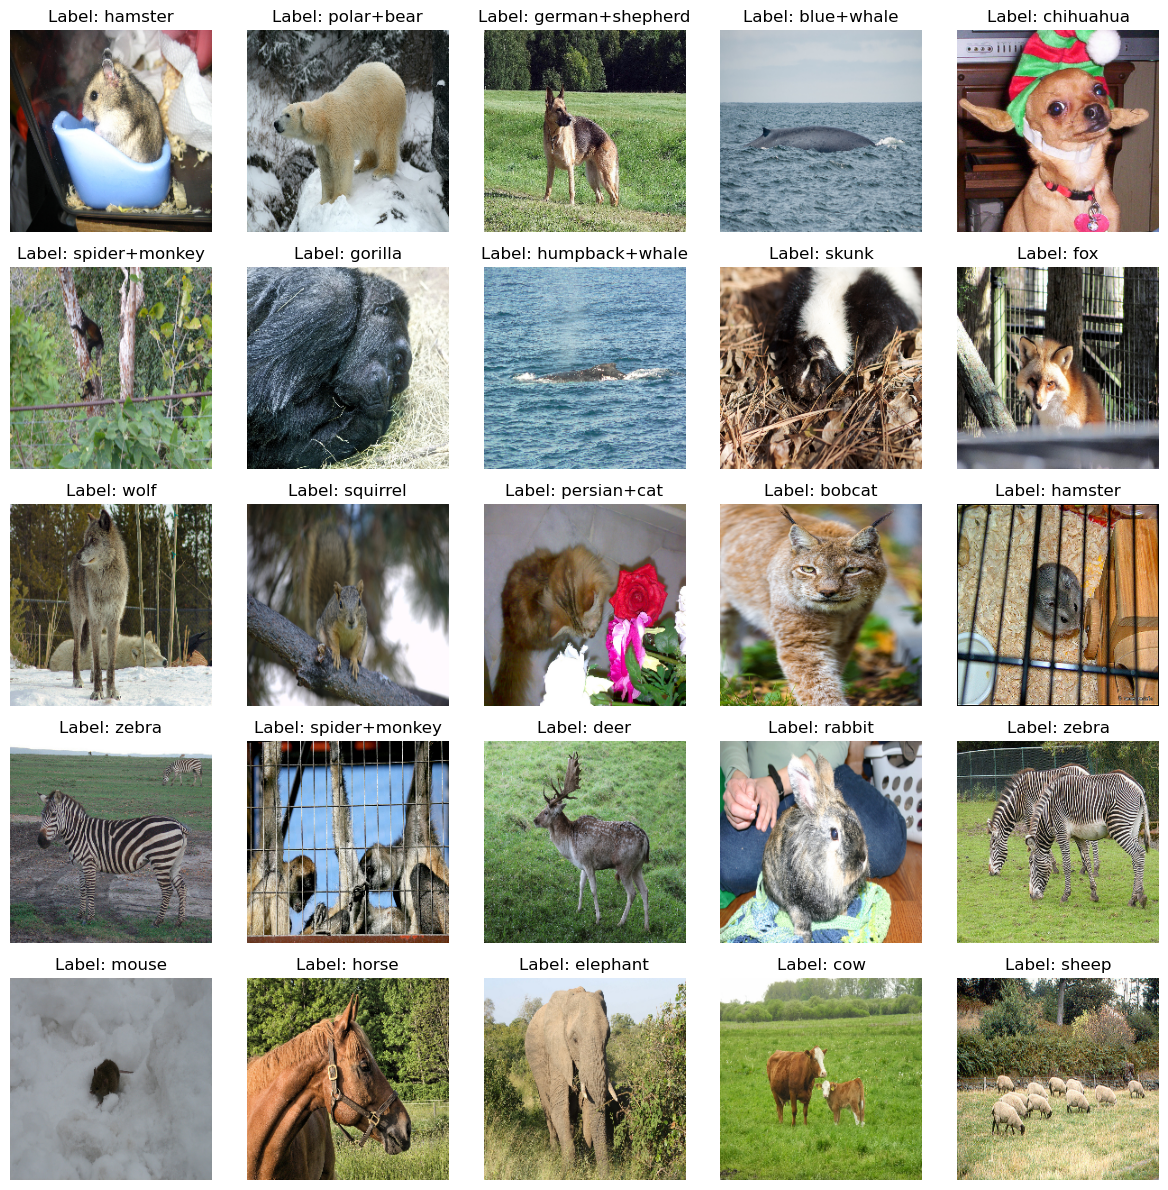

In [9]:
#show the images
fig, axes = plt.subplots(nrows= 5, ncols=5, figsize=(12, 12), sharex=True, sharey=True)
ax = axes.ravel()
for i in range(25):
    ax[i].imshow(printimages[i])
    ax[i].set_title(f'Label: {printclasses[i]}')
    ax[i].set_axis_off()     
fig.tight_layout()
plt.show()

### 2.5 Apply peprocessing to Images

In [7]:
prep_images = preprocess_input(images)

In [13]:
from tensorflow.keras.utils import Sequence

class DataGenerator(Sequence):
    def __init__(self, x_set, batch_size):
        self.x = x_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x 

prep_images_batch = DataGenerator(prep_images, 32)

### 2.6 Load pretrained ResNet 101

In [10]:
resnet101_model = ResNet101(weights = 'imagenet', include_top = True, input_shape =(image_size, image_size, 3))

In [11]:
for layer in resnet101_model.layers:
    layer.trainable = False
resnet101_model.summary()

Model: "resnet101"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
__________________________________________________________________________________________

In [12]:
feature_extractor = Model(inputs = resnet101_model.input, outputs = resnet101_model.get_layer('avg_pool').output)
feature_extractor.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

### 2.7 Feed images into ResNet101 and extract top average pooling features

In [14]:
with tf.device('/gpu:0'):
    resnet101_features = feature_extractor.predict(prep_images_batch)

### 2.8 Combine features with image names and classes

In [15]:
features_df = pd.DataFrame(resnet101_features)
filename_df = pd.DataFrame(image_names, columns = ['filenames'])
class_df = pd.DataFrame(classes, columns = ['classes'])

Resnet101_features_df = pd.concat([filename_df ,  features_df , class_df ], axis = 1)
Resnet101_features_df.head()

filenames         0         1         2         3         4  \
0  antelope_10001.jpg  0.078449  2.643298  0.718662  0.328159  1.078049   
1  antelope_10002.jpg  0.025058  2.614149  0.171673  0.046811  0.886627   
2  antelope_10003.jpg  0.202388  1.213585  0.015894  0.230381  0.270619   
3  antelope_10004.jpg  0.065485  1.838438  0.079692  0.000000  3.807548   
4  antelope_10005.jpg  0.232709  0.402397  0.334649  0.007895  1.393547   

          5         6         7         8  ...      2039      2040      2041  \
0  1.391108  0.804848  0.068153  0.090585  ...  0.301833  0.248765  0.027839   
1  2.827152  0.274037  0.061760  0.062531  ...  0.419272  0.336502  0.266523   
2  0.963754  0.179600  0.262853  0.229954  ...  0.227423  0.000000  0.000000   
3  0.103680  1.729979  0.579120  0.033199  ...  0.179991  0.196537  0.000000   
4  0.028551  0.541008  0.000000  0.251284  ...  0.122713  0.000000  0.002296   

       2042      2043      2044      2045      2046      2047   classes  
0  0.000000  0.135869  0.000000  0.435833  0.043844  0.382064  antelope  
1  0.040784  0.071503  0.580841  0.664940  0.024681  0.405388  antelope  
2  1.304048  0.032535  0.000000  2.409131  0.105760  0.273091  antelope  
3  0.000000  0.170381  0.010143  1.407815  0.032730  0.000000  antelope  
4  0.005674  0.055112  0.013834  0.766444  0.000000  0.089554  antelope  

[5 rows x 2050 columns]

In [16]:
Resnet101_features_df.classes.unique()

array(['antelope', 'bat', 'beaver', 'blue+whale', 'bobcat', 'buffalo',
       'chihuahua', 'chimpanzee', 'collie', 'cow', 'dalmatian', 'deer',
       'dolphin', 'elephant', 'fox', 'german+shepherd', 'giant+panda',
       'giraffe', 'gorilla', 'grizzly+bear', 'hamster', 'hippopotamus',
       'horse', 'humpback+whale', 'killer+whale', 'leopard', 'lion',
       'mole', 'moose', 'mouse', 'otter', 'ox', 'persian+cat', 'pig',
       'polar+bear', 'rabbit', 'raccoon', 'rat', 'rhinoceros', 'seal',
       'sheep', 'siamese+cat', 'skunk', 'spider+monkey', 'squirrel',
       'tiger', 'walrus', 'weasel', 'wolf', 'zebra'], dtype=object)

### 2.9 Save features as csv

In [17]:
Resnet101_features_df.to_csv("C:/Dissertation/Data/Processed Data/Extracted_ResNet101_features.csv")

### 2.10 Compare with AWA2 features provided with dataset

In [18]:
Given_Resnet101_features_df = pd.read_csv("C:/Dissertation/Data/AwA2-features/Animals_with_Attributes2/Features/ResNet101/AwA2-features.txt", sep = " ",header = None)
Given_Resnet101_features_df.head()

0         1         2         3         4         5         6     \
0  0.127028  3.236108  0.935148  0.144205  1.114897  1.502288  0.410044   
1  0.000000  2.466911  0.026454  0.075211  1.159094  3.066645  0.191157   
2  0.383341  1.011904  0.000000  0.054472  0.343532  0.917366  0.044860   
3  0.117190  1.225786  0.001932  0.000000  3.135732  0.061605  0.974178   
4  0.274902  0.337544  0.084937  0.000000  1.788061  0.143165  0.250313   

       7         8         9     ...  2038      2039      2040      2041  \
0  0.053410  0.000000  0.350173  ...   0.0  0.008841  0.059838  0.018889   
1  0.049365  0.017394  0.000000  ...   0.0  0.312142  0.447039  0.212022   
2  0.100728  0.266673  0.079659  ...   0.0  0.112120  0.000000  0.000000   
3  0.463193  0.057579  0.007712  ...   0.0  0.168017  0.460633  0.000000   
4  0.000000  0.134671  0.149908  ...   0.0  0.106673  0.040709  0.000000   

       2042      2043      2044      2045      2046      2047  
0  0.024724  0.256931  0.071584  0.672237  0.032265  0.407616  
1  0.000000  0.226731  0.278318  1.125202  0.006843  0.256230  
2  1.184899  0.000000  0.000000  2.252654  0.029523  0.033138  
3  0.008595  0.001324  0.000000  0.725105  0.101483  0.000000  
4  0.000000  0.010016  0.010241  0.755545  0.000000  0.060499  

[5 rows x 2048 columns]

In [23]:
from sklearn.metrics.pairwise import cosine_similarity
cosinesimilarity = []
for i, j, class01 in zip(Given_Resnet101_features_df.values, Resnet101_features_df.iloc[:,1:-1].values, Resnet101_features_df['classes']):
    cosinesimilarity.append(cosine_similarity(i.reshape(1, -1),j.reshape(1, -1)))
    print(class01, ' ', cosine_similarity(i.reshape(1, -1),j.reshape(1, -1)))

antelope   [[0.91840111]]
antelope   [[0.94581308]]
antelope   [[0.9504385]]
antelope   [[0.95608696]]
antelope   [[0.96593372]]
antelope   [[0.94244331]]
antelope   [[0.94296129]]
antelope   [[0.97838356]]
antelope   [[0.95228931]]
antelope   [[0.93988096]]
antelope   [[0.92019697]]
antelope   [[0.97035523]]
antelope   [[0.95119816]]
antelope   [[0.96980804]]
antelope   [[0.95303936]]
antelope   [[0.96797124]]
antelope   [[0.9499594]]
antelope   [[0.96360436]]
antelope   [[0.96371049]]
antelope   [[0.9708084]]
antelope   [[0.93067829]]
antelope   [[0.95308441]]
antelope   [[0.96728941]]
antelope   [[0.90342693]]
antelope   [[0.94369793]]
antelope   [[0.96459087]]
antelope   [[0.9322736]]
antelope   [[0.93457661]]
antelope   [[0.88946791]]
antelope   [[0.91746836]]
antelope   [[0.90732554]]
antelope   [[0.93132066]]
antelope   [[0.87756703]]
antelope   [[0.96649231]]
antelope   [[0.96102788]]
antelope   [[0.96418475]]
antelope   [[0.94305143]]
antelope   [[0.96800737]]
antelope   [[0.9

antelope   [[0.94274091]]
antelope   [[0.96946285]]
antelope   [[0.97008988]]
antelope   [[0.9594778]]
antelope   [[0.93143229]]
antelope   [[0.89394124]]
antelope   [[0.98616995]]
antelope   [[0.97594289]]
antelope   [[0.96001451]]
antelope   [[0.97509827]]
antelope   [[0.94706107]]
antelope   [[0.9616932]]
antelope   [[0.9278624]]
antelope   [[0.97173916]]
antelope   [[0.92366813]]
antelope   [[0.93647097]]
antelope   [[0.93008069]]
antelope   [[0.96463191]]
antelope   [[0.96703324]]
antelope   [[0.9545214]]
antelope   [[0.97293682]]
antelope   [[0.95310983]]
antelope   [[0.96241]]
antelope   [[0.95807372]]
antelope   [[0.88063811]]
antelope   [[0.97465599]]
antelope   [[0.95446042]]
antelope   [[0.91112364]]
antelope   [[0.96468967]]
antelope   [[0.96904299]]
antelope   [[0.94180647]]
antelope   [[0.9635052]]
antelope   [[0.95370923]]
antelope   [[0.97301847]]
antelope   [[0.96662233]]
antelope   [[0.95672512]]
antelope   [[0.96889154]]
antelope   [[0.95691668]]
antelope   [[0.97218

antelope   [[0.96211436]]
antelope   [[0.96501585]]
antelope   [[0.95912889]]
antelope   [[0.91103647]]
antelope   [[0.9705111]]
antelope   [[0.95785592]]
antelope   [[0.9260675]]
antelope   [[0.91927646]]
antelope   [[0.93166092]]
antelope   [[0.92854916]]
antelope   [[0.96379166]]
antelope   [[0.92435828]]
antelope   [[0.89589147]]
antelope   [[0.95312212]]
antelope   [[0.90274027]]
antelope   [[0.95432493]]
antelope   [[0.9262243]]
antelope   [[0.9329003]]
antelope   [[0.92668304]]
antelope   [[0.95733625]]
antelope   [[0.98208197]]
antelope   [[0.86542005]]
antelope   [[0.94434543]]
antelope   [[0.95345264]]
antelope   [[0.94994508]]
antelope   [[0.96153651]]
antelope   [[0.96164919]]
antelope   [[0.8943624]]
antelope   [[0.96780203]]
antelope   [[0.96795985]]
antelope   [[0.90950065]]
antelope   [[0.92699604]]
antelope   [[0.95708547]]
antelope   [[0.95216575]]
antelope   [[0.90658516]]
antelope   [[0.95473558]]
antelope   [[0.93888979]]
antelope   [[0.96861455]]
antelope   [[0.96

bat   [[0.92778343]]
bat   [[0.94995571]]
bat   [[0.9743344]]
bat   [[0.94207684]]
bat   [[0.95031864]]
bat   [[0.94740761]]
bat   [[0.97421925]]
bat   [[0.95016114]]
bat   [[0.93882149]]
bat   [[0.96899514]]
bat   [[0.9025786]]
bat   [[0.91031017]]
bat   [[0.90450048]]
bat   [[0.91949906]]
bat   [[0.9630039]]
bat   [[0.94808122]]
bat   [[0.96730552]]
bat   [[0.94312439]]
bat   [[0.95413983]]
bat   [[0.92488495]]
bat   [[0.97832323]]
bat   [[0.97382289]]
bat   [[0.97542249]]
bat   [[0.92959451]]
bat   [[0.85608875]]
bat   [[0.8942975]]
bat   [[0.87080323]]
bat   [[0.85743846]]
bat   [[0.93007087]]
bat   [[0.98116881]]
bat   [[0.95997496]]
bat   [[0.95013652]]
bat   [[0.89587662]]
bat   [[0.89526974]]
bat   [[0.91400136]]
bat   [[0.95993184]]
bat   [[0.96587639]]
bat   [[0.94614829]]
bat   [[0.94049273]]
bat   [[0.90201905]]
bat   [[0.97694844]]
bat   [[0.92904283]]
bat   [[0.94335508]]
bat   [[0.96089444]]
bat   [[0.89423922]]
bat   [[0.93536046]]
bat   [[0.92260394]]
bat   [[0.9176183

bobcat   [[0.96572149]]
bobcat   [[0.96936832]]
bobcat   [[0.97684462]]
bobcat   [[0.95871543]]
bobcat   [[0.96587286]]
bobcat   [[0.94893733]]
bobcat   [[0.94834168]]
bobcat   [[0.9790369]]
bobcat   [[0.966208]]
bobcat   [[0.95217939]]
bobcat   [[0.91105476]]
bobcat   [[0.95967121]]
bobcat   [[0.94616009]]
bobcat   [[0.94535782]]
bobcat   [[0.94045718]]
bobcat   [[0.96054136]]
bobcat   [[0.96975633]]
bobcat   [[0.93473138]]
bobcat   [[0.96949076]]
bobcat   [[0.96690817]]
bobcat   [[0.96971631]]
bobcat   [[0.96436304]]
bobcat   [[0.93616509]]
bobcat   [[0.93252924]]
bobcat   [[0.9656645]]
bobcat   [[0.94879454]]
bobcat   [[0.94705834]]
bobcat   [[0.93046426]]
bobcat   [[0.95840758]]
bobcat   [[0.95475302]]
bobcat   [[0.96100742]]
bobcat   [[0.96467161]]
bobcat   [[0.93069886]]
bobcat   [[0.94480585]]
bobcat   [[0.92677146]]
bobcat   [[0.93299838]]
bobcat   [[0.97349737]]
bobcat   [[0.9609296]]
bobcat   [[0.9304265]]
bobcat   [[0.96770434]]
bobcat   [[0.95650553]]
bobcat   [[0.93602296]

buffalo   [[0.92827175]]
buffalo   [[0.9212586]]
buffalo   [[0.95359905]]
buffalo   [[0.92504992]]
buffalo   [[0.94529909]]
buffalo   [[0.97232023]]
buffalo   [[0.95080607]]
buffalo   [[0.9731079]]
buffalo   [[0.97605298]]
buffalo   [[0.96787165]]
buffalo   [[0.97561904]]
buffalo   [[0.97555341]]
buffalo   [[0.91699244]]
buffalo   [[0.96701528]]
buffalo   [[0.96921321]]
buffalo   [[0.95148422]]
buffalo   [[0.9679871]]
buffalo   [[0.9522555]]
buffalo   [[0.95312151]]
buffalo   [[0.97043981]]
buffalo   [[0.95643106]]
buffalo   [[0.98895203]]
buffalo   [[0.96898403]]
buffalo   [[0.94442043]]
buffalo   [[0.94196369]]
buffalo   [[0.91310725]]
buffalo   [[0.96372016]]
buffalo   [[0.96232556]]
buffalo   [[0.97738189]]
buffalo   [[0.97597135]]
buffalo   [[0.96399002]]
buffalo   [[0.95253879]]
buffalo   [[0.94737398]]
buffalo   [[0.94318293]]
buffalo   [[0.97019457]]
buffalo   [[0.96713763]]
buffalo   [[0.95047306]]
buffalo   [[0.95562523]]
buffalo   [[0.94447014]]
buffalo   [[0.9643779]]
buffa

buffalo   [[0.95719009]]
buffalo   [[0.94062765]]
buffalo   [[0.96366982]]
buffalo   [[0.97264759]]
buffalo   [[0.94968708]]
buffalo   [[0.96134459]]
buffalo   [[0.93588548]]
buffalo   [[0.95641805]]
buffalo   [[0.93929455]]
buffalo   [[0.96067279]]
buffalo   [[0.94789255]]
buffalo   [[0.94837186]]
buffalo   [[0.92675608]]
buffalo   [[0.96699739]]
buffalo   [[0.97270292]]
buffalo   [[0.96640859]]
buffalo   [[0.95115703]]
buffalo   [[0.95724396]]
buffalo   [[0.96816617]]
buffalo   [[0.97594795]]
buffalo   [[0.97642146]]
buffalo   [[0.94921332]]
buffalo   [[0.95059496]]
buffalo   [[0.97372479]]
buffalo   [[0.96638753]]
buffalo   [[0.96084577]]
buffalo   [[0.96418533]]
buffalo   [[0.97088831]]
buffalo   [[0.95303865]]
buffalo   [[0.95903729]]
buffalo   [[0.96277098]]
buffalo   [[0.94228373]]
buffalo   [[0.9654431]]
buffalo   [[0.97990719]]
buffalo   [[0.96100409]]
buffalo   [[0.96529478]]
buffalo   [[0.96395782]]
buffalo   [[0.95642041]]
buffalo   [[0.97343507]]
buffalo   [[0.96058084]]
b

chihuahua   [[0.89653519]]
chihuahua   [[0.92138212]]
chihuahua   [[0.98313421]]
chihuahua   [[0.97408361]]
chihuahua   [[0.96909798]]
chihuahua   [[0.97886621]]
chihuahua   [[0.94371649]]
chihuahua   [[0.95191311]]
chihuahua   [[0.96963861]]
chihuahua   [[0.96334896]]
chihuahua   [[0.93767303]]
chihuahua   [[0.96534355]]
chihuahua   [[0.98292731]]
chihuahua   [[0.9111432]]
chihuahua   [[0.9701245]]
chihuahua   [[0.94120165]]
chihuahua   [[0.96099347]]
chihuahua   [[0.93557192]]
chihuahua   [[0.9810059]]
chihuahua   [[0.95888662]]
chihuahua   [[0.94244993]]
chihuahua   [[0.96172453]]
chihuahua   [[0.93011316]]
chihuahua   [[0.95479879]]
chihuahua   [[0.92896342]]
chihuahua   [[0.95046449]]
chihuahua   [[0.9693112]]
chihuahua   [[0.96446318]]
chihuahua   [[0.9002672]]
chihuahua   [[0.96623142]]
chihuahua   [[0.93420329]]
chihuahua   [[0.95742539]]
chihuahua   [[0.92918646]]
chihuahua   [[0.96319708]]
chihuahua   [[0.98514887]]
chihuahua   [[0.98200341]]
chihuahua   [[0.96952395]]
chihua

chimpanzee   [[0.94462874]]
chimpanzee   [[0.94848001]]
chimpanzee   [[0.94114509]]
chimpanzee   [[0.93816118]]
chimpanzee   [[0.94024263]]
chimpanzee   [[0.95284688]]
chimpanzee   [[0.97459055]]
chimpanzee   [[0.9455583]]
chimpanzee   [[0.93399324]]
chimpanzee   [[0.9432093]]
chimpanzee   [[0.92638295]]
chimpanzee   [[0.93945371]]
chimpanzee   [[0.96503003]]
chimpanzee   [[0.94692815]]
chimpanzee   [[0.97560687]]
chimpanzee   [[0.96171493]]
chimpanzee   [[0.93574408]]
chimpanzee   [[0.94038198]]
chimpanzee   [[0.91653966]]
chimpanzee   [[0.9114524]]
chimpanzee   [[0.90757899]]
chimpanzee   [[0.94800186]]
chimpanzee   [[0.9537655]]
chimpanzee   [[0.97741569]]
chimpanzee   [[0.97029433]]
chimpanzee   [[0.93988779]]
chimpanzee   [[0.93398236]]
chimpanzee   [[0.91123041]]
chimpanzee   [[0.90080029]]
chimpanzee   [[0.94511611]]
chimpanzee   [[0.92862279]]
chimpanzee   [[0.95767187]]
chimpanzee   [[0.96009364]]
chimpanzee   [[0.96240613]]
chimpanzee   [[0.94118662]]
chimpanzee   [[0.9249361

chimpanzee   [[0.96828043]]
chimpanzee   [[0.91901085]]
chimpanzee   [[0.89290383]]
chimpanzee   [[0.95511936]]
chimpanzee   [[0.9232016]]
chimpanzee   [[0.93766346]]
chimpanzee   [[0.93335187]]
chimpanzee   [[0.94615581]]
chimpanzee   [[0.91038513]]
chimpanzee   [[0.94403551]]
chimpanzee   [[0.90557154]]
chimpanzee   [[0.9686541]]
chimpanzee   [[0.960998]]
chimpanzee   [[0.95975834]]
chimpanzee   [[0.95168735]]
chimpanzee   [[0.97768166]]
chimpanzee   [[0.94447213]]
chimpanzee   [[0.92368433]]
chimpanzee   [[0.94977867]]
chimpanzee   [[0.93959164]]
chimpanzee   [[0.9479404]]
chimpanzee   [[0.94794018]]
chimpanzee   [[0.9002015]]
chimpanzee   [[0.92583554]]
chimpanzee   [[0.97290806]]
chimpanzee   [[0.9472187]]
chimpanzee   [[0.71152165]]
chimpanzee   [[0.97063296]]
chimpanzee   [[0.96970243]]
chimpanzee   [[0.89722715]]
chimpanzee   [[0.92730854]]
chimpanzee   [[0.93920563]]
chimpanzee   [[0.94656633]]
chimpanzee   [[0.97078822]]
chimpanzee   [[0.96349455]]
chimpanzee   [[0.93216772]]

collie   [[0.95896548]]
collie   [[0.9300043]]
collie   [[0.97166176]]
collie   [[0.94434282]]
collie   [[0.95218175]]
collie   [[0.9666857]]
collie   [[0.86991358]]
collie   [[0.96545084]]
collie   [[0.97096468]]
collie   [[0.95211837]]
collie   [[0.91254185]]
collie   [[0.95377186]]
collie   [[0.96204271]]
collie   [[0.96603106]]
collie   [[0.9155963]]
collie   [[0.9465196]]
collie   [[0.95604257]]
collie   [[0.97486316]]
collie   [[0.89870984]]
collie   [[0.97616959]]
collie   [[0.96892814]]
collie   [[0.94917529]]
collie   [[0.9225748]]
collie   [[0.96294167]]
collie   [[0.89424343]]
collie   [[0.97937533]]
collie   [[0.96809233]]
collie   [[0.93257987]]
collie   [[0.97039702]]
collie   [[0.9700928]]
collie   [[0.95400726]]
collie   [[0.94242068]]
collie   [[0.95704624]]
collie   [[0.92738841]]
collie   [[0.94579441]]
collie   [[0.95776567]]
collie   [[0.95612783]]
collie   [[0.97313606]]
collie   [[0.9711661]]
collie   [[0.98071565]]
collie   [[0.92200323]]
collie   [[0.93485017]]

collie   [[0.92339784]]
collie   [[0.9508212]]
collie   [[0.93439985]]
collie   [[0.97415155]]
collie   [[0.99125778]]
collie   [[0.96587276]]
collie   [[0.96838601]]
collie   [[0.95418512]]
collie   [[0.92897949]]
collie   [[0.94462454]]
collie   [[0.95761697]]
collie   [[0.9368743]]
collie   [[0.97399745]]
collie   [[0.95456931]]
collie   [[0.91649761]]
collie   [[0.94323628]]
collie   [[0.96583893]]
collie   [[0.93652994]]
collie   [[0.9473514]]
collie   [[0.92386234]]
collie   [[0.96794645]]
collie   [[0.95989601]]
collie   [[0.95411497]]
collie   [[0.97178863]]
collie   [[0.9314227]]
collie   [[0.95442901]]
collie   [[0.89395005]]
collie   [[0.94315594]]
collie   [[0.93142595]]
collie   [[0.95568184]]
collie   [[0.96871886]]
collie   [[0.95967661]]
collie   [[0.94144159]]
collie   [[0.93005539]]
collie   [[0.93476202]]
collie   [[0.96554525]]
collie   [[0.95216994]]
collie   [[0.97380175]]
collie   [[0.92277529]]
collie   [[0.95623534]]
collie   [[0.91358208]]
collie   [[0.9417808

collie   [[0.92667803]]
collie   [[0.94283694]]
collie   [[0.9326104]]
collie   [[0.97411295]]
collie   [[0.93210375]]
collie   [[0.89735006]]
collie   [[0.95960947]]
collie   [[0.92857128]]
collie   [[0.89749273]]
collie   [[0.92123297]]
collie   [[0.89655413]]
collie   [[0.92934473]]
collie   [[0.88445513]]
collie   [[0.9371076]]
collie   [[0.92961324]]
collie   [[0.88312359]]
collie   [[0.92561364]]
collie   [[0.92849166]]
collie   [[0.8886214]]
collie   [[0.92006756]]
collie   [[0.94672496]]
collie   [[0.94655797]]
collie   [[0.97697886]]
collie   [[0.94567079]]
collie   [[0.96919005]]
collie   [[0.93881828]]
collie   [[0.96423258]]
collie   [[0.95076795]]
collie   [[0.97250259]]
collie   [[0.97522423]]
collie   [[0.98279215]]
collie   [[0.87728587]]
collie   [[0.97522314]]
collie   [[0.96637371]]
collie   [[0.96525293]]
collie   [[0.98026302]]
collie   [[0.95601779]]
collie   [[0.96320152]]
collie   [[0.96682558]]
collie   [[0.97911348]]
collie   [[0.94240631]]
collie   [[0.967278

cow   [[0.93797769]]
cow   [[0.93206229]]
cow   [[0.96786306]]
cow   [[0.93807607]]
cow   [[0.96307073]]
cow   [[0.93952333]]
cow   [[0.97285802]]
cow   [[0.92793038]]
cow   [[0.95049956]]
cow   [[0.88911135]]
cow   [[0.93659506]]
cow   [[0.92619303]]
cow   [[0.96255597]]
cow   [[0.9678682]]
cow   [[0.94438413]]
cow   [[0.95153828]]
cow   [[0.97790871]]
cow   [[0.95525932]]
cow   [[0.95754694]]
cow   [[0.96187216]]
cow   [[0.95943233]]
cow   [[0.89786194]]
cow   [[0.90225126]]
cow   [[0.96274683]]
cow   [[0.96572297]]
cow   [[0.96172847]]
cow   [[0.95430918]]
cow   [[0.96101086]]
cow   [[0.93422145]]
cow   [[0.95008175]]
cow   [[0.9521828]]
cow   [[0.95557584]]
cow   [[0.9602194]]
cow   [[0.95747446]]
cow   [[0.93665536]]
cow   [[0.97254919]]
cow   [[0.96194059]]
cow   [[0.9530042]]
cow   [[0.96074441]]
cow   [[0.93723508]]
cow   [[0.96648652]]
cow   [[0.9456404]]
cow   [[0.93124604]]
cow   [[0.96633648]]
cow   [[0.92850817]]
cow   [[0.94573179]]
cow   [[0.94682643]]
cow   [[0.9740528]

cow   [[0.93763169]]
cow   [[0.95726854]]
cow   [[0.96092414]]
cow   [[0.94676002]]
cow   [[0.9485978]]
cow   [[0.8983087]]
cow   [[0.96278118]]
cow   [[0.9605295]]
cow   [[0.96349537]]
cow   [[0.94075855]]
cow   [[0.91099642]]
cow   [[0.94297621]]
cow   [[0.9374874]]
cow   [[0.9547452]]
cow   [[0.87036772]]
cow   [[0.94661041]]
cow   [[0.92457138]]
cow   [[0.9701191]]
cow   [[0.95106612]]
cow   [[0.95768332]]
cow   [[0.94362104]]
cow   [[0.90602785]]
cow   [[0.95392208]]
cow   [[0.9421192]]
cow   [[0.94649217]]
cow   [[0.97870391]]
cow   [[0.88875869]]
cow   [[0.97173645]]
cow   [[0.94946505]]
cow   [[0.9667454]]
cow   [[0.9271086]]
cow   [[0.95076298]]
cow   [[0.96435483]]
cow   [[0.95533274]]
cow   [[0.95116173]]
cow   [[0.93328205]]
cow   [[0.879671]]
cow   [[0.93357983]]
cow   [[0.96157027]]
cow   [[0.94147346]]
cow   [[0.9493048]]
cow   [[0.95648353]]
cow   [[0.93221671]]
cow   [[0.92087056]]
cow   [[0.9110543]]
cow   [[0.92125449]]
cow   [[0.96645688]]
cow   [[0.96429619]]
cow  

dalmatian   [[0.96279597]]
dalmatian   [[0.97238269]]
dalmatian   [[0.97656195]]
dalmatian   [[0.96845477]]
dalmatian   [[0.96682695]]
dalmatian   [[0.96632221]]
dalmatian   [[0.95315468]]
dalmatian   [[0.97853767]]
dalmatian   [[0.9401504]]
dalmatian   [[0.9403886]]
dalmatian   [[0.97722265]]
dalmatian   [[0.95192054]]
dalmatian   [[0.96148231]]
dalmatian   [[0.9687453]]
dalmatian   [[0.95328105]]
dalmatian   [[0.97067281]]
dalmatian   [[0.96839529]]
dalmatian   [[0.96452258]]
dalmatian   [[0.97803391]]
dalmatian   [[0.9665137]]
dalmatian   [[0.96380325]]
dalmatian   [[0.9792521]]
dalmatian   [[0.95252385]]
dalmatian   [[0.9536565]]
dalmatian   [[0.95077484]]
dalmatian   [[0.95017777]]
dalmatian   [[0.87996859]]
dalmatian   [[0.95844674]]
dalmatian   [[0.96207523]]
dalmatian   [[0.95966178]]
dalmatian   [[0.96932899]]
dalmatian   [[0.96121237]]
dalmatian   [[0.96531573]]
dalmatian   [[0.95878272]]
dalmatian   [[0.97785327]]
dalmatian   [[0.97297781]]
dalmatian   [[0.95418409]]
dalmati

deer   [[0.96057003]]
deer   [[0.96656524]]
deer   [[0.94351667]]
deer   [[0.95312643]]
deer   [[0.96082357]]
deer   [[0.95842541]]
deer   [[0.92303834]]
deer   [[0.97203798]]
deer   [[0.97340596]]
deer   [[0.89252415]]
deer   [[0.96703342]]
deer   [[0.93611201]]
deer   [[0.95342656]]
deer   [[0.92735396]]
deer   [[0.96977991]]
deer   [[0.85749592]]
deer   [[0.9387307]]
deer   [[0.92812019]]
deer   [[0.96346565]]
deer   [[0.95127347]]
deer   [[0.95476924]]
deer   [[0.96364453]]
deer   [[0.94352319]]
deer   [[0.95936199]]
deer   [[0.95899307]]
deer   [[0.95123746]]
deer   [[0.95440019]]
deer   [[0.95271406]]
deer   [[0.9645049]]
deer   [[0.95172624]]
deer   [[0.91407104]]
deer   [[0.96377229]]
deer   [[0.93814279]]
deer   [[0.96064686]]
deer   [[0.95398628]]
deer   [[0.94541311]]
deer   [[0.93890643]]
deer   [[0.95382332]]
deer   [[0.94745333]]
deer   [[0.91930899]]
deer   [[0.97616611]]
deer   [[0.95793752]]
deer   [[0.9499148]]
deer   [[0.93589697]]
deer   [[0.94182058]]
deer   [[0.96

deer   [[0.94421037]]
deer   [[0.97011545]]
deer   [[0.97369056]]
deer   [[0.96716916]]
deer   [[0.92899139]]
deer   [[0.95407301]]
deer   [[0.97765344]]
deer   [[0.91464321]]
deer   [[0.91358902]]
deer   [[0.97152049]]
deer   [[0.96023269]]
deer   [[0.95167779]]
deer   [[0.93850334]]
deer   [[0.94800852]]
deer   [[0.96227656]]
deer   [[0.90479621]]
deer   [[0.92990567]]
deer   [[0.9119537]]
deer   [[0.92572564]]
deer   [[0.94755272]]
deer   [[0.95761717]]
deer   [[0.95012591]]
deer   [[0.95331157]]
deer   [[0.96970406]]
deer   [[0.96485732]]
deer   [[0.94308162]]
deer   [[0.90791097]]
deer   [[0.96973444]]
deer   [[0.94638879]]
deer   [[0.9185623]]
deer   [[0.96444402]]
deer   [[0.97747139]]
deer   [[0.92395851]]
deer   [[0.95485421]]
deer   [[0.92946174]]
deer   [[0.95269225]]
deer   [[0.93806845]]
deer   [[0.95924104]]
deer   [[0.94062999]]
deer   [[0.96419767]]
deer   [[0.94973826]]
deer   [[0.91430044]]
deer   [[0.93855578]]
deer   [[0.93916209]]
deer   [[0.92702259]]
deer   [[0.9

deer   [[0.95977274]]
deer   [[0.97277604]]
deer   [[0.96438189]]
deer   [[0.95810984]]
deer   [[0.95955279]]
deer   [[0.93263277]]
deer   [[0.92511671]]
deer   [[0.93237101]]
deer   [[0.94391772]]
deer   [[0.94156167]]
deer   [[0.91945569]]
dolphin   [[0.87129482]]
dolphin   [[0.97419368]]
dolphin   [[0.97444295]]
dolphin   [[0.95694067]]
dolphin   [[0.97934288]]
dolphin   [[0.95582808]]
dolphin   [[0.9470531]]
dolphin   [[0.98376937]]
dolphin   [[0.97798807]]
dolphin   [[0.97798472]]
dolphin   [[0.95291378]]
dolphin   [[0.93524518]]
dolphin   [[0.98289705]]
dolphin   [[0.96832893]]
dolphin   [[0.95227695]]
dolphin   [[0.98961377]]
dolphin   [[0.9654358]]
dolphin   [[0.97799913]]
dolphin   [[0.97923926]]
dolphin   [[0.942462]]
dolphin   [[0.95515106]]
dolphin   [[0.97162566]]
dolphin   [[0.97383328]]
dolphin   [[0.95206732]]
dolphin   [[0.93918188]]
dolphin   [[0.95801593]]
dolphin   [[0.94842313]]
dolphin   [[0.97522749]]
dolphin   [[0.94408765]]
dolphin   [[0.98038021]]
dolphin   [[

dolphin   [[0.97547962]]
dolphin   [[0.97945513]]
dolphin   [[0.95082495]]
dolphin   [[0.97650323]]
dolphin   [[0.97735975]]
dolphin   [[0.97143334]]
dolphin   [[0.97119163]]
dolphin   [[0.93157079]]
dolphin   [[0.95762053]]
dolphin   [[0.9493223]]
dolphin   [[0.92510447]]
dolphin   [[0.95655958]]
dolphin   [[0.93153926]]
dolphin   [[0.987089]]
dolphin   [[0.92035006]]
dolphin   [[0.90332383]]
dolphin   [[0.94058827]]
dolphin   [[0.97653792]]
dolphin   [[0.97442057]]
dolphin   [[0.96134724]]
dolphin   [[0.97391246]]
dolphin   [[0.9765942]]
dolphin   [[0.95672089]]
dolphin   [[0.95743228]]
dolphin   [[0.94778457]]
dolphin   [[0.95442138]]
dolphin   [[0.98464489]]
dolphin   [[0.97376804]]
dolphin   [[0.94732352]]
dolphin   [[0.95253616]]
dolphin   [[0.96318269]]
dolphin   [[0.96610803]]
dolphin   [[0.9660073]]
dolphin   [[0.95523837]]
dolphin   [[0.93924308]]
dolphin   [[0.939146]]
dolphin   [[0.98429362]]
dolphin   [[0.88165398]]
dolphin   [[0.97176336]]
dolphin   [[0.95065845]]
dolphin

dolphin   [[0.96713114]]
dolphin   [[0.96046426]]
dolphin   [[0.97850429]]
dolphin   [[0.96993496]]
dolphin   [[0.92958458]]
dolphin   [[0.9624594]]
dolphin   [[0.95194089]]
dolphin   [[0.98123772]]
dolphin   [[0.9696254]]
dolphin   [[0.9783091]]
dolphin   [[0.92700473]]
dolphin   [[0.97828233]]
dolphin   [[0.96839978]]
dolphin   [[0.97699284]]
dolphin   [[0.96502856]]
dolphin   [[0.96078999]]
dolphin   [[0.98288711]]
dolphin   [[0.93732681]]
dolphin   [[0.96856616]]
dolphin   [[0.9527772]]
dolphin   [[0.9643152]]
dolphin   [[0.90838585]]
dolphin   [[0.98205247]]
dolphin   [[0.95269753]]
dolphin   [[0.94162681]]
dolphin   [[0.94539275]]
dolphin   [[0.96357315]]
dolphin   [[0.97296574]]
dolphin   [[0.96906174]]
dolphin   [[0.92335991]]
dolphin   [[0.98081929]]
dolphin   [[0.94497698]]
dolphin   [[0.96042325]]
dolphin   [[0.97521129]]
dolphin   [[0.96584074]]
dolphin   [[0.9565064]]
dolphin   [[0.91855412]]
dolphin   [[0.96815693]]
dolphin   [[0.94735396]]
dolphin   [[0.95375941]]
dolphi

elephant   [[0.9045766]]
elephant   [[0.9105065]]
elephant   [[0.90274007]]
elephant   [[0.95742815]]
elephant   [[0.96200573]]
elephant   [[0.93623935]]
elephant   [[0.95321784]]
elephant   [[0.91386593]]
elephant   [[0.92835454]]
elephant   [[0.86862045]]
elephant   [[0.88197033]]
elephant   [[0.95175055]]
elephant   [[0.9372253]]
elephant   [[0.9449105]]
elephant   [[0.92517908]]
elephant   [[0.91170805]]
elephant   [[0.90844646]]
elephant   [[0.93930939]]
elephant   [[0.8954048]]
elephant   [[0.93608132]]
elephant   [[0.90232365]]
elephant   [[0.90628169]]
elephant   [[0.92732141]]
elephant   [[0.94589691]]
elephant   [[0.91954464]]
elephant   [[0.9515131]]
elephant   [[0.93585653]]
elephant   [[0.94383013]]
elephant   [[0.93978693]]
elephant   [[0.95440215]]
elephant   [[0.92698806]]
elephant   [[0.93135458]]
elephant   [[0.87434926]]
elephant   [[0.9239019]]
elephant   [[0.91907612]]
elephant   [[0.93706442]]
elephant   [[0.89727375]]
elephant   [[0.93474184]]
elephant   [[0.9595

elephant   [[0.96167454]]
elephant   [[0.88873112]]
elephant   [[0.91513099]]
elephant   [[0.92235848]]
elephant   [[0.95650719]]
elephant   [[0.96053902]]
elephant   [[0.9047732]]
elephant   [[0.91800372]]
elephant   [[0.93596819]]
elephant   [[0.87566238]]
elephant   [[0.964308]]
elephant   [[0.94908583]]
elephant   [[0.93032143]]
elephant   [[0.9418577]]
elephant   [[0.95387522]]
elephant   [[0.94611607]]
elephant   [[0.83825683]]
elephant   [[0.93934868]]
elephant   [[0.93654582]]
elephant   [[0.96917071]]
elephant   [[0.89940771]]
elephant   [[0.93892257]]
elephant   [[0.97568687]]
elephant   [[0.92711846]]
elephant   [[0.96517311]]
elephant   [[0.95361838]]
elephant   [[0.89162965]]
elephant   [[0.89125875]]
elephant   [[0.93100511]]
elephant   [[0.92799775]]
elephant   [[0.91050939]]
elephant   [[0.90575728]]
elephant   [[0.93997034]]
elephant   [[0.89803463]]
elephant   [[0.93462451]]
elephant   [[0.93313649]]
elephant   [[0.9559847]]
elephant   [[0.93776195]]
elephant   [[0.95

elephant   [[0.93733504]]
elephant   [[0.93218992]]
elephant   [[0.93346417]]
elephant   [[0.92587462]]
elephant   [[0.98400381]]
elephant   [[0.92274603]]
elephant   [[0.92719361]]
elephant   [[0.93269645]]
elephant   [[0.95427621]]
elephant   [[0.95468446]]
elephant   [[0.94237862]]
elephant   [[0.90503596]]
elephant   [[0.94716236]]
elephant   [[0.93892633]]
elephant   [[0.95693268]]
elephant   [[0.89410179]]
elephant   [[0.89671932]]
elephant   [[0.89068881]]
elephant   [[0.93300625]]
elephant   [[0.92794339]]
elephant   [[0.94412462]]
elephant   [[0.94577057]]
elephant   [[0.96850312]]
elephant   [[0.90845512]]
fox   [[0.9704245]]
fox   [[0.95045903]]
fox   [[0.94504341]]
fox   [[0.92813904]]
fox   [[0.93303433]]
fox   [[0.95722134]]
fox   [[0.94772099]]
fox   [[0.93354983]]
fox   [[0.9578204]]
fox   [[0.91968487]]
fox   [[0.93114816]]
fox   [[0.89214373]]
fox   [[0.96358601]]
fox   [[0.95914852]]
fox   [[0.9341738]]
fox   [[0.96164172]]
fox   [[0.92521511]]
fox   [[0.95152971]]
f

fox   [[0.96650557]]
fox   [[0.96113984]]
fox   [[0.97080228]]
fox   [[0.95113923]]
fox   [[0.97237941]]
fox   [[0.96042561]]
fox   [[0.9575571]]
fox   [[0.94219517]]
fox   [[0.97852825]]
fox   [[0.96959113]]
fox   [[0.97663651]]
fox   [[0.94112379]]
fox   [[0.98455412]]
fox   [[0.96374131]]
fox   [[0.96769396]]
fox   [[0.96601077]]
fox   [[0.94031662]]
fox   [[0.95614512]]
fox   [[0.95575833]]
fox   [[0.88805881]]
fox   [[0.92872585]]
fox   [[0.95882301]]
fox   [[0.95617177]]
fox   [[0.96138426]]
fox   [[0.95761036]]
fox   [[0.92787027]]
fox   [[0.88742543]]
fox   [[0.93709235]]
fox   [[0.95215857]]
fox   [[0.94141835]]
fox   [[0.95006964]]
fox   [[0.96697123]]
fox   [[0.97325581]]
fox   [[0.96167389]]
fox   [[0.97296912]]
fox   [[0.95210327]]
fox   [[0.95886469]]
fox   [[0.96473254]]
fox   [[0.93859416]]
fox   [[0.95371035]]
fox   [[0.93309079]]
fox   [[0.96057949]]
fox   [[0.93482722]]
fox   [[0.93771542]]
fox   [[0.94966209]]
fox   [[0.95454437]]
fox   [[0.97789784]]
fox   [[0.9189

german+shepherd   [[0.9569439]]
german+shepherd   [[0.95794454]]
german+shepherd   [[0.92889382]]
german+shepherd   [[0.97489505]]
german+shepherd   [[0.93994228]]
german+shepherd   [[0.96135093]]
german+shepherd   [[0.93834517]]
german+shepherd   [[0.93354511]]
german+shepherd   [[0.95531273]]
german+shepherd   [[0.93252986]]
german+shepherd   [[0.96453513]]
german+shepherd   [[0.92573765]]
german+shepherd   [[0.9748491]]
german+shepherd   [[0.92922251]]
german+shepherd   [[0.94918952]]
german+shepherd   [[0.90571027]]
german+shepherd   [[0.92562595]]
german+shepherd   [[0.96168923]]
german+shepherd   [[0.95935046]]
german+shepherd   [[0.96623743]]
german+shepherd   [[0.90259042]]
german+shepherd   [[0.96534144]]
german+shepherd   [[0.95964672]]
german+shepherd   [[0.94885883]]
german+shepherd   [[0.96964628]]
german+shepherd   [[0.97148266]]
german+shepherd   [[0.97100974]]
german+shepherd   [[0.9705984]]
german+shepherd   [[0.88011113]]
german+shepherd   [[0.95635419]]
german+shephe

german+shepherd   [[0.96940908]]
german+shepherd   [[0.95664856]]
german+shepherd   [[0.8950048]]
german+shepherd   [[0.92653688]]
german+shepherd   [[0.99130796]]
german+shepherd   [[0.94648767]]
german+shepherd   [[0.95520329]]
german+shepherd   [[0.95718261]]
german+shepherd   [[0.98247361]]
german+shepherd   [[0.93259454]]
german+shepherd   [[0.93246744]]
german+shepherd   [[0.87914447]]
german+shepherd   [[0.9187671]]
german+shepherd   [[0.97105004]]
german+shepherd   [[0.96257363]]
german+shepherd   [[0.9545231]]
german+shepherd   [[0.96099796]]
german+shepherd   [[0.9535027]]
german+shepherd   [[0.94410588]]
german+shepherd   [[0.96610393]]
german+shepherd   [[0.95261019]]
german+shepherd   [[0.94807264]]
german+shepherd   [[0.95201314]]
german+shepherd   [[0.91743888]]
german+shepherd   [[0.91425941]]
german+shepherd   [[0.91836522]]
german+shepherd   [[0.95541823]]
german+shepherd   [[0.94989987]]
german+shepherd   [[0.89184272]]
german+shepherd   [[0.9446126]]
german+shepherd

german+shepherd   [[0.93703113]]
german+shepherd   [[0.94419555]]
german+shepherd   [[0.96289911]]
german+shepherd   [[0.93977781]]
german+shepherd   [[0.96389962]]
german+shepherd   [[0.89207537]]
german+shepherd   [[0.96058583]]
german+shepherd   [[0.94556359]]
german+shepherd   [[0.9500228]]
german+shepherd   [[0.94243728]]
german+shepherd   [[0.93692342]]
german+shepherd   [[0.94851142]]
german+shepherd   [[0.92995259]]
german+shepherd   [[0.93471248]]
german+shepherd   [[0.96598297]]
german+shepherd   [[0.9221967]]
german+shepherd   [[0.95555972]]
german+shepherd   [[0.96281415]]
german+shepherd   [[0.95506971]]
german+shepherd   [[0.98057533]]
german+shepherd   [[0.95792194]]
german+shepherd   [[0.95848445]]
german+shepherd   [[0.95334618]]
german+shepherd   [[0.94171195]]
german+shepherd   [[0.95544071]]
german+shepherd   [[0.95828161]]
german+shepherd   [[0.96748888]]
german+shepherd   [[0.9687784]]
german+shepherd   [[0.94255028]]
german+shepherd   [[0.94959664]]
german+shephe

giant+panda   [[0.97212194]]
giant+panda   [[0.94880337]]
giant+panda   [[0.93932986]]
giant+panda   [[0.96855384]]
giant+panda   [[0.94305064]]
giant+panda   [[0.95977402]]
giant+panda   [[0.96534231]]
giant+panda   [[0.94583216]]
giant+panda   [[0.93250081]]
giant+panda   [[0.96399996]]
giant+panda   [[0.97383133]]
giant+panda   [[0.95352133]]
giant+panda   [[0.93819834]]
giant+panda   [[0.96420173]]
giant+panda   [[0.92905853]]
giant+panda   [[0.96755473]]
giant+panda   [[0.96597617]]
giant+panda   [[0.97122007]]
giant+panda   [[0.96254314]]
giant+panda   [[0.95077297]]
giant+panda   [[0.980058]]
giant+panda   [[0.95682232]]
giant+panda   [[0.93162021]]
giant+panda   [[0.96754937]]
giant+panda   [[0.91278905]]
giant+panda   [[0.97311626]]
giant+panda   [[0.932804]]
giant+panda   [[0.96086211]]
giant+panda   [[0.94992686]]
giant+panda   [[0.97293596]]
giant+panda   [[0.97587972]]
giant+panda   [[0.95017538]]
giant+panda   [[0.9223521]]
giant+panda   [[0.94265325]]
giant+panda   [[0.9

giant+panda   [[0.97692675]]
giant+panda   [[0.88841881]]
giant+panda   [[0.98514004]]
giant+panda   [[0.96885178]]
giant+panda   [[0.97396054]]
giant+panda   [[0.93157207]]
giant+panda   [[0.94283828]]
giant+panda   [[0.9634115]]
giant+panda   [[0.95951449]]
giant+panda   [[0.97861977]]
giant+panda   [[0.9663604]]
giant+panda   [[0.96839896]]
giant+panda   [[0.9269753]]
giant+panda   [[0.96862556]]
giant+panda   [[0.95538752]]
giant+panda   [[0.93725603]]
giant+panda   [[0.91646442]]
giant+panda   [[0.95746158]]
giant+panda   [[0.94034852]]
giant+panda   [[0.96130907]]
giant+panda   [[0.97862897]]
giant+panda   [[0.96368095]]
giant+panda   [[0.97000668]]
giant+panda   [[0.94337125]]
giant+panda   [[0.94607991]]
giant+panda   [[0.96636994]]
giant+panda   [[0.9466631]]
giant+panda   [[0.89663611]]
giant+panda   [[0.94412779]]
giant+panda   [[0.93077629]]
giant+panda   [[0.96864081]]
giant+panda   [[0.95110033]]
giant+panda   [[0.97468647]]
giant+panda   [[0.96751074]]
giant+panda   [[0.

giraffe   [[0.93671008]]
giraffe   [[0.95624163]]
giraffe   [[0.95296159]]
giraffe   [[0.94043205]]
giraffe   [[0.93749649]]
giraffe   [[0.95083797]]
giraffe   [[0.96385822]]
giraffe   [[0.95800612]]
giraffe   [[0.93050893]]
giraffe   [[0.96826885]]
giraffe   [[0.94554346]]
giraffe   [[0.92088582]]
giraffe   [[0.96929635]]
giraffe   [[0.97525231]]
giraffe   [[0.94019497]]
giraffe   [[0.95296483]]
giraffe   [[0.94691398]]
giraffe   [[0.95181191]]
giraffe   [[0.94015618]]
giraffe   [[0.95549742]]
giraffe   [[0.94953681]]
giraffe   [[0.94641887]]
giraffe   [[0.95834999]]
giraffe   [[0.95289039]]
giraffe   [[0.9585039]]
giraffe   [[0.96611597]]
giraffe   [[0.95378373]]
giraffe   [[0.94731667]]
giraffe   [[0.95733178]]
giraffe   [[0.95645469]]
giraffe   [[0.93481452]]
giraffe   [[0.94438808]]
giraffe   [[0.90886362]]
giraffe   [[0.96521189]]
giraffe   [[0.959748]]
giraffe   [[0.9311651]]
giraffe   [[0.95291773]]
giraffe   [[0.94212004]]
giraffe   [[0.93707121]]
giraffe   [[0.95978407]]
gira

giraffe   [[0.93879628]]
giraffe   [[0.94301694]]
giraffe   [[0.95948637]]
giraffe   [[0.94617025]]
giraffe   [[0.96314468]]
giraffe   [[0.93635844]]
giraffe   [[0.94876375]]
giraffe   [[0.95267683]]
giraffe   [[0.94558099]]
giraffe   [[0.93691253]]
giraffe   [[0.96369059]]
giraffe   [[0.94229788]]
giraffe   [[0.94940141]]
giraffe   [[0.93790172]]
giraffe   [[0.93838809]]
giraffe   [[0.94423361]]
giraffe   [[0.96579948]]
giraffe   [[0.97586658]]
giraffe   [[0.94269621]]
giraffe   [[0.93791656]]
giraffe   [[0.95770294]]
giraffe   [[0.94581302]]
giraffe   [[0.9605595]]
giraffe   [[0.96915571]]
giraffe   [[0.97907917]]
giraffe   [[0.9524674]]
giraffe   [[0.95208785]]
giraffe   [[0.9722835]]
giraffe   [[0.95998233]]
giraffe   [[0.9863269]]
giraffe   [[0.95754926]]
giraffe   [[0.93537885]]
giraffe   [[0.93546316]]
giraffe   [[0.95715641]]
giraffe   [[0.92204911]]
giraffe   [[0.97241385]]
giraffe   [[0.96439992]]
giraffe   [[0.96481454]]
giraffe   [[0.94080131]]
giraffe   [[0.96485217]]
gira

giraffe   [[0.96296091]]
giraffe   [[0.95283636]]
giraffe   [[0.96792709]]
giraffe   [[0.92882513]]
giraffe   [[0.9704266]]
giraffe   [[0.91262505]]
giraffe   [[0.94680702]]
giraffe   [[0.95611807]]
giraffe   [[0.9505756]]
giraffe   [[0.96648625]]
giraffe   [[0.93866868]]
giraffe   [[0.94742718]]
giraffe   [[0.94180675]]
giraffe   [[0.97218182]]
giraffe   [[0.94184515]]
giraffe   [[0.95023789]]
giraffe   [[0.94898185]]
giraffe   [[0.9617113]]
giraffe   [[0.98023095]]
giraffe   [[0.93018223]]
giraffe   [[0.95583826]]
giraffe   [[0.93099143]]
giraffe   [[0.96069415]]
giraffe   [[0.94782656]]
giraffe   [[0.92941507]]
giraffe   [[0.96928626]]
giraffe   [[0.93221255]]
giraffe   [[0.92067794]]
giraffe   [[0.96765705]]
giraffe   [[0.89779006]]
giraffe   [[0.97413477]]
giraffe   [[0.98214879]]
giraffe   [[0.983742]]
giraffe   [[0.94605508]]
giraffe   [[0.94351016]]
giraffe   [[0.96250957]]
giraffe   [[0.9469842]]
giraffe   [[0.95827451]]
giraffe   [[0.96974863]]
giraffe   [[0.93215837]]
giraff

gorilla   [[0.96095676]]
gorilla   [[0.96528871]]
gorilla   [[0.93428922]]
gorilla   [[0.95824133]]
gorilla   [[0.91341772]]
gorilla   [[0.94336843]]
gorilla   [[0.96817115]]
gorilla   [[0.91384921]]
gorilla   [[0.96035939]]
gorilla   [[0.967856]]
gorilla   [[0.92917567]]
gorilla   [[0.92491169]]
gorilla   [[0.95820417]]
gorilla   [[0.93910848]]
gorilla   [[0.87644243]]
gorilla   [[0.92082985]]
gorilla   [[0.95759178]]
gorilla   [[0.97966081]]
gorilla   [[0.94034889]]
gorilla   [[0.89290383]]
gorilla   [[0.96682927]]
gorilla   [[0.93895369]]
gorilla   [[0.9241767]]
gorilla   [[0.9762313]]
gorilla   [[0.8973004]]
gorilla   [[0.9579201]]
gorilla   [[0.93133042]]
gorilla   [[0.94435134]]
gorilla   [[0.94041418]]
gorilla   [[0.96186976]]
gorilla   [[0.95028419]]
gorilla   [[0.96227961]]
gorilla   [[0.94995763]]
gorilla   [[0.92345657]]
gorilla   [[0.94963727]]
gorilla   [[0.82507942]]
gorilla   [[0.96536532]]
gorilla   [[0.91487661]]
gorilla   [[0.96470769]]
gorilla   [[0.91997552]]
gorill

gorilla   [[0.90091253]]
gorilla   [[0.95301518]]
gorilla   [[0.96540588]]
gorilla   [[0.9595978]]
gorilla   [[0.95532572]]
gorilla   [[0.93006919]]
gorilla   [[0.92980675]]
gorilla   [[0.94145634]]
gorilla   [[0.95565562]]
gorilla   [[0.93267769]]
gorilla   [[0.94022803]]
gorilla   [[0.97920671]]
gorilla   [[0.95320034]]
gorilla   [[0.96578069]]
gorilla   [[0.96634436]]
grizzly+bear   [[0.971374]]
grizzly+bear   [[0.95213856]]
grizzly+bear   [[0.94734907]]
grizzly+bear   [[0.94465334]]
grizzly+bear   [[0.92165698]]
grizzly+bear   [[0.93494344]]
grizzly+bear   [[0.952613]]
grizzly+bear   [[0.93408656]]
grizzly+bear   [[0.95507394]]
grizzly+bear   [[0.91250426]]
grizzly+bear   [[0.92890668]]
grizzly+bear   [[0.91847515]]
grizzly+bear   [[0.95877167]]
grizzly+bear   [[0.91453188]]
grizzly+bear   [[0.94755329]]
grizzly+bear   [[0.94796492]]
grizzly+bear   [[0.96582734]]
grizzly+bear   [[0.97346161]]
grizzly+bear   [[0.91180202]]
grizzly+bear   [[0.94397135]]
grizzly+bear   [[0.98240839]]


grizzly+bear   [[0.92353709]]
grizzly+bear   [[0.96483362]]
grizzly+bear   [[0.93558422]]
grizzly+bear   [[0.95472452]]
grizzly+bear   [[0.95539708]]
grizzly+bear   [[0.91852557]]
grizzly+bear   [[0.95757594]]
grizzly+bear   [[0.94174936]]
grizzly+bear   [[0.93727107]]
grizzly+bear   [[0.94719476]]
grizzly+bear   [[0.92287129]]
grizzly+bear   [[0.96648499]]
grizzly+bear   [[0.97182361]]
grizzly+bear   [[0.9293423]]
grizzly+bear   [[0.92766304]]
grizzly+bear   [[0.89864035]]
grizzly+bear   [[0.96465035]]
grizzly+bear   [[0.96989417]]
grizzly+bear   [[0.91808802]]
grizzly+bear   [[0.96211707]]
grizzly+bear   [[0.94600316]]
grizzly+bear   [[0.92561738]]
grizzly+bear   [[0.93876751]]
grizzly+bear   [[0.9202892]]
grizzly+bear   [[0.94110152]]
grizzly+bear   [[0.9751089]]
grizzly+bear   [[0.97319767]]
grizzly+bear   [[0.95027701]]
grizzly+bear   [[0.94928244]]
grizzly+bear   [[0.94687531]]
grizzly+bear   [[0.95237112]]
grizzly+bear   [[0.94919246]]
grizzly+bear   [[0.94961871]]
grizzly+bear 

grizzly+bear   [[0.96186177]]
grizzly+bear   [[0.97194613]]
grizzly+bear   [[0.93778003]]
grizzly+bear   [[0.95971931]]
grizzly+bear   [[0.93471831]]
grizzly+bear   [[0.95677885]]
grizzly+bear   [[0.91713739]]
grizzly+bear   [[0.9325633]]
grizzly+bear   [[0.89346262]]
grizzly+bear   [[0.91750741]]
grizzly+bear   [[0.92169919]]
grizzly+bear   [[0.94627981]]
grizzly+bear   [[0.94902594]]
grizzly+bear   [[0.92901815]]
grizzly+bear   [[0.91872079]]
grizzly+bear   [[0.91312209]]
grizzly+bear   [[0.95117815]]
grizzly+bear   [[0.93721871]]
grizzly+bear   [[0.94524915]]
grizzly+bear   [[0.95538793]]
grizzly+bear   [[0.96326659]]
grizzly+bear   [[0.93548971]]
grizzly+bear   [[0.94424318]]
grizzly+bear   [[0.90500775]]
grizzly+bear   [[0.92672355]]
grizzly+bear   [[0.97361625]]
grizzly+bear   [[0.94847495]]
grizzly+bear   [[0.94222268]]
grizzly+bear   [[0.92328187]]
grizzly+bear   [[0.93665253]]
grizzly+bear   [[0.95339174]]
grizzly+bear   [[0.93913512]]
grizzly+bear   [[0.92173137]]
grizzly+bea

hamster   [[0.94796495]]
hamster   [[0.95355419]]
hamster   [[0.96738059]]
hamster   [[0.94370283]]
hamster   [[0.96249078]]
hamster   [[0.93877544]]
hamster   [[0.92537618]]
hamster   [[0.92033466]]
hamster   [[0.91117988]]
hamster   [[0.96614002]]
hamster   [[0.97567593]]
hamster   [[0.95698132]]
hamster   [[0.90867561]]
hamster   [[0.97176593]]
hamster   [[0.96280789]]
hamster   [[0.98342858]]
hamster   [[0.96201526]]
hamster   [[0.91173667]]
hamster   [[0.95928508]]
hamster   [[0.97407337]]
hamster   [[0.94187941]]
hamster   [[0.96176225]]
hamster   [[0.95436035]]
hamster   [[0.97220948]]
hamster   [[0.96026484]]
hamster   [[0.9651622]]
hamster   [[0.96635273]]
hamster   [[0.97985884]]
hamster   [[0.96117555]]
hamster   [[0.95839772]]
hamster   [[0.97849225]]
hamster   [[0.95714012]]
hamster   [[0.98336665]]
hamster   [[0.97785279]]
hamster   [[0.98317451]]
hamster   [[0.98768234]]
hamster   [[0.98626809]]
hamster   [[0.92481716]]
hamster   [[0.95059637]]
hamster   [[0.92416502]]
h

hippopotamus   [[0.95414244]]
hippopotamus   [[0.93452167]]
hippopotamus   [[0.97465791]]
hippopotamus   [[0.94878873]]
hippopotamus   [[0.96959592]]
hippopotamus   [[0.96842944]]
hippopotamus   [[0.9794557]]
hippopotamus   [[0.94853844]]
hippopotamus   [[0.9516276]]
hippopotamus   [[0.93334565]]
hippopotamus   [[0.94685585]]
hippopotamus   [[0.95468552]]
hippopotamus   [[0.93229732]]
hippopotamus   [[0.95641795]]
hippopotamus   [[0.92207727]]
hippopotamus   [[0.9435814]]
hippopotamus   [[0.92976435]]
hippopotamus   [[0.91853749]]
hippopotamus   [[0.90352041]]
hippopotamus   [[0.94018953]]
hippopotamus   [[0.95921829]]
hippopotamus   [[0.93329323]]
hippopotamus   [[0.96608275]]
hippopotamus   [[0.85786794]]
hippopotamus   [[0.92392861]]
hippopotamus   [[0.92884657]]
hippopotamus   [[0.94338956]]
hippopotamus   [[0.92993573]]
hippopotamus   [[0.97600533]]
hippopotamus   [[0.92439687]]
hippopotamus   [[0.92264605]]
hippopotamus   [[0.95405602]]
hippopotamus   [[0.96692111]]
hippopotamus 

hippopotamus   [[0.94616528]]
hippopotamus   [[0.96194303]]
hippopotamus   [[0.90786757]]
hippopotamus   [[0.94573049]]
hippopotamus   [[0.96401803]]
hippopotamus   [[0.97193656]]
hippopotamus   [[0.9577842]]
hippopotamus   [[0.93803152]]
hippopotamus   [[0.97707696]]
hippopotamus   [[0.93778216]]
hippopotamus   [[0.94184603]]
hippopotamus   [[0.94537452]]
hippopotamus   [[0.88748376]]
hippopotamus   [[0.92937931]]
hippopotamus   [[0.97078792]]
hippopotamus   [[0.93501297]]
hippopotamus   [[0.9374704]]
hippopotamus   [[0.94008936]]
hippopotamus   [[0.92792177]]
hippopotamus   [[0.94800529]]
hippopotamus   [[0.97170846]]
hippopotamus   [[0.95561301]]
hippopotamus   [[0.96062182]]
hippopotamus   [[0.94332485]]
hippopotamus   [[0.95957703]]
hippopotamus   [[0.94113565]]
hippopotamus   [[0.89685091]]
hippopotamus   [[0.95025343]]
hippopotamus   [[0.96888168]]
hippopotamus   [[0.96044609]]
hippopotamus   [[0.96538329]]
hippopotamus   [[0.96029968]]
hippopotamus   [[0.96167632]]
hippopotamus

horse   [[0.96382172]]
horse   [[0.94887893]]
horse   [[0.90912274]]
horse   [[0.94673227]]
horse   [[0.94730858]]
horse   [[0.94169849]]
horse   [[0.96384194]]
horse   [[0.92650598]]
horse   [[0.97035638]]
horse   [[0.96738464]]
horse   [[0.96290029]]
horse   [[0.94813706]]
horse   [[0.95282097]]
horse   [[0.96189767]]
horse   [[0.94806642]]
horse   [[0.94497103]]
horse   [[0.97113185]]
horse   [[0.92880804]]
horse   [[0.97135794]]
horse   [[0.91944155]]
horse   [[0.94753536]]
horse   [[0.95190155]]
horse   [[0.88146774]]
horse   [[0.84571323]]
horse   [[0.86365155]]
horse   [[0.9152985]]
horse   [[0.96875114]]
horse   [[0.92455532]]
horse   [[0.92275872]]
horse   [[0.93122531]]
horse   [[0.96456819]]
horse   [[0.95084285]]
horse   [[0.96083286]]
horse   [[0.96417912]]
horse   [[0.92240017]]
horse   [[0.96217118]]
horse   [[0.94310537]]
horse   [[0.95773064]]
horse   [[0.95421009]]
horse   [[0.9620938]]
horse   [[0.9451848]]
horse   [[0.94091291]]
horse   [[0.95704761]]
horse   [[0.93

horse   [[0.97259155]]
horse   [[0.96509844]]
horse   [[0.98249908]]
horse   [[0.96175252]]
horse   [[0.92876532]]
horse   [[0.95919921]]
horse   [[0.96408276]]
horse   [[0.96075933]]
horse   [[0.95033727]]
horse   [[0.92080103]]
horse   [[0.95298499]]
horse   [[0.96396412]]
horse   [[0.96401401]]
horse   [[0.95585879]]
horse   [[0.96321833]]
horse   [[0.94609651]]
horse   [[0.89048774]]
horse   [[0.9600165]]
horse   [[0.93849291]]
horse   [[0.94063314]]
horse   [[0.95579497]]
horse   [[0.94726244]]
horse   [[0.91012809]]
horse   [[0.95676963]]
horse   [[0.9566657]]
horse   [[0.96658537]]
horse   [[0.96595987]]
horse   [[0.93322525]]
horse   [[0.96961313]]
horse   [[0.93260819]]
horse   [[0.95266671]]
horse   [[0.96458214]]
horse   [[0.96155208]]
horse   [[0.94839808]]
horse   [[0.96581718]]
horse   [[0.93326419]]
horse   [[0.96443012]]
horse   [[0.93835303]]
horse   [[0.92867076]]
horse   [[0.95788748]]
horse   [[0.95173375]]
horse   [[0.9334774]]
horse   [[0.88411167]]
horse   [[0.96

horse   [[0.94067228]]
horse   [[0.95265397]]
horse   [[0.94320873]]
horse   [[0.93766514]]
horse   [[0.8934182]]
horse   [[0.94481344]]
horse   [[0.89518443]]
horse   [[0.97203221]]
horse   [[0.93213813]]
horse   [[0.95336888]]
horse   [[0.95577899]]
horse   [[0.93274507]]
horse   [[0.95877099]]
horse   [[0.95064881]]
horse   [[0.95872776]]
horse   [[0.97142025]]
horse   [[0.9170041]]
horse   [[0.94415385]]
horse   [[0.94447075]]
horse   [[0.966741]]
horse   [[0.96946873]]
horse   [[0.95889765]]
horse   [[0.97834783]]
horse   [[0.94345701]]
horse   [[0.93100815]]
horse   [[0.95180175]]
horse   [[0.95441786]]
horse   [[0.98047805]]
horse   [[0.90465391]]
horse   [[0.94403026]]
horse   [[0.92722423]]
horse   [[0.96607869]]
horse   [[0.96752122]]
horse   [[0.96663077]]
horse   [[0.9429363]]
horse   [[0.94450798]]
horse   [[0.90379914]]
horse   [[0.90553726]]
horse   [[0.93346135]]
horse   [[0.93048811]]
horse   [[0.9526715]]
horse   [[0.96721879]]
horse   [[0.95397133]]
horse   [[0.95337

humpback+whale   [[0.96728438]]
humpback+whale   [[0.9587194]]
humpback+whale   [[0.95336386]]
humpback+whale   [[0.95924424]]
humpback+whale   [[0.96628911]]
humpback+whale   [[0.93733066]]
humpback+whale   [[0.94634229]]
humpback+whale   [[0.94598892]]
humpback+whale   [[0.94364136]]
humpback+whale   [[0.96090412]]
humpback+whale   [[0.97688988]]
humpback+whale   [[0.97580722]]
humpback+whale   [[0.95685828]]
humpback+whale   [[0.96544816]]
humpback+whale   [[0.95988736]]
humpback+whale   [[0.95268114]]
humpback+whale   [[0.94939591]]
humpback+whale   [[0.93560471]]
humpback+whale   [[0.95360386]]
humpback+whale   [[0.95453825]]
humpback+whale   [[0.89898268]]
humpback+whale   [[0.95532455]]
humpback+whale   [[0.97031319]]
humpback+whale   [[0.97692417]]
humpback+whale   [[0.95416718]]
humpback+whale   [[0.96951367]]
humpback+whale   [[0.96636497]]
humpback+whale   [[0.95810338]]
humpback+whale   [[0.97539443]]
humpback+whale   [[0.92498745]]
humpback+whale   [[0.96737272]]
humpback+

humpback+whale   [[0.93126182]]
humpback+whale   [[0.96347125]]
humpback+whale   [[0.98224846]]
humpback+whale   [[0.95118076]]
humpback+whale   [[0.93883703]]
humpback+whale   [[0.95344766]]
humpback+whale   [[0.94561711]]
humpback+whale   [[0.95928927]]
humpback+whale   [[0.9531704]]
humpback+whale   [[0.96216954]]
killer+whale   [[0.97160585]]
killer+whale   [[0.94754496]]
killer+whale   [[0.92961452]]
killer+whale   [[0.95037068]]
killer+whale   [[0.94069201]]
killer+whale   [[0.95538268]]
killer+whale   [[0.97464506]]
killer+whale   [[0.94418106]]
killer+whale   [[0.95526134]]
killer+whale   [[0.96343398]]
killer+whale   [[0.96480005]]
killer+whale   [[0.96677232]]
killer+whale   [[0.95059148]]
killer+whale   [[0.96501309]]
killer+whale   [[0.97209875]]
killer+whale   [[0.96735166]]
killer+whale   [[0.97698334]]
killer+whale   [[0.94282245]]
killer+whale   [[0.95438647]]
killer+whale   [[0.96257168]]
killer+whale   [[0.96647342]]
killer+whale   [[0.9538024]]
killer+whale   [[0.952

leopard   [[0.95386367]]
leopard   [[0.96932732]]
leopard   [[0.97178692]]
leopard   [[0.98214341]]
leopard   [[0.9803331]]
leopard   [[0.95794393]]
leopard   [[0.9634866]]
leopard   [[0.956549]]
leopard   [[0.98919128]]
leopard   [[0.9635647]]
leopard   [[0.97274458]]
leopard   [[0.95708542]]
leopard   [[0.9656663]]
leopard   [[0.96895701]]
leopard   [[0.9671893]]
leopard   [[0.97650535]]
leopard   [[0.93573808]]
leopard   [[0.96947531]]
leopard   [[0.97314937]]
leopard   [[0.97655562]]
leopard   [[0.9629787]]
leopard   [[0.96215722]]
leopard   [[0.95766896]]
leopard   [[0.96638027]]
leopard   [[0.97029244]]
leopard   [[0.96910322]]
leopard   [[0.96622272]]
leopard   [[0.96069392]]
leopard   [[0.97724748]]
leopard   [[0.95212893]]
leopard   [[0.94778561]]
leopard   [[0.95445947]]
leopard   [[0.96040869]]
leopard   [[0.96954537]]
leopard   [[0.97135745]]
leopard   [[0.96698583]]
leopard   [[0.96429174]]
leopard   [[0.95757372]]
leopard   [[0.97756804]]
leopard   [[0.9543856]]
leopard  

leopard   [[0.96706558]]
leopard   [[0.97905843]]
leopard   [[0.96642254]]
leopard   [[0.97202023]]
leopard   [[0.96859493]]
leopard   [[0.97441129]]
leopard   [[0.98230794]]
leopard   [[0.97357494]]
leopard   [[0.94456681]]
leopard   [[0.97285151]]
leopard   [[0.94942095]]
leopard   [[0.97323057]]
leopard   [[0.98490194]]
leopard   [[0.95593782]]
leopard   [[0.97632835]]
leopard   [[0.96984106]]
leopard   [[0.96929425]]
leopard   [[0.94447673]]
leopard   [[0.97877124]]
leopard   [[0.9669845]]
leopard   [[0.98340043]]
leopard   [[0.95928311]]
leopard   [[0.97517263]]
leopard   [[0.96663781]]
leopard   [[0.96853019]]
leopard   [[0.95895783]]
leopard   [[0.96252204]]
leopard   [[0.89656008]]
leopard   [[0.9389332]]
leopard   [[0.96729841]]
leopard   [[0.97708773]]
leopard   [[0.98138866]]
leopard   [[0.98526002]]
leopard   [[0.9830992]]
leopard   [[0.94062493]]
leopard   [[0.96251057]]
leopard   [[0.96392146]]
leopard   [[0.96952195]]
leopard   [[0.93778032]]
leopard   [[0.97392526]]
leo

lion   [[0.97291344]]
lion   [[0.94548993]]
lion   [[0.96452409]]
lion   [[0.95212877]]
lion   [[0.89620938]]
lion   [[0.95998416]]
lion   [[0.95066794]]
lion   [[0.95654643]]
lion   [[0.9429527]]
lion   [[0.91664235]]
lion   [[0.93682135]]
lion   [[0.92394004]]
lion   [[0.94949739]]
lion   [[0.93583881]]
lion   [[0.95551496]]
lion   [[0.94483162]]
lion   [[0.96199917]]
lion   [[0.89999432]]
lion   [[0.94089209]]
lion   [[0.93177489]]
lion   [[0.92201172]]
lion   [[0.91726768]]
lion   [[0.93284233]]
lion   [[0.97363267]]
lion   [[0.93184078]]
lion   [[0.94101662]]
lion   [[0.95852566]]
lion   [[0.94842541]]
lion   [[0.93072224]]
lion   [[0.94706007]]
lion   [[0.94591171]]
lion   [[0.95451808]]
lion   [[0.92568746]]
lion   [[0.94813678]]
lion   [[0.93262498]]
lion   [[0.96208026]]
lion   [[0.90999058]]
lion   [[0.92953614]]
lion   [[0.97012317]]
lion   [[0.92535373]]
lion   [[0.95039885]]
lion   [[0.96703475]]
lion   [[0.93399671]]
lion   [[0.95732824]]
lion   [[0.91464273]]
lion   [[0.

lion   [[0.94394277]]
lion   [[0.94300148]]
lion   [[0.96360408]]
lion   [[0.95416669]]
lion   [[0.89342278]]
lion   [[0.95541917]]
lion   [[0.96734965]]
lion   [[0.93114846]]
lion   [[0.9068377]]
lion   [[0.93743931]]
lion   [[0.94286247]]
lion   [[0.94767869]]
lion   [[0.94356412]]
lion   [[0.88417321]]
lion   [[0.92283005]]
lion   [[0.92413558]]
lion   [[0.94414885]]
lion   [[0.95419997]]
lion   [[0.9548933]]
lion   [[0.95303264]]
lion   [[0.90303087]]
lion   [[0.79300207]]
lion   [[0.9635463]]
lion   [[0.91732117]]
lion   [[0.93803951]]
lion   [[0.94943955]]
lion   [[0.95209334]]
lion   [[0.96520425]]
lion   [[0.95243644]]
lion   [[0.91417002]]
lion   [[0.93236884]]
lion   [[0.94364606]]
lion   [[0.94973459]]
lion   [[0.95256702]]
lion   [[0.94009831]]
lion   [[0.94705644]]
lion   [[0.92915336]]
lion   [[0.93129393]]
lion   [[0.94956218]]
lion   [[0.94589683]]
lion   [[0.92655934]]
lion   [[0.94030707]]
lion   [[0.95569251]]
lion   [[0.95039705]]
lion   [[0.96334862]]
lion   [[0.97

moose   [[0.922287]]
moose   [[0.92557915]]
moose   [[0.88207251]]
moose   [[0.95078556]]
moose   [[0.93689144]]
moose   [[0.94684256]]
moose   [[0.94269986]]
moose   [[0.96777215]]
moose   [[0.9470654]]
moose   [[0.94690947]]
moose   [[0.94028314]]
moose   [[0.95517101]]
moose   [[0.93107605]]
moose   [[0.85346962]]
moose   [[0.92287458]]
moose   [[0.88069455]]
moose   [[0.92621043]]
moose   [[0.89206819]]
moose   [[0.94212376]]
moose   [[0.90959311]]
moose   [[0.95862853]]
moose   [[0.96388498]]
moose   [[0.93328976]]
moose   [[0.95395501]]
moose   [[0.92534124]]
moose   [[0.95672035]]
moose   [[0.9508117]]
moose   [[0.91099506]]
moose   [[0.91122093]]
moose   [[0.94070767]]
moose   [[0.92885792]]
moose   [[0.93000134]]
moose   [[0.93607265]]
moose   [[0.95081112]]
moose   [[0.93024991]]
moose   [[0.94495077]]
moose   [[0.93250066]]
moose   [[0.89277801]]
moose   [[0.94191063]]
moose   [[0.94853712]]
moose   [[0.9479408]]
moose   [[0.93115809]]
moose   [[0.88004789]]
moose   [[0.9572

mouse   [[0.89909702]]
mouse   [[0.9349805]]
mouse   [[0.91347807]]
mouse   [[0.90376812]]
mouse   [[0.98248099]]
mouse   [[0.93313738]]
mouse   [[0.92488204]]
mouse   [[0.90888287]]
mouse   [[0.94010387]]
mouse   [[0.96837806]]
mouse   [[0.94987977]]
mouse   [[0.94502479]]
mouse   [[0.94027032]]
mouse   [[0.94851909]]
mouse   [[0.93963656]]
mouse   [[0.93787274]]
mouse   [[0.95247859]]
otter   [[0.95858494]]
otter   [[0.96213353]]
otter   [[0.9637887]]
otter   [[0.94925442]]
otter   [[0.90346264]]
otter   [[0.91997238]]
otter   [[0.9709174]]
otter   [[0.94024156]]
otter   [[0.93700333]]
otter   [[0.95542084]]
otter   [[0.94141324]]
otter   [[0.95999483]]
otter   [[0.96242009]]
otter   [[0.87049126]]
otter   [[0.96383814]]
otter   [[0.93364558]]
otter   [[0.97201585]]
otter   [[0.91917838]]
otter   [[0.95892602]]
otter   [[0.95010699]]
otter   [[0.96573301]]
otter   [[0.96591966]]
otter   [[0.95022558]]
otter   [[0.94466727]]
otter   [[0.96546143]]
otter   [[0.83389293]]
otter   [[0.93

otter   [[0.76508416]]
otter   [[0.9687761]]
otter   [[0.89893385]]
otter   [[0.93609874]]
otter   [[0.82898575]]
otter   [[0.94297636]]
otter   [[0.95656665]]
otter   [[0.91080805]]
otter   [[0.87418132]]
otter   [[0.95176599]]
otter   [[0.96348695]]
otter   [[0.88218573]]
otter   [[0.93525692]]
otter   [[0.94499477]]
otter   [[0.91656092]]
otter   [[0.90852326]]
otter   [[0.90660806]]
otter   [[0.96789282]]
otter   [[0.95055505]]
otter   [[0.93005846]]
otter   [[0.92013689]]
otter   [[0.95467624]]
otter   [[0.92785956]]
otter   [[0.94327007]]
otter   [[0.94720936]]
otter   [[0.90708116]]
otter   [[0.98016132]]
otter   [[0.97272983]]
otter   [[0.96297307]]
otter   [[0.94841262]]
otter   [[0.87929544]]
otter   [[0.9676472]]
otter   [[0.92764583]]
otter   [[0.88611077]]
otter   [[0.97658127]]
otter   [[0.95788233]]
otter   [[0.96854852]]
otter   [[0.91298582]]
otter   [[0.90201448]]
otter   [[0.9386978]]
otter   [[0.9494748]]
otter   [[0.93052527]]
otter   [[0.88297211]]
otter   [[0.926

ox   [[0.93365135]]
ox   [[0.93250539]]
ox   [[0.91822597]]
ox   [[0.93784504]]
ox   [[0.95306495]]
ox   [[0.8854482]]
ox   [[0.8863362]]
ox   [[0.97642709]]
ox   [[0.95243319]]
ox   [[0.92956271]]
ox   [[0.96366616]]
ox   [[0.94337874]]
ox   [[0.95033444]]
ox   [[0.92723001]]
ox   [[0.93868238]]
ox   [[0.92184042]]
ox   [[0.93813008]]
ox   [[0.9589718]]
ox   [[0.9564532]]
ox   [[0.94735835]]
ox   [[0.9367932]]
ox   [[0.97278]]
ox   [[0.96047674]]
ox   [[0.95767852]]
ox   [[0.96056373]]
ox   [[0.96656869]]
ox   [[0.96048373]]
ox   [[0.93977979]]
ox   [[0.96911693]]
ox   [[0.95888885]]
ox   [[0.96810478]]
ox   [[0.95985767]]
ox   [[0.91780183]]
ox   [[0.96113252]]
ox   [[0.9877362]]
ox   [[0.95491901]]
ox   [[0.93160419]]
ox   [[0.96494504]]
ox   [[0.94417059]]
ox   [[0.95985822]]
ox   [[0.93678841]]
ox   [[0.94033179]]
ox   [[0.95206367]]
ox   [[0.93335133]]
ox   [[0.97268805]]
ox   [[0.96510839]]
ox   [[0.97660241]]
ox   [[0.92897328]]
ox   [[0.95140924]]
ox   [[0.92862907]]
ox   [[0.

persian+cat   [[0.91776548]]
persian+cat   [[0.95443609]]
persian+cat   [[0.97508847]]
persian+cat   [[0.94983936]]
persian+cat   [[0.98707875]]
persian+cat   [[0.96216488]]
persian+cat   [[0.935521]]
persian+cat   [[0.93415725]]
persian+cat   [[0.94778889]]
persian+cat   [[0.97820892]]
persian+cat   [[0.96088848]]
persian+cat   [[0.94592311]]
persian+cat   [[0.97424206]]
persian+cat   [[0.95774467]]
persian+cat   [[0.94789142]]
persian+cat   [[0.92801722]]
persian+cat   [[0.83604166]]
persian+cat   [[0.97202568]]
persian+cat   [[0.93318608]]
persian+cat   [[0.95045152]]
persian+cat   [[0.95074864]]
persian+cat   [[0.94445869]]
persian+cat   [[0.946205]]
persian+cat   [[0.94109792]]
persian+cat   [[0.95073225]]
persian+cat   [[0.97679737]]
persian+cat   [[0.93160086]]
persian+cat   [[0.95396671]]
persian+cat   [[0.97745485]]
persian+cat   [[0.96641363]]
persian+cat   [[0.97015204]]
persian+cat   [[0.96837514]]
persian+cat   [[0.96827864]]
persian+cat   [[0.93571812]]
persian+cat   [[0.

persian+cat   [[0.98223888]]
persian+cat   [[0.79175869]]
persian+cat   [[0.97117658]]
persian+cat   [[0.96726689]]
persian+cat   [[0.96154085]]
persian+cat   [[0.93132325]]
persian+cat   [[0.94061644]]
persian+cat   [[0.96894547]]
persian+cat   [[0.95315208]]
persian+cat   [[0.97567165]]
persian+cat   [[0.97474407]]
persian+cat   [[0.96369316]]
persian+cat   [[0.94078169]]
persian+cat   [[0.90279504]]
persian+cat   [[0.93732407]]
persian+cat   [[0.9683099]]
persian+cat   [[0.96967622]]
persian+cat   [[0.94207519]]
persian+cat   [[0.98261172]]
persian+cat   [[0.94724661]]
persian+cat   [[0.88652758]]
persian+cat   [[0.97123999]]
persian+cat   [[0.97535192]]
persian+cat   [[0.9708994]]
persian+cat   [[0.93594913]]
persian+cat   [[0.97717257]]
persian+cat   [[0.88713572]]
persian+cat   [[0.95187967]]
persian+cat   [[0.95236241]]
persian+cat   [[0.9514897]]
persian+cat   [[0.96630354]]
persian+cat   [[0.93984311]]
persian+cat   [[0.94366415]]
persian+cat   [[0.92571023]]
persian+cat   [[0

persian+cat   [[0.94346278]]
persian+cat   [[0.89503865]]
persian+cat   [[0.90148492]]
persian+cat   [[0.96271987]]
persian+cat   [[0.94079534]]
persian+cat   [[0.96049145]]
persian+cat   [[0.91674026]]
persian+cat   [[0.96158549]]
persian+cat   [[0.92712381]]
persian+cat   [[0.9758744]]
persian+cat   [[0.93693312]]
persian+cat   [[0.96225308]]
persian+cat   [[0.95015343]]
persian+cat   [[0.97513017]]
persian+cat   [[0.97525616]]
persian+cat   [[0.95024628]]
persian+cat   [[0.94410066]]
persian+cat   [[0.96906096]]
persian+cat   [[0.96749263]]
pig   [[0.95016812]]
pig   [[0.98417197]]
pig   [[0.97874328]]
pig   [[0.89612803]]
pig   [[0.96003619]]
pig   [[0.96623812]]
pig   [[0.94729052]]
pig   [[0.90311666]]
pig   [[0.91113444]]
pig   [[0.89936202]]
pig   [[0.86809691]]
pig   [[0.97309798]]
pig   [[0.92940426]]
pig   [[0.92428981]]
pig   [[0.91459121]]
pig   [[0.96475921]]
pig   [[0.95354028]]
pig   [[0.88664625]]
pig   [[0.88026725]]
pig   [[0.96064821]]
pig   [[0.9627157]]
pig   [[0.

pig   [[0.961024]]
pig   [[0.94443547]]
pig   [[0.85573902]]
pig   [[0.96557487]]
pig   [[0.96248911]]
pig   [[0.9755272]]
pig   [[0.95430024]]
pig   [[0.8262608]]
pig   [[0.90857497]]
pig   [[0.98360346]]
pig   [[0.9328734]]
pig   [[0.93669474]]
pig   [[0.93990133]]
pig   [[0.9468145]]
pig   [[0.96457553]]
pig   [[0.87759599]]
pig   [[0.86596837]]
pig   [[0.93661895]]
pig   [[0.89517228]]
pig   [[0.96469506]]
pig   [[0.96983223]]
pig   [[0.95468556]]
pig   [[0.88873481]]
pig   [[0.9148961]]
pig   [[0.959087]]
pig   [[0.94479336]]
pig   [[0.86215943]]
pig   [[0.95431823]]
pig   [[0.92377795]]
pig   [[0.96626319]]
pig   [[0.94970271]]
pig   [[0.91214935]]
pig   [[0.91513181]]
pig   [[0.87830932]]
pig   [[0.9374248]]
pig   [[0.90194539]]
pig   [[0.96413627]]
polar+bear   [[0.90719282]]
polar+bear   [[0.9626864]]
polar+bear   [[0.9642844]]
polar+bear   [[0.97143406]]
polar+bear   [[0.91072974]]
polar+bear   [[0.95794778]]
polar+bear   [[0.95733742]]
polar+bear   [[0.89241308]]
polar+bear 

polar+bear   [[0.97265611]]
polar+bear   [[0.95668889]]
polar+bear   [[0.97379512]]
polar+bear   [[0.96571216]]
polar+bear   [[0.92006261]]
polar+bear   [[0.96191953]]
polar+bear   [[0.94855112]]
polar+bear   [[0.90680149]]
polar+bear   [[0.96019731]]
polar+bear   [[0.94300313]]
polar+bear   [[0.95391401]]
polar+bear   [[0.94717555]]
polar+bear   [[0.93118262]]
polar+bear   [[0.90449343]]
polar+bear   [[0.9747104]]
polar+bear   [[0.94326145]]
polar+bear   [[0.93977474]]
polar+bear   [[0.94463793]]
polar+bear   [[0.92695167]]
polar+bear   [[0.95824838]]
polar+bear   [[0.96218083]]
polar+bear   [[0.95367179]]
polar+bear   [[0.95527307]]
polar+bear   [[0.94918631]]
polar+bear   [[0.9418423]]
polar+bear   [[0.86296594]]
polar+bear   [[0.92005841]]
polar+bear   [[0.90179257]]
polar+bear   [[0.9438263]]
polar+bear   [[0.94785883]]
polar+bear   [[0.96859394]]
polar+bear   [[0.93836403]]
polar+bear   [[0.96715991]]
polar+bear   [[0.91212428]]
polar+bear   [[0.97891845]]
polar+bear   [[0.971794

polar+bear   [[0.92040238]]
polar+bear   [[0.96218808]]
polar+bear   [[0.96702766]]
polar+bear   [[0.96352238]]
polar+bear   [[0.95445533]]
polar+bear   [[0.88113431]]
polar+bear   [[0.96913561]]
polar+bear   [[0.9493493]]
polar+bear   [[0.95277441]]
polar+bear   [[0.94883914]]
polar+bear   [[0.91459729]]
polar+bear   [[0.93992217]]
polar+bear   [[0.95177981]]
polar+bear   [[0.97271576]]
polar+bear   [[0.92426665]]
polar+bear   [[0.89288886]]
polar+bear   [[0.95393416]]
polar+bear   [[0.92131718]]
polar+bear   [[0.92173369]]
polar+bear   [[0.87793574]]
polar+bear   [[0.97409554]]
polar+bear   [[0.8734778]]
polar+bear   [[0.88635599]]
polar+bear   [[0.85525587]]
polar+bear   [[0.91135332]]
polar+bear   [[0.94753459]]
polar+bear   [[0.95276522]]
polar+bear   [[0.97378079]]
polar+bear   [[0.93328795]]
polar+bear   [[0.95101587]]
polar+bear   [[0.95694195]]
polar+bear   [[0.97807857]]
polar+bear   [[0.95655694]]
polar+bear   [[0.93951045]]
polar+bear   [[0.95343163]]
polar+bear   [[0.87382

rabbit   [[0.96159947]]
rabbit   [[0.97022815]]
rabbit   [[0.96520701]]
rabbit   [[0.97270069]]
rabbit   [[0.97136297]]
rabbit   [[0.97393658]]
rabbit   [[0.97421123]]
rabbit   [[0.93874479]]
rabbit   [[0.90308219]]
rabbit   [[0.96620958]]
rabbit   [[0.93176004]]
rabbit   [[0.96484241]]
rabbit   [[0.97740189]]
rabbit   [[0.96451947]]
rabbit   [[0.96036755]]
rabbit   [[0.9702851]]
rabbit   [[0.93088916]]
rabbit   [[0.96119157]]
rabbit   [[0.9429003]]
rabbit   [[0.94704353]]
rabbit   [[0.97123452]]
rabbit   [[0.96742323]]
rabbit   [[0.9818814]]
rabbit   [[0.9761274]]
rabbit   [[0.96684312]]
rabbit   [[0.97056843]]
rabbit   [[0.95741694]]
rabbit   [[0.93053117]]
rabbit   [[0.93841068]]
rabbit   [[0.97465547]]
rabbit   [[0.9298466]]
rabbit   [[0.97539471]]
rabbit   [[0.96421808]]
rabbit   [[0.96132399]]
rabbit   [[0.97178303]]
rabbit   [[0.96744684]]
rabbit   [[0.9228949]]
rabbit   [[0.95024738]]
rabbit   [[0.97266863]]
rabbit   [[0.92272095]]
rabbit   [[0.9636823]]
rabbit   [[0.95045685]]

rabbit   [[0.95323061]]
rabbit   [[0.96234397]]
rabbit   [[0.96599554]]
rabbit   [[0.9552755]]
rabbit   [[0.96176272]]
rabbit   [[0.96475915]]
rabbit   [[0.9589622]]
rabbit   [[0.95147678]]
rabbit   [[0.95337912]]
rabbit   [[0.95282025]]
rabbit   [[0.94945769]]
rabbit   [[0.97397607]]
rabbit   [[0.95053188]]
rabbit   [[0.96342079]]
rabbit   [[0.94551524]]
rabbit   [[0.95980863]]
rabbit   [[0.95407066]]
rabbit   [[0.9590134]]
rabbit   [[0.95184773]]
rabbit   [[0.96098841]]
rabbit   [[0.93801498]]
rabbit   [[0.97613394]]
rabbit   [[0.9509767]]
rabbit   [[0.96094802]]
rabbit   [[0.97231652]]
rabbit   [[0.97765693]]
rabbit   [[0.94584692]]
rabbit   [[0.97198837]]
rabbit   [[0.96518996]]
rabbit   [[0.96200202]]
rabbit   [[0.97756945]]
rabbit   [[0.97264981]]
rabbit   [[0.96666006]]
rabbit   [[0.96321284]]
rabbit   [[0.86992281]]
rabbit   [[0.97457952]]
rabbit   [[0.90422036]]
rabbit   [[0.94038115]]
rabbit   [[0.9645871]]
rabbit   [[0.95977846]]
rabbit   [[0.9650539]]
rabbit   [[0.95369972]

raccoon   [[0.95602452]]
raccoon   [[0.95228296]]
raccoon   [[0.95796238]]
raccoon   [[0.83122219]]
raccoon   [[0.94384364]]
raccoon   [[0.95309073]]
raccoon   [[0.96098998]]
raccoon   [[0.94929467]]
raccoon   [[0.82314958]]
raccoon   [[0.96570982]]
raccoon   [[0.94526672]]
raccoon   [[0.92526311]]
raccoon   [[0.92570359]]
raccoon   [[0.95218773]]
raccoon   [[0.92668069]]
raccoon   [[0.94233908]]
raccoon   [[0.95098455]]
raccoon   [[0.94416741]]
raccoon   [[0.9352721]]
raccoon   [[0.93713771]]
raccoon   [[0.95676429]]
raccoon   [[0.90849075]]
raccoon   [[0.9647347]]
raccoon   [[0.95516219]]
raccoon   [[0.94930714]]
raccoon   [[0.8985607]]
raccoon   [[0.94619823]]
raccoon   [[0.88276513]]
raccoon   [[0.93520077]]
raccoon   [[0.96007657]]
raccoon   [[0.9223083]]
raccoon   [[0.92977256]]
raccoon   [[0.89484542]]
raccoon   [[0.91903715]]
raccoon   [[0.95051057]]
raccoon   [[0.94498565]]
raccoon   [[0.94039538]]
raccoon   [[0.9440076]]
raccoon   [[0.94458514]]
raccoon   [[0.94264546]]
racco

raccoon   [[0.88909118]]
raccoon   [[0.95707992]]
raccoon   [[0.93221806]]
raccoon   [[0.91317267]]
raccoon   [[0.93478652]]
raccoon   [[0.82021655]]
raccoon   [[0.96599155]]
raccoon   [[0.94072098]]
raccoon   [[0.96939464]]
raccoon   [[0.94435519]]
raccoon   [[0.95708405]]
raccoon   [[0.96107536]]
raccoon   [[0.89209319]]
raccoon   [[0.89451017]]
raccoon   [[0.920336]]
raccoon   [[0.88415841]]
raccoon   [[0.91901512]]
raccoon   [[0.94489992]]
raccoon   [[0.93225152]]
raccoon   [[0.85036639]]
raccoon   [[0.93128588]]
raccoon   [[0.96148828]]
raccoon   [[0.9329452]]
raccoon   [[0.96042394]]
raccoon   [[0.94207601]]
raccoon   [[0.9358678]]
raccoon   [[0.92304728]]
raccoon   [[0.88303277]]
raccoon   [[0.94360714]]
rat   [[0.95060878]]
rat   [[0.96245887]]
rat   [[0.94835241]]
rat   [[0.97591307]]
rat   [[0.93733333]]
rat   [[0.98451837]]
rat   [[0.91870555]]
rat   [[0.97020005]]
rat   [[0.94738481]]
rat   [[0.97319186]]
rat   [[0.95908904]]
rat   [[0.97456887]]
rat   [[0.97750173]]
rat   

rhinoceros   [[0.9528957]]
rhinoceros   [[0.908129]]
rhinoceros   [[0.92046068]]
rhinoceros   [[0.92806624]]
rhinoceros   [[0.90115879]]
rhinoceros   [[0.96180003]]
rhinoceros   [[0.950991]]
rhinoceros   [[0.9400973]]
rhinoceros   [[0.93922593]]
rhinoceros   [[0.96249819]]
rhinoceros   [[0.93852786]]
rhinoceros   [[0.95395521]]
rhinoceros   [[0.95542647]]
rhinoceros   [[0.94386589]]
rhinoceros   [[0.95858401]]
rhinoceros   [[0.87435962]]
rhinoceros   [[0.95613079]]
rhinoceros   [[0.91466777]]
rhinoceros   [[0.95711824]]
rhinoceros   [[0.95738301]]
rhinoceros   [[0.94868994]]
rhinoceros   [[0.92058112]]
rhinoceros   [[0.8941898]]
rhinoceros   [[0.93471983]]
rhinoceros   [[0.94669963]]
rhinoceros   [[0.92741785]]
rhinoceros   [[0.94908453]]
rhinoceros   [[0.87841611]]
rhinoceros   [[0.94660782]]
rhinoceros   [[0.94151458]]
rhinoceros   [[0.96611123]]
rhinoceros   [[0.94784216]]
rhinoceros   [[0.9463609]]
rhinoceros   [[0.89621388]]
rhinoceros   [[0.92967197]]
rhinoceros   [[0.85774027]]


rhinoceros   [[0.93418772]]
rhinoceros   [[0.94117126]]
rhinoceros   [[0.95192385]]
rhinoceros   [[0.89770455]]
rhinoceros   [[0.95317582]]
rhinoceros   [[0.96158983]]
rhinoceros   [[0.92032092]]
rhinoceros   [[0.95586046]]
rhinoceros   [[0.93292103]]
rhinoceros   [[0.86927385]]
rhinoceros   [[0.94485811]]
rhinoceros   [[0.9666984]]
rhinoceros   [[0.94671286]]
rhinoceros   [[0.91678931]]
rhinoceros   [[0.91885563]]
rhinoceros   [[0.9306567]]
rhinoceros   [[0.93964806]]
rhinoceros   [[0.88144653]]
rhinoceros   [[0.90139545]]
rhinoceros   [[0.94374785]]
rhinoceros   [[0.96068945]]
rhinoceros   [[0.88214497]]
rhinoceros   [[0.9407331]]
rhinoceros   [[0.96087482]]
rhinoceros   [[0.93647544]]
rhinoceros   [[0.93355084]]
rhinoceros   [[0.9159985]]
rhinoceros   [[0.93532608]]
rhinoceros   [[0.91897255]]
rhinoceros   [[0.94464806]]
rhinoceros   [[0.94932186]]
rhinoceros   [[0.96461662]]
rhinoceros   [[0.93820731]]
rhinoceros   [[0.92104347]]
rhinoceros   [[0.94173415]]
rhinoceros   [[0.9521619

seal   [[0.96374118]]
seal   [[0.919385]]
seal   [[0.95230421]]
seal   [[0.95444366]]
seal   [[0.91625171]]
seal   [[0.95208453]]
seal   [[0.96319762]]
seal   [[0.96047896]]
seal   [[0.95030879]]
seal   [[0.91819478]]
seal   [[0.92622496]]
seal   [[0.93095426]]
seal   [[0.96590587]]
seal   [[0.95586868]]
seal   [[0.96030188]]
seal   [[0.91408887]]
seal   [[0.89941095]]
seal   [[0.95024007]]
seal   [[0.95874211]]
seal   [[0.94138724]]
seal   [[0.97853629]]
seal   [[0.94606174]]
seal   [[0.91057831]]
seal   [[0.90922214]]
seal   [[0.90881682]]
seal   [[0.92065958]]
seal   [[0.95869548]]
seal   [[0.94855417]]
seal   [[0.94548233]]
seal   [[0.96877162]]
seal   [[0.9521236]]
seal   [[0.96263815]]
seal   [[0.90920159]]
seal   [[0.94151652]]
seal   [[0.94639797]]
seal   [[0.9273263]]
seal   [[0.95488898]]
seal   [[0.97690979]]
seal   [[0.97526235]]
seal   [[0.93762242]]
seal   [[0.96157188]]
seal   [[0.9581605]]
seal   [[0.96984908]]
seal   [[0.79072976]]
seal   [[0.95242983]]
seal   [[0.9323

seal   [[0.93084207]]
seal   [[0.93606275]]
seal   [[0.89529447]]
seal   [[0.96849618]]
seal   [[0.95343477]]
seal   [[0.94977149]]
seal   [[0.96501548]]
seal   [[0.9521611]]
seal   [[0.91159317]]
seal   [[0.95354951]]
seal   [[0.95483888]]
seal   [[0.91956293]]
seal   [[0.87179681]]
seal   [[0.96494398]]
seal   [[0.92808816]]
seal   [[0.97769256]]
seal   [[0.96174285]]
seal   [[0.96901427]]
seal   [[0.93627154]]
seal   [[0.96708907]]
seal   [[0.95948541]]
seal   [[0.96907846]]
seal   [[0.94095387]]
seal   [[0.94903713]]
seal   [[0.95112924]]
seal   [[0.89520548]]
seal   [[0.89954306]]
seal   [[0.91852507]]
seal   [[0.96663423]]
seal   [[0.97525283]]
seal   [[0.96040091]]
seal   [[0.94210477]]
seal   [[0.96399784]]
seal   [[0.94535235]]
seal   [[0.93461314]]
seal   [[0.97096127]]
seal   [[0.93716314]]
seal   [[0.95076181]]
seal   [[0.96038373]]
seal   [[0.95151083]]
seal   [[0.96396515]]
seal   [[0.90879627]]
seal   [[0.96155591]]
seal   [[0.92644582]]
seal   [[0.98296672]]
seal   [[0.

sheep   [[0.97631385]]
sheep   [[0.94477004]]
sheep   [[0.94189962]]
sheep   [[0.95743346]]
sheep   [[0.96637625]]
sheep   [[0.97256262]]
sheep   [[0.96438917]]
sheep   [[0.98279533]]
sheep   [[0.9467453]]
sheep   [[0.95094254]]
sheep   [[0.9340747]]
sheep   [[0.91687299]]
sheep   [[0.95915841]]
sheep   [[0.97428837]]
sheep   [[0.95493022]]
sheep   [[0.93100734]]
sheep   [[0.96390447]]
sheep   [[0.94341749]]
sheep   [[0.95846288]]
sheep   [[0.97282281]]
sheep   [[0.95909477]]
sheep   [[0.93108038]]
sheep   [[0.9593326]]
sheep   [[0.94966773]]
sheep   [[0.96706316]]
sheep   [[0.98160716]]
sheep   [[0.96451272]]
sheep   [[0.93536898]]
sheep   [[0.96396157]]
sheep   [[0.95201579]]
sheep   [[0.94843727]]
sheep   [[0.95032153]]
sheep   [[0.96288602]]
sheep   [[0.91812161]]
sheep   [[0.9243863]]
sheep   [[0.96660962]]
sheep   [[0.95571518]]
sheep   [[0.96437459]]
sheep   [[0.97564348]]
sheep   [[0.92653682]]
sheep   [[0.94333755]]
sheep   [[0.96740039]]
sheep   [[0.95154181]]
sheep   [[0.965

sheep   [[0.96806319]]
sheep   [[0.94666732]]
sheep   [[0.93165363]]
sheep   [[0.92113749]]
sheep   [[0.97226143]]
sheep   [[0.9330552]]
sheep   [[0.9448017]]
sheep   [[0.96695645]]
sheep   [[0.92737867]]
sheep   [[0.94051227]]
sheep   [[0.98197642]]
sheep   [[0.88921723]]
sheep   [[0.96760092]]
sheep   [[0.94609606]]
sheep   [[0.97073318]]
sheep   [[0.97309671]]
sheep   [[0.92353117]]
sheep   [[0.94579582]]
sheep   [[0.93120201]]
sheep   [[0.95463726]]
sheep   [[0.93254687]]
sheep   [[0.96142548]]
sheep   [[0.90981217]]
sheep   [[0.93011898]]
sheep   [[0.94659507]]
sheep   [[0.94833755]]
sheep   [[0.9725083]]
sheep   [[0.95852957]]
sheep   [[0.94206986]]
sheep   [[0.90937584]]
sheep   [[0.97098218]]
sheep   [[0.95144034]]
sheep   [[0.94230765]]
sheep   [[0.94568571]]
sheep   [[0.92357663]]
sheep   [[0.933136]]
sheep   [[0.95616661]]
sheep   [[0.95820269]]
sheep   [[0.9425097]]
sheep   [[0.94176084]]
sheep   [[0.91533156]]
sheep   [[0.95983406]]
sheep   [[0.95279116]]
sheep   [[0.94741

sheep   [[0.93060639]]
sheep   [[0.95503695]]
sheep   [[0.978783]]
sheep   [[0.95661045]]
sheep   [[0.94380766]]
sheep   [[0.94712461]]
sheep   [[0.93833682]]
sheep   [[0.93701226]]
sheep   [[0.95457258]]
sheep   [[0.89730036]]
sheep   [[0.9647331]]
sheep   [[0.97083626]]
sheep   [[0.9601641]]
sheep   [[0.9680507]]
sheep   [[0.96051969]]
sheep   [[0.9495216]]
sheep   [[0.9315477]]
sheep   [[0.96862514]]
sheep   [[0.93187576]]
sheep   [[0.88874894]]
sheep   [[0.90940561]]
sheep   [[0.95882951]]
sheep   [[0.9135659]]
sheep   [[0.94729625]]
sheep   [[0.95874081]]
sheep   [[0.96414335]]
sheep   [[0.9567419]]
sheep   [[0.97077105]]
sheep   [[0.9646005]]
sheep   [[0.91816278]]
sheep   [[0.95528038]]
sheep   [[0.93333364]]
sheep   [[0.95546328]]
sheep   [[0.96726251]]
sheep   [[0.95708137]]
sheep   [[0.94715289]]
sheep   [[0.96540028]]
sheep   [[0.95935591]]
sheep   [[0.94104748]]
sheep   [[0.94429628]]
sheep   [[0.96398001]]
sheep   [[0.95635307]]
sheep   [[0.92883074]]
sheep   [[0.95943976]

siamese+cat   [[0.95375658]]
siamese+cat   [[0.94305225]]
siamese+cat   [[0.95743176]]
siamese+cat   [[0.96563918]]
siamese+cat   [[0.95848337]]
siamese+cat   [[0.96254649]]
siamese+cat   [[0.96589861]]
siamese+cat   [[0.96166177]]
siamese+cat   [[0.98670575]]
siamese+cat   [[0.96163716]]
siamese+cat   [[0.95404425]]
siamese+cat   [[0.9293166]]
siamese+cat   [[0.95213739]]
siamese+cat   [[0.96428134]]
siamese+cat   [[0.9701643]]
siamese+cat   [[0.9672513]]
siamese+cat   [[0.9595064]]
siamese+cat   [[0.97544183]]
siamese+cat   [[0.96587006]]
siamese+cat   [[0.98127651]]
siamese+cat   [[0.95507273]]
siamese+cat   [[0.96902338]]
siamese+cat   [[0.97187915]]
siamese+cat   [[0.83020303]]
siamese+cat   [[0.8747689]]
siamese+cat   [[0.96425847]]
siamese+cat   [[0.96303408]]
siamese+cat   [[0.92908934]]
siamese+cat   [[0.97071236]]
siamese+cat   [[0.96551574]]
siamese+cat   [[0.97524781]]
siamese+cat   [[0.91079053]]
siamese+cat   [[0.96550482]]
siamese+cat   [[0.94436789]]
siamese+cat   [[0.9

skunk   [[0.94452154]]
skunk   [[0.96413986]]
skunk   [[0.90659254]]
skunk   [[0.95788202]]
skunk   [[0.91381994]]
skunk   [[0.97076944]]
skunk   [[0.95698431]]
skunk   [[0.91853577]]
skunk   [[0.95880066]]
skunk   [[0.96466877]]
skunk   [[0.94759041]]
skunk   [[0.96534954]]
skunk   [[0.93641937]]
skunk   [[0.9359235]]
skunk   [[0.9057966]]
skunk   [[0.92040511]]
skunk   [[0.95856981]]
skunk   [[0.90979175]]
skunk   [[0.96110771]]
skunk   [[0.96933429]]
skunk   [[0.90872206]]
skunk   [[0.94188516]]
skunk   [[0.9662785]]
skunk   [[0.98879355]]
skunk   [[0.92854443]]
skunk   [[0.90777583]]
skunk   [[0.95647096]]
skunk   [[0.97847397]]
skunk   [[0.93940479]]
skunk   [[0.89138592]]
skunk   [[0.98502361]]
skunk   [[0.9344499]]
skunk   [[0.96200083]]
skunk   [[0.95195252]]
skunk   [[0.96684065]]
skunk   [[0.94739219]]
skunk   [[0.94023277]]
skunk   [[0.95356378]]
skunk   [[0.94551511]]
skunk   [[0.97241017]]
skunk   [[0.97014486]]
skunk   [[0.9667915]]
skunk   [[0.96457564]]
skunk   [[0.9562

squirrel   [[0.81152694]]
squirrel   [[0.89216239]]
squirrel   [[0.96432309]]
squirrel   [[0.9201902]]
squirrel   [[0.9474947]]
squirrel   [[0.8864584]]
squirrel   [[0.94128941]]
squirrel   [[0.92358648]]
squirrel   [[0.93387943]]
squirrel   [[0.95163096]]
squirrel   [[0.88024756]]
squirrel   [[0.96293816]]
squirrel   [[0.95650255]]
squirrel   [[0.92410523]]
squirrel   [[0.94165669]]
squirrel   [[0.93763413]]
squirrel   [[0.96979169]]
squirrel   [[0.94380765]]
squirrel   [[0.94593119]]
squirrel   [[0.92869906]]
squirrel   [[0.88246365]]
squirrel   [[0.91286236]]
squirrel   [[0.94215842]]
squirrel   [[0.92436392]]
squirrel   [[0.96191974]]
squirrel   [[0.929243]]
squirrel   [[0.96020675]]
squirrel   [[0.96053812]]
squirrel   [[0.95821459]]
squirrel   [[0.96973695]]
squirrel   [[0.94103938]]
squirrel   [[0.94872974]]
squirrel   [[0.89830766]]
squirrel   [[0.94028643]]
squirrel   [[0.95024027]]
squirrel   [[0.93376575]]
squirrel   [[0.95933756]]
squirrel   [[0.96349678]]
squirrel   [[0.96

squirrel   [[0.96598697]]
squirrel   [[0.95103879]]
squirrel   [[0.96963448]]
squirrel   [[0.94194622]]
squirrel   [[0.92629837]]
squirrel   [[0.91967004]]
squirrel   [[0.91118324]]
squirrel   [[0.95812161]]
squirrel   [[0.95593865]]
squirrel   [[0.9293962]]
squirrel   [[0.94126064]]
squirrel   [[0.88009153]]
squirrel   [[0.96505203]]
squirrel   [[0.93752686]]
squirrel   [[0.92767462]]
squirrel   [[0.95431727]]
squirrel   [[0.97346913]]
squirrel   [[0.96085083]]
squirrel   [[0.92424741]]
squirrel   [[0.91043785]]
squirrel   [[0.97067922]]
squirrel   [[0.94808965]]
squirrel   [[0.92939469]]
squirrel   [[0.94898269]]
squirrel   [[0.95367257]]
squirrel   [[0.95715693]]
squirrel   [[0.96678648]]
squirrel   [[0.93663919]]
squirrel   [[0.94976363]]
squirrel   [[0.92495983]]
squirrel   [[0.96734665]]
squirrel   [[0.94269686]]
squirrel   [[0.94821829]]
squirrel   [[0.96325085]]
squirrel   [[0.9386358]]
squirrel   [[0.9495458]]
squirrel   [[0.95526838]]
squirrel   [[0.93663009]]
squirrel   [[0.

squirrel   [[0.93578531]]
squirrel   [[0.97910626]]
squirrel   [[0.96210341]]
squirrel   [[0.90088646]]
squirrel   [[0.93446786]]
squirrel   [[0.97226555]]
squirrel   [[0.95642103]]
squirrel   [[0.96778613]]
squirrel   [[0.95452129]]
squirrel   [[0.93616423]]
squirrel   [[0.8843394]]
squirrel   [[0.95815302]]
squirrel   [[0.9173479]]
squirrel   [[0.93407379]]
squirrel   [[0.94843228]]
squirrel   [[0.95761585]]
squirrel   [[0.96445112]]
squirrel   [[0.93107697]]
squirrel   [[0.94573975]]
squirrel   [[0.95203]]
squirrel   [[0.95756544]]
squirrel   [[0.87976085]]
squirrel   [[0.96188459]]
squirrel   [[0.94117317]]
squirrel   [[0.95767644]]
squirrel   [[0.95504618]]
squirrel   [[0.96907136]]
squirrel   [[0.94386086]]
squirrel   [[0.92501291]]
squirrel   [[0.97016635]]
squirrel   [[0.95054645]]
squirrel   [[0.93519664]]
squirrel   [[0.96010229]]
squirrel   [[0.94900345]]
squirrel   [[0.94556724]]
squirrel   [[0.94767622]]
squirrel   [[0.94584154]]
squirrel   [[0.9676751]]
squirrel   [[0.962

tiger   [[0.94563754]]
tiger   [[0.92118449]]
tiger   [[0.87649272]]
tiger   [[0.96044998]]
tiger   [[0.95231412]]
tiger   [[0.98224247]]
tiger   [[0.97603569]]
tiger   [[0.98028319]]
tiger   [[0.96059442]]
tiger   [[0.95391285]]
tiger   [[0.96124773]]
tiger   [[0.95912757]]
tiger   [[0.96234792]]
tiger   [[0.96988778]]
tiger   [[0.97409603]]
tiger   [[0.98054821]]
tiger   [[0.98698873]]
tiger   [[0.97426708]]
tiger   [[0.96234799]]
tiger   [[0.97078818]]
tiger   [[0.93933617]]
tiger   [[0.96400304]]
tiger   [[0.98071283]]
tiger   [[0.97368551]]
tiger   [[0.93713444]]
tiger   [[0.96416647]]
tiger   [[0.95448659]]
tiger   [[0.92209404]]
tiger   [[0.96262795]]
tiger   [[0.96640288]]
tiger   [[0.98086336]]
tiger   [[0.97061165]]
tiger   [[0.96113535]]
tiger   [[0.91860489]]
tiger   [[0.96002411]]
tiger   [[0.95835108]]
tiger   [[0.96291919]]
tiger   [[0.90341682]]
tiger   [[0.95920115]]
tiger   [[0.96444459]]
tiger   [[0.95067376]]
tiger   [[0.98118057]]
tiger   [[0.94212675]]
tiger   [[0

walrus   [[0.97964619]]
walrus   [[0.97284358]]
walrus   [[0.91458403]]
walrus   [[0.96121242]]
walrus   [[0.94070452]]
walrus   [[0.94868413]]
walrus   [[0.91966998]]
walrus   [[0.94706093]]
walrus   [[0.89651317]]
walrus   [[0.92658726]]
walrus   [[0.94894618]]
walrus   [[0.96893288]]
walrus   [[0.97646097]]
walrus   [[0.96521426]]
walrus   [[0.94233704]]
walrus   [[0.93120032]]
walrus   [[0.9040135]]
walrus   [[0.94084349]]
walrus   [[0.959301]]
walrus   [[0.94426519]]
walrus   [[0.95731223]]
walrus   [[0.88722539]]
walrus   [[0.87693125]]
walrus   [[0.95062617]]
walrus   [[0.95614327]]
walrus   [[0.9789989]]
walrus   [[0.96194874]]
walrus   [[0.95974126]]
walrus   [[0.90357444]]
walrus   [[0.95018012]]
walrus   [[0.96978874]]
walrus   [[0.96995733]]
walrus   [[0.97676378]]
walrus   [[0.94015287]]
walrus   [[0.96841943]]
walrus   [[0.94092756]]
walrus   [[0.97377768]]
walrus   [[0.94850574]]
walrus   [[0.93620609]]
walrus   [[0.92551408]]
walrus   [[0.98415224]]
walrus   [[0.9062486

wolf   [[0.93527236]]
wolf   [[0.93126786]]
wolf   [[0.9711885]]
wolf   [[0.97606287]]
wolf   [[0.95047887]]
wolf   [[0.94052912]]
wolf   [[0.91429524]]
wolf   [[0.95295421]]
wolf   [[0.97889809]]
wolf   [[0.95100894]]
wolf   [[0.98134078]]
wolf   [[0.97940281]]
wolf   [[0.94902926]]
wolf   [[0.90903534]]
wolf   [[0.96834233]]
wolf   [[0.94848199]]
wolf   [[0.96788308]]
wolf   [[0.97033939]]
wolf   [[0.96921238]]
wolf   [[0.93920672]]
wolf   [[0.96035699]]
wolf   [[0.98154961]]
wolf   [[0.96020604]]
wolf   [[0.90602557]]
wolf   [[0.98358741]]
wolf   [[0.95290585]]
wolf   [[0.97258997]]
wolf   [[0.96609408]]
wolf   [[0.95946952]]
wolf   [[0.97307764]]
wolf   [[0.9874551]]
wolf   [[0.94872083]]
wolf   [[0.9656465]]
wolf   [[0.96738556]]
wolf   [[0.97916664]]
wolf   [[0.94799265]]
wolf   [[0.95741621]]
wolf   [[0.93975787]]
wolf   [[0.93327867]]
wolf   [[0.97464424]]
wolf   [[0.94677199]]
wolf   [[0.96065874]]
wolf   [[0.96397286]]
wolf   [[0.96776788]]
wolf   [[0.97203194]]
wolf   [[0.94

zebra   [[0.98472362]]
zebra   [[0.95433312]]
zebra   [[0.97747488]]
zebra   [[0.97473733]]
zebra   [[0.98110714]]
zebra   [[0.97913488]]
zebra   [[0.97908707]]
zebra   [[0.98090959]]
zebra   [[0.96689313]]
zebra   [[0.96161965]]
zebra   [[0.92322711]]
zebra   [[0.98124708]]
zebra   [[0.9484732]]
zebra   [[0.96609988]]
zebra   [[0.97176781]]
zebra   [[0.93750167]]
zebra   [[0.97758898]]
zebra   [[0.96616635]]
zebra   [[0.94880401]]
zebra   [[0.95202618]]
zebra   [[0.93921286]]
zebra   [[0.9907149]]
zebra   [[0.98699775]]
zebra   [[0.96629919]]
zebra   [[0.95092936]]
zebra   [[0.88899742]]
zebra   [[0.97631821]]
zebra   [[0.96389622]]
zebra   [[0.97794696]]
zebra   [[0.98297262]]
zebra   [[0.96372059]]
zebra   [[0.96076182]]
zebra   [[0.84447732]]
zebra   [[0.98467323]]
zebra   [[0.97430505]]
zebra   [[0.96526813]]
zebra   [[0.97809421]]
zebra   [[0.96978201]]
zebra   [[0.94444017]]
zebra   [[0.96459479]]
zebra   [[0.92903035]]
zebra   [[0.96665684]]
zebra   [[0.97103068]]
zebra   [[0.9

zebra   [[0.97330968]]
zebra   [[0.97465018]]
zebra   [[0.97426989]]
zebra   [[0.95678475]]
zebra   [[0.95076438]]
zebra   [[0.9715708]]
zebra   [[0.97654646]]
zebra   [[0.97281264]]
zebra   [[0.94998841]]
zebra   [[0.96994844]]
zebra   [[0.97866703]]
zebra   [[0.96128782]]
zebra   [[0.9729956]]
zebra   [[0.94266121]]
zebra   [[0.91937819]]
zebra   [[0.95511587]]
zebra   [[0.96495218]]
zebra   [[0.9565934]]
zebra   [[0.97646448]]
zebra   [[0.98771177]]
zebra   [[0.96045318]]
zebra   [[0.95729108]]
zebra   [[0.97284165]]
zebra   [[0.98626814]]
zebra   [[0.95309364]]
zebra   [[0.91644963]]
zebra   [[0.94098667]]
zebra   [[0.98053602]]
zebra   [[0.95772978]]
zebra   [[0.96902556]]
zebra   [[0.96921685]]
zebra   [[0.9722629]]
zebra   [[0.96810288]]
zebra   [[0.96336544]]
zebra   [[0.98888117]]
zebra   [[0.92473429]]
zebra   [[0.97795064]]
zebra   [[0.95830852]]
zebra   [[0.94526318]]
zebra   [[0.95621211]]
zebra   [[0.94814644]]
zebra   [[0.91090331]]
zebra   [[0.96724358]]
zebra   [[0.985

In [24]:
np.mean(cosinesimilarity)

0.9482068169008577